# Autoencoder trained on the preprocessed dataset.
-------------------------------------------------------------------------------------------------------------------
# Technology used: Tensorflow 

### Changes: mostly same as the old one, with a diferent batch size for training along with tensorboard summary inclusion

### Start with creating some utility cells

In [1]:
# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np

# deep learning framework
import tensorflow as tf

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# to plot the images inline
%matplotlib inline

In [2]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [3]:
# check the structure of the project directory
exec_command(['ls', '..'])

LICENSE
Models
network_architecture
processed_words_binary_data
README.md
readme.txt
readme.txt~
Scripts
svc2004
task_log
thresh_wordnet_english_test.py
thresh_wordnet_english_test.py~
words_binary



In [4]:
# ''' Set the constants for the script '''

# various paths of the files
data_path = "../words_binary" # the data path
base_model_path = "../Models"
processed_data_path = "../processed_words_binary_data"
log_dir = os.path.join(base_model_path, "logdir")

# constants for the preprocessing script
data_size = (96, 192, 3)
batch_size = 5000 # 10000 images in each batch
no_of_epochs = 200 # run the training loop for 200 epochs
no_of_batches = 10 # There are 10 batches of data
checkpoint_factor = 2 # save the model after every 2 epochs

In [5]:
# load a batch and check a few images from it
batch_path = os.path.join(processed_data_path, "batch_1")
sanity_test_batch = np.load(batch_path)

In [6]:
sanity_test_batch.shape

(5000, 96, 192, 3)

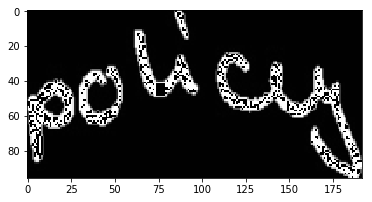

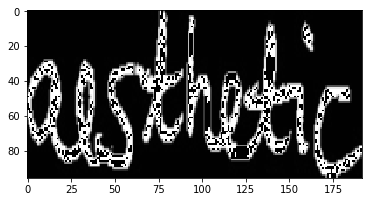

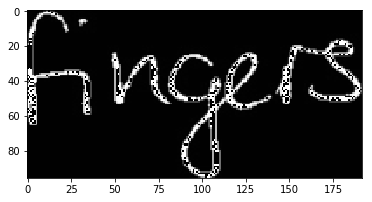

In [7]:
# display a few random images from the dataset:
for _ in range(3):
    random_index = np.random.randint(sanity_test_batch.shape[0])
    plt.figure()
    plt.imshow(sanity_test_batch[random_index])

# In the following cell, I define the computation graph for the network architecture that has been proposed for this task

There is a lot of code written in a single cell, so take a step by step approach towards understanding it

In [8]:
'''
    This cell defines the method required to spawn and return a tensorflow graph for the autoencoder model.
    coded by: Animesh
'''

import tensorflow as tf


myGraph = tf.Graph() #create a new graph object

with myGraph.as_default():
    # define the computations of this graph here:
    
    # helper functions to run the model:
    def normalize(ip_tensor, name = "normalization"):
        '''
            function to normalize the input tensor in the range of [-1, 1] 
            @param
            ip_tensor => the tensor to be normalized
            @return => the normalized version of the tensor
        '''
        with tf.name_scope(name): 
            ip_range = tf.reduce_max(ip_tensor) - tf.reduce_min(ip_tensor)
            mean = tf.reduce_mean(ip_tensor)
            return (ip_tensor - mean) / ip_range
    
    

    # placeholder for the input data batch
    inputs = tf.placeholder(dtype= tf.float32, 
                            shape=(None, data_size[0], data_size[1], data_size[2]), name="inputs")
    
    # normalized inputs to the range of [-1, 1]
    normalized_inputs = normalize(inputs, name="input_normalization")
    
    # create a summary node for some of the inputs
    inputs_summary = tf.summary.image("Input", normalized_inputs[:8])
    # visualize only first 8 images from the batch

    
    # We feed the original inputs to the convNet as shown below:
    # encoder layers: 96 x 192
    conv1_1 = tf.layers.conv2d(inputs, 32, [7, 7], strides=(2, 2), 
                            padding="SAME", name="conv_layer1_1")
    
    bn1_1 = tf.layers.batch_normalization(conv1_1, name="batch_normalization1_1")
    
    relu1_1 = tf.nn.relu(bn1_1, name="relu1_1")
    
    # 48 x 96
    conv1_2 = tf.layers.conv2d(relu1_1, 32, [5, 5], strides=(2, 2),
                            padding="SAME", name="conv_layer1_2")
    
    bn1_2 = tf.layers.batch_normalization(conv1_2, name="batch_normalization1_2")
    
    relu1_2 = tf.nn.relu(bn1_2, name="relu1_2")
    
    # 24 x 48
    conv1_3 = tf.layers.conv2d(relu1_2, 32, [5, 5], strides=(2, 2),
                            padding="SAME", name="conv_layer1_3")
    
    bn1_3 = tf.layers.batch_normalization(conv1_3, name="batch_normalization1_3")
    
    relu1_3 = tf.nn.relu(bn1_3, name="relu1_3")
    
    # 12 x 24
    conv1_4 = tf.layers.conv2d(relu1_3, 16, [3, 3], strides=(2, 2), 
                            padding="SAME", name="conv_layer1_4")

    bn1_4 = tf.layers.batch_normalization(conv1_4, name="batch_normalization1_4")
    
    relu1_4 = tf.nn.relu(bn1_4, name="relu1_4")
    
    # 6 x 12
    
    
    # decoder layers:
    # 6 x 12
    deconv1_1 = tf.layers.conv2d_transpose(relu1_4, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_1")
    
    deBn1_1 = tf.layers.batch_normalization(deconv1_1, name="de_batch_normalization1_1")
    
    deRelu1_1 = tf.nn.relu(deBn1_1, name="de_relu1_1")
    
    # 12 x 24
    deconv1_2 = tf.layers.conv2d_transpose(deRelu1_1, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_2")
    
    deBn1_2 = tf.layers.batch_normalization(deconv1_2, name="de_batch_normalization1_2")
    
    deRelu1_2 = tf.nn.relu(deBn1_2, name="de_relu1_2")
    
    # 24 x 48
    deconv1_3 = tf.layers.conv2d_transpose(deRelu1_2, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_3")
    
    deBn1_3 = tf.layers.batch_normalization(deconv1_3, name="de_batch_normalization1_3")
    
    deRelu1_3 = tf.nn.relu(deBn1_3, name="de_relu1_3")
    
    # 48 x 96
    deconv1_4 = tf.layers.conv2d_transpose(deRelu1_3, 32, [4, 4], strides=(2, 2),
                                           padding="SAME", name="deconv_layer_4")
    
    deBn1_4 = tf.layers.batch_normalization(deconv1_4, name="de_batch_normalization1_4")
    
    deRelu1_4 = tf.nn.relu(deBn1_4, name="de_relu1_4")

    # 96 x 192
    deconv1_5 = tf.layers.conv2d_transpose(deRelu1_4, 3, [3, 3], strides=(1, 1),
                                           padding="SAME", name="deconv_layer_5")
    
    # normalize the predictions i.e deconv1_5 as mentioned above. and then use it for calculating the loss
    normalized_outputs = normalize(deconv1_5, name="output_normalization")
    
    # summary for the output image.
    output_image_summary = tf.summary.image("Output", normalized_outputs[:8]) # record corresponding outputs 
    # for the images.
    
    output = relu1_4 # get a hook on to the latent representation of the encoder
    
    # also generate the summary of the latent representations.
    output_summary = tf.summary.histogram("Latent_Representation", output)

    y_pred = normalized_outputs # output of the decoder
    y_true = normalized_inputs # input at the beginning

    # define the loss for this model:
    # calculate the loss and optimize the network
    loss = tf.norm(y_pred - y_true, ord="euclidean", name="eucledian_loss") # claculate the euclidean loss.
    
    # add a summary op for loss.
    loss_summary = tf.summary.scalar("Loss", loss)

    # using Adam optimizer for optimization
    train_op = tf.train.AdamOptimizer(learning_rate=0.0001, beta1=0.9, beta2=0.999).minimize(loss, name="train_op")
    
    # single op to generate all the summary data
    all_summaries = tf.summary.merge_all()

In [9]:
itera = 1
model_name = "Model2"

In [10]:
# generate a graph of the above model and visualize it.
log_path = os.path.join(log_dir, model_name)
tensorboard_writer = tf.summary.FileWriter(log_path, graph=myGraph)

In [ ]:
''' 
    WARNING WARNING WARNING!!! This is the main training cell. Since, the data used for this task is CIFAR-10, 
    This cell will take a really really long time on low-end machines. It will however not crash your pc, since 
    I have bootstrapped the training in such a way that it loads a small chunk of data at a time to train.
'''

with tf.Session(graph=myGraph) as sess:
    
    # the path where the model will be saved 
    ''' Currently using the Model no. 1 '''
    model_path = os.path.join(base_model_path, model_name)
    
    # The saver object for saving and loading the model
    saver = tf.train.Saver(max_to_keep=2)
    
    if(os.path.isfile(os.path.join(model_path, "checkpoint"))):
        # load the weights from the model
        # instead of global variable initializer, restore the graph:
        saver.restore(sess, tf.train.latest_checkpoint(model_path))
        
    else:
        
        # initialize all the variables
        sess.run(tf.global_variables_initializer())
    
    for ep in range((itera - 1) * no_of_epochs, itera * no_of_epochs):  # start the loop 
        
        print "epoch: " + str(ep + 1)
        print "================================================================================================="
        print "================================================================================================="
        
        for batch_n in range(no_of_batches):  # batches loop
            # log a comment related to the current batch:
            print "current_batch: " + str(batch_n + 1)
            
            # generate the batch images and labels
            batch_images = np.load(os.path.join(processed_data_path, "batch_" + str(batch_n + 1)))
            
            min_batch_size = 64 # we look at only 64 images in a single batch
            
            for index in range(int(float(len(batch_images)) / min_batch_size + 0.5)):
                start = index * min_batch_size
                end = start + min_batch_size
                _, cost = sess.run([train_op, loss], feed_dict={inputs: batch_images[start: end]})
                print('range:{} loss= {}'.format((start, start + len(batch_images[start:end])), cost))
                    
            print "\n=========================================================================================\n"
        
        if((ep + 1) % checkpoint_factor == 0):
            # run the summary op also
            summary = sess.run(all_summaries, feed_dict={inputs: batch_images[start: end]})

            # add the generated summary to the fileWriter
            tensorboard_writer.add_summary(summary, (ep + 1))
            
            # save the model trained so far:
            saver.save(sess, os.path.join(model_path, model_name), global_step = (ep + 1))
        
    print "================================================================================================="
    print "================================================================================================="

epoch: 1
current_batch: 1
range:(0, 64) loss= 708.858032227
range:(64, 128) loss= 724.278381348
range:(128, 192) loss= 692.608276367
range:(192, 256) loss= 701.543762207
range:(256, 320) loss= 696.014892578
range:(320, 384) loss= 716.050476074
range:(384, 448) loss= 713.512145996
range:(448, 512) loss= 689.601379395
range:(512, 576) loss= 709.839355469
range:(576, 640) loss= 692.937072754
range:(640, 704) loss= 694.341125488
range:(704, 768) loss= 730.942443848
range:(768, 832) loss= 697.153930664
range:(832, 896) loss= 698.43371582
range:(896, 960) loss= 679.258666992
range:(960, 1024) loss= 684.682800293
range:(1024, 1088) loss= 687.881958008
range:(1088, 1152) loss= 708.477294922
range:(1152, 1216) loss= 695.737670898
range:(1216, 1280) loss= 690.360412598
range:(1280, 1344) loss= 686.49810791
range:(1344, 1408) loss= 708.514160156
range:(1408, 1472) loss= 693.059326172
range:(1472, 1536) loss= 691.181518555
range:(1536, 1600) loss= 695.900146484
range:(1600, 1664) loss= 679.1389770

range:(3008, 3072) loss= 519.907409668
range:(3072, 3136) loss= 529.602294922
range:(3136, 3200) loss= 546.421203613
range:(3200, 3264) loss= 518.274230957
range:(3264, 3328) loss= 524.727355957
range:(3328, 3392) loss= 530.315673828
range:(3392, 3456) loss= 525.26184082
range:(3456, 3520) loss= 526.15246582
range:(3520, 3584) loss= 523.649536133
range:(3584, 3648) loss= 525.952148438
range:(3648, 3712) loss= 530.348815918
range:(3712, 3776) loss= 523.592529297
range:(3776, 3840) loss= 513.98223877
range:(3840, 3904) loss= 530.258239746
range:(3904, 3968) loss= 536.246582031
range:(3968, 4032) loss= 529.843078613
range:(4032, 4096) loss= 538.850097656
range:(4096, 4160) loss= 535.376586914
range:(4160, 4224) loss= 522.577148438
range:(4224, 4288) loss= 521.754150391
range:(4288, 4352) loss= 514.614379883
range:(4352, 4416) loss= 514.666625977
range:(4416, 4480) loss= 520.387695312
range:(4480, 4544) loss= 528.092956543
range:(4544, 4608) loss= 514.566833496
range:(4608, 4672) loss= 505

range:(1152, 1216) loss= 455.996673584
range:(1216, 1280) loss= 463.194671631
range:(1280, 1344) loss= 443.628631592
range:(1344, 1408) loss= 454.662139893
range:(1408, 1472) loss= 453.363098145
range:(1472, 1536) loss= 441.01260376
range:(1536, 1600) loss= 452.664093018
range:(1600, 1664) loss= 455.693023682
range:(1664, 1728) loss= 450.780609131
range:(1728, 1792) loss= 450.968414307
range:(1792, 1856) loss= 462.747558594
range:(1856, 1920) loss= 460.280151367
range:(1920, 1984) loss= 462.902404785
range:(1984, 2048) loss= 450.753936768
range:(2048, 2112) loss= 459.86517334
range:(2112, 2176) loss= 456.610595703
range:(2176, 2240) loss= 456.129516602
range:(2240, 2304) loss= 462.125030518
range:(2304, 2368) loss= 463.560852051
range:(2368, 2432) loss= 460.487030029
range:(2432, 2496) loss= 455.274688721
range:(2496, 2560) loss= 448.791503906
range:(2560, 2624) loss= 452.16418457
range:(2624, 2688) loss= 452.152587891
range:(2688, 2752) loss= 448.118225098
range:(2752, 2816) loss= 437

range:(4416, 4480) loss= 427.960906982
range:(4480, 4544) loss= 435.082702637
range:(4544, 4608) loss= 425.424499512
range:(4608, 4672) loss= 424.716918945
range:(4672, 4736) loss= 418.838134766
range:(4736, 4800) loss= 428.611907959
range:(4800, 4864) loss= 413.13873291
range:(4864, 4928) loss= 426.391448975
range:(4928, 4992) loss= 428.822174072


current_batch: 9
range:(0, 64) loss= 424.908782959
range:(64, 128) loss= 421.276977539
range:(128, 192) loss= 421.711700439
range:(192, 256) loss= 418.404052734
range:(256, 320) loss= 418.150390625
range:(320, 384) loss= 419.018463135
range:(384, 448) loss= 425.09161377
range:(448, 512) loss= 415.033630371
range:(512, 576) loss= 424.533721924
range:(576, 640) loss= 418.239562988
range:(640, 704) loss= 417.029632568
range:(704, 768) loss= 427.198455811
range:(768, 832) loss= 415.702423096
range:(832, 896) loss= 422.540374756
range:(896, 960) loss= 421.625244141
range:(960, 1024) loss= 407.665100098
range:(1024, 1088) loss= 412.817016602
rang

range:(3328, 3392) loss= 395.45980835
range:(3392, 3456) loss= 405.826690674
range:(3456, 3520) loss= 408.348236084
range:(3520, 3584) loss= 408.349945068
range:(3584, 3648) loss= 398.744812012
range:(3648, 3712) loss= 400.859222412
range:(3712, 3776) loss= 403.592803955
range:(3776, 3840) loss= 396.675872803
range:(3840, 3904) loss= 405.993347168
range:(3904, 3968) loss= 401.935424805
range:(3968, 4032) loss= 404.696868896
range:(4032, 4096) loss= 408.071716309
range:(4096, 4160) loss= 401.591217041
range:(4160, 4224) loss= 395.862579346
range:(4224, 4288) loss= 398.424621582
range:(4288, 4352) loss= 415.535400391
range:(4352, 4416) loss= 406.139556885
range:(4416, 4480) loss= 398.301361084
range:(4480, 4544) loss= 410.935272217
range:(4544, 4608) loss= 411.651123047
range:(4608, 4672) loss= 413.525695801
range:(4672, 4736) loss= 390.131225586
range:(4736, 4800) loss= 401.677276611
range:(4800, 4864) loss= 400.986083984
range:(4864, 4928) loss= 400.874053955
range:(4928, 4992) loss= 3

range:(1472, 1536) loss= 379.382232666
range:(1536, 1600) loss= 389.151031494
range:(1600, 1664) loss= 385.979431152
range:(1664, 1728) loss= 389.997192383
range:(1728, 1792) loss= 387.908447266
range:(1792, 1856) loss= 385.986206055
range:(1856, 1920) loss= 390.890106201
range:(1920, 1984) loss= 389.787994385
range:(1984, 2048) loss= 390.277313232
range:(2048, 2112) loss= 388.989593506
range:(2112, 2176) loss= 380.109802246
range:(2176, 2240) loss= 381.730010986
range:(2240, 2304) loss= 383.131103516
range:(2304, 2368) loss= 389.277587891
range:(2368, 2432) loss= 374.559082031
range:(2432, 2496) loss= 385.594055176
range:(2496, 2560) loss= 383.462219238
range:(2560, 2624) loss= 378.363250732
range:(2624, 2688) loss= 386.392852783
range:(2688, 2752) loss= 386.85446167
range:(2752, 2816) loss= 386.938354492
range:(2816, 2880) loss= 375.381103516
range:(2880, 2944) loss= 374.383026123
range:(2944, 3008) loss= 381.469085693
range:(3008, 3072) loss= 386.240936279
range:(3072, 3136) loss= 3

range:(4736, 4800) loss= 367.285003662
range:(4800, 4864) loss= 365.534454346
range:(4864, 4928) loss= 364.454559326
range:(4928, 4992) loss= 370.725311279


current_batch: 7
range:(0, 64) loss= 379.223602295
range:(64, 128) loss= 375.635162354
range:(128, 192) loss= 360.840209961
range:(192, 256) loss= 374.344482422
range:(256, 320) loss= 364.459411621
range:(320, 384) loss= 361.098358154
range:(384, 448) loss= 364.539916992
range:(448, 512) loss= 369.648406982
range:(512, 576) loss= 372.347473145
range:(576, 640) loss= 371.169189453
range:(640, 704) loss= 358.848083496
range:(704, 768) loss= 363.811065674
range:(768, 832) loss= 368.494049072
range:(832, 896) loss= 376.856811523
range:(896, 960) loss= 371.600952148
range:(960, 1024) loss= 360.023925781
range:(1024, 1088) loss= 356.668457031
range:(1088, 1152) loss= 364.325317383
range:(1152, 1216) loss= 361.818847656
range:(1216, 1280) loss= 372.016143799
range:(1280, 1344) loss= 368.437164307
range:(1344, 1408) loss= 357.999450684
ra

range:(2880, 2944) loss= 347.928863525
range:(2944, 3008) loss= 353.282043457
range:(3008, 3072) loss= 369.646362305
range:(3072, 3136) loss= 362.677032471
range:(3136, 3200) loss= 354.071075439
range:(3200, 3264) loss= 360.133972168
range:(3264, 3328) loss= 360.235290527
range:(3328, 3392) loss= 356.626342773
range:(3392, 3456) loss= 366.466186523
range:(3456, 3520) loss= 351.550262451
range:(3520, 3584) loss= 357.990447998
range:(3584, 3648) loss= 361.417327881
range:(3648, 3712) loss= 346.577850342
range:(3712, 3776) loss= 352.761566162
range:(3776, 3840) loss= 367.511871338
range:(3840, 3904) loss= 361.559967041
range:(3904, 3968) loss= 357.427032471
range:(3968, 4032) loss= 358.855834961
range:(4032, 4096) loss= 364.707672119
range:(4096, 4160) loss= 355.001525879
range:(4160, 4224) loss= 358.055541992
range:(4224, 4288) loss= 359.201904297
range:(4288, 4352) loss= 357.280609131
range:(4352, 4416) loss= 354.484893799
range:(4416, 4480) loss= 347.917114258
range:(4480, 4544) loss= 

range:(1792, 1856) loss= 339.775970459
range:(1856, 1920) loss= 356.967498779
range:(1920, 1984) loss= 340.418731689
range:(1984, 2048) loss= 347.181396484
range:(2048, 2112) loss= 341.459777832
range:(2112, 2176) loss= 348.366760254
range:(2176, 2240) loss= 346.054443359
range:(2240, 2304) loss= 344.324462891
range:(2304, 2368) loss= 353.173553467
range:(2368, 2432) loss= 344.316497803
range:(2432, 2496) loss= 354.782958984
range:(2496, 2560) loss= 339.481842041
range:(2560, 2624) loss= 353.564575195
range:(2624, 2688) loss= 346.126953125
range:(2688, 2752) loss= 348.00579834
range:(2752, 2816) loss= 338.386657715
range:(2816, 2880) loss= 344.987426758
range:(2880, 2944) loss= 345.674316406
range:(2944, 3008) loss= 347.821655273
range:(3008, 3072) loss= 330.716064453
range:(3072, 3136) loss= 344.470245361
range:(3136, 3200) loss= 343.580322266
range:(3200, 3264) loss= 338.044342041
range:(3264, 3328) loss= 344.701080322
range:(3328, 3392) loss= 332.699432373
range:(3392, 3456) loss= 3

range:(0, 64) loss= 336.933990479
range:(64, 128) loss= 339.083129883
range:(128, 192) loss= 335.61038208
range:(192, 256) loss= 335.744140625
range:(256, 320) loss= 334.452575684
range:(320, 384) loss= 337.751434326
range:(384, 448) loss= 333.826416016
range:(448, 512) loss= 339.822509766
range:(512, 576) loss= 321.06942749
range:(576, 640) loss= 331.544616699
range:(640, 704) loss= 334.408355713
range:(704, 768) loss= 336.227935791
range:(768, 832) loss= 332.135101318
range:(832, 896) loss= 328.393554688
range:(896, 960) loss= 334.860931396
range:(960, 1024) loss= 319.8878479
range:(1024, 1088) loss= 334.336425781
range:(1088, 1152) loss= 334.782165527
range:(1152, 1216) loss= 332.787628174
range:(1216, 1280) loss= 338.200866699
range:(1280, 1344) loss= 337.965667725
range:(1344, 1408) loss= 341.822998047
range:(1408, 1472) loss= 332.896209717
range:(1472, 1536) loss= 335.773040771
range:(1536, 1600) loss= 329.612304688
range:(1600, 1664) loss= 332.793640137
range:(1664, 1728) loss= 

range:(3328, 3392) loss= 328.644622803
range:(3392, 3456) loss= 325.924407959
range:(3456, 3520) loss= 324.847991943
range:(3520, 3584) loss= 331.763977051
range:(3584, 3648) loss= 316.962371826
range:(3648, 3712) loss= 318.393768311
range:(3712, 3776) loss= 336.79296875
range:(3776, 3840) loss= 325.008575439
range:(3840, 3904) loss= 326.647583008
range:(3904, 3968) loss= 316.815795898
range:(3968, 4032) loss= 332.994689941
range:(4032, 4096) loss= 334.81237793
range:(4096, 4160) loss= 319.317993164
range:(4160, 4224) loss= 327.9375
range:(4224, 4288) loss= 322.979827881
range:(4288, 4352) loss= 322.207214355
range:(4352, 4416) loss= 333.285949707
range:(4416, 4480) loss= 317.46395874
range:(4480, 4544) loss= 333.18069458
range:(4544, 4608) loss= 336.310180664
range:(4608, 4672) loss= 318.812652588
range:(4672, 4736) loss= 330.058563232
range:(4736, 4800) loss= 328.985473633
range:(4800, 4864) loss= 327.09173584
range:(4864, 4928) loss= 317.662811279
range:(4928, 4992) loss= 327.366363

range:(1536, 1600) loss= 324.862548828
range:(1600, 1664) loss= 317.052368164
range:(1664, 1728) loss= 316.38482666
range:(1728, 1792) loss= 321.635742188
range:(1792, 1856) loss= 321.012512207
range:(1856, 1920) loss= 315.649505615
range:(1920, 1984) loss= 318.792724609
range:(1984, 2048) loss= 309.82510376
range:(2048, 2112) loss= 318.368255615
range:(2112, 2176) loss= 326.733215332
range:(2176, 2240) loss= 320.677459717
range:(2240, 2304) loss= 320.71270752
range:(2304, 2368) loss= 327.63079834
range:(2368, 2432) loss= 319.308532715
range:(2432, 2496) loss= 325.383239746
range:(2496, 2560) loss= 310.826538086
range:(2560, 2624) loss= 320.674499512
range:(2624, 2688) loss= 329.818237305
range:(2688, 2752) loss= 320.048706055
range:(2752, 2816) loss= 319.18258667
range:(2816, 2880) loss= 313.342926025
range:(2880, 2944) loss= 320.036987305
range:(2944, 3008) loss= 313.543518066
range:(3008, 3072) loss= 326.379058838
range:(3072, 3136) loss= 326.748718262
range:(3136, 3200) loss= 316.7

range:(448, 512) loss= 303.247070312
range:(512, 576) loss= 305.764373779
range:(576, 640) loss= 307.807037354
range:(640, 704) loss= 320.087097168
range:(704, 768) loss= 310.422973633
range:(768, 832) loss= 305.994354248
range:(832, 896) loss= 306.940155029
range:(896, 960) loss= 311.384399414
range:(960, 1024) loss= 314.451538086
range:(1024, 1088) loss= 304.014556885
range:(1088, 1152) loss= 302.916107178
range:(1152, 1216) loss= 305.607666016
range:(1216, 1280) loss= 302.769744873
range:(1280, 1344) loss= 301.862548828
range:(1344, 1408) loss= 306.825134277
range:(1408, 1472) loss= 300.510650635
range:(1472, 1536) loss= 305.68637085
range:(1536, 1600) loss= 314.890716553
range:(1600, 1664) loss= 308.931274414
range:(1664, 1728) loss= 310.497406006
range:(1728, 1792) loss= 313.048431396
range:(1792, 1856) loss= 312.237487793
range:(1856, 1920) loss= 308.84552002
range:(1920, 1984) loss= 301.452056885
range:(1984, 2048) loss= 309.546417236
range:(2048, 2112) loss= 312.782104492
range

range:(3776, 3840) loss= 299.079559326
range:(3840, 3904) loss= 301.849121094
range:(3904, 3968) loss= 301.691833496
range:(3968, 4032) loss= 305.452148438
range:(4032, 4096) loss= 299.241912842
range:(4096, 4160) loss= 297.407043457
range:(4160, 4224) loss= 298.428771973
range:(4224, 4288) loss= 310.043823242
range:(4288, 4352) loss= 308.275634766
range:(4352, 4416) loss= 292.28125
range:(4416, 4480) loss= 298.096405029
range:(4480, 4544) loss= 298.647766113
range:(4544, 4608) loss= 292.582305908
range:(4608, 4672) loss= 299.288269043
range:(4672, 4736) loss= 297.194366455
range:(4736, 4800) loss= 301.328155518
range:(4800, 4864) loss= 301.073608398
range:(4864, 4928) loss= 303.285980225
range:(4928, 4992) loss= 307.330444336


current_batch: 6
range:(0, 64) loss= 309.740325928
range:(64, 128) loss= 304.790802002
range:(128, 192) loss= 306.344512939
range:(192, 256) loss= 298.947235107
range:(256, 320) loss= 297.544189453
range:(320, 384) loss= 294.602081299
range:(384, 448) loss= 286

range:(1984, 2048) loss= 294.072479248
range:(2048, 2112) loss= 289.257080078
range:(2112, 2176) loss= 285.132873535
range:(2176, 2240) loss= 293.906707764
range:(2240, 2304) loss= 302.005645752
range:(2304, 2368) loss= 297.520568848
range:(2368, 2432) loss= 290.823364258
range:(2432, 2496) loss= 283.361175537
range:(2496, 2560) loss= 291.261047363
range:(2560, 2624) loss= 296.913543701
range:(2624, 2688) loss= 302.74307251
range:(2688, 2752) loss= 290.44229126
range:(2752, 2816) loss= 293.363677979
range:(2816, 2880) loss= 290.187591553
range:(2880, 2944) loss= 292.006774902
range:(2944, 3008) loss= 296.119567871
range:(3008, 3072) loss= 300.798980713
range:(3072, 3136) loss= 298.602722168
range:(3136, 3200) loss= 292.483215332
range:(3200, 3264) loss= 298.294525146
range:(3264, 3328) loss= 302.690795898
range:(3328, 3392) loss= 289.668518066
range:(3392, 3456) loss= 300.030090332
range:(3456, 3520) loss= 297.694854736
range:(3520, 3584) loss= 301.026641846
range:(3584, 3648) loss= 29

range:(896, 960) loss= 286.258605957
range:(960, 1024) loss= 277.794799805
range:(1024, 1088) loss= 283.353729248
range:(1088, 1152) loss= 284.571807861
range:(1152, 1216) loss= 298.480499268
range:(1216, 1280) loss= 286.629638672
range:(1280, 1344) loss= 285.801055908
range:(1344, 1408) loss= 297.185302734
range:(1408, 1472) loss= 288.499694824
range:(1472, 1536) loss= 286.519470215
range:(1536, 1600) loss= 283.928161621
range:(1600, 1664) loss= 300.603118896
range:(1664, 1728) loss= 290.523284912
range:(1728, 1792) loss= 277.766265869
range:(1792, 1856) loss= 297.203430176
range:(1856, 1920) loss= 294.329162598
range:(1920, 1984) loss= 284.198455811
range:(1984, 2048) loss= 295.124206543
range:(2048, 2112) loss= 283.240112305
range:(2112, 2176) loss= 293.662384033
range:(2176, 2240) loss= 290.824279785
range:(2240, 2304) loss= 284.136322021
range:(2304, 2368) loss= 292.645782471
range:(2368, 2432) loss= 297.522399902
range:(2432, 2496) loss= 290.189147949
range:(2496, 2560) loss= 280

range:(4160, 4224) loss= 285.069366455
range:(4224, 4288) loss= 276.501739502
range:(4288, 4352) loss= 280.225128174
range:(4352, 4416) loss= 275.848205566
range:(4416, 4480) loss= 281.99206543
range:(4480, 4544) loss= 289.022186279
range:(4544, 4608) loss= 290.571868896
range:(4608, 4672) loss= 276.417663574
range:(4672, 4736) loss= 285.886566162
range:(4736, 4800) loss= 281.45880127
range:(4800, 4864) loss= 281.117706299
range:(4864, 4928) loss= 288.448455811
range:(4928, 4992) loss= 279.274200439


current_batch: 4
range:(0, 64) loss= 284.82635498
range:(64, 128) loss= 285.751983643
range:(128, 192) loss= 288.077789307
range:(192, 256) loss= 277.402160645
range:(256, 320) loss= 279.519897461
range:(320, 384) loss= 281.638183594
range:(384, 448) loss= 289.761260986
range:(448, 512) loss= 293.940460205
range:(512, 576) loss= 289.357330322
range:(576, 640) loss= 282.968048096
range:(640, 704) loss= 287.73828125
range:(704, 768) loss= 282.183258057
range:(768, 832) loss= 278.866363525
r

range:(2304, 2368) loss= 285.923339844
range:(2368, 2432) loss= 291.496765137
range:(2432, 2496) loss= 272.042510986
range:(2496, 2560) loss= 271.679992676
range:(2560, 2624) loss= 278.815368652
range:(2624, 2688) loss= 282.997375488
range:(2688, 2752) loss= 276.821624756
range:(2752, 2816) loss= 266.188049316
range:(2816, 2880) loss= 280.640472412
range:(2880, 2944) loss= 280.140045166
range:(2944, 3008) loss= 271.067169189
range:(3008, 3072) loss= 278.864593506
range:(3072, 3136) loss= 280.982116699
range:(3136, 3200) loss= 279.350372314
range:(3200, 3264) loss= 276.613739014
range:(3264, 3328) loss= 281.700958252
range:(3328, 3392) loss= 273.808837891
range:(3392, 3456) loss= 282.294036865
range:(3456, 3520) loss= 278.944000244
range:(3520, 3584) loss= 281.69430542
range:(3584, 3648) loss= 279.54800415
range:(3648, 3712) loss= 287.119476318
range:(3712, 3776) loss= 277.484710693
range:(3776, 3840) loss= 279.346160889
range:(3840, 3904) loss= 275.014190674
range:(3904, 3968) loss= 28

range:(448, 512) loss= 267.528259277
range:(512, 576) loss= 276.133087158
range:(576, 640) loss= 277.13961792
range:(640, 704) loss= 276.364135742
range:(704, 768) loss= 272.512512207
range:(768, 832) loss= 273.010925293
range:(832, 896) loss= 264.978210449
range:(896, 960) loss= 276.213500977
range:(960, 1024) loss= 262.257293701
range:(1024, 1088) loss= 271.966522217
range:(1088, 1152) loss= 273.904632568
range:(1152, 1216) loss= 276.898620605
range:(1216, 1280) loss= 274.361785889
range:(1280, 1344) loss= 268.866638184
range:(1344, 1408) loss= 266.594116211
range:(1408, 1472) loss= 274.233764648
range:(1472, 1536) loss= 276.354675293
range:(1536, 1600) loss= 275.412506104
range:(1600, 1664) loss= 274.558898926
range:(1664, 1728) loss= 271.735076904
range:(1728, 1792) loss= 280.697021484
range:(1792, 1856) loss= 270.498382568
range:(1856, 1920) loss= 275.700042725
range:(1920, 1984) loss= 277.416442871
range:(1984, 2048) loss= 276.419433594
range:(2048, 2112) loss= 263.534423828
rang

range:(4480, 4544) loss= 268.687957764
range:(4544, 4608) loss= 273.086090088
range:(4608, 4672) loss= 283.398284912
range:(4672, 4736) loss= 264.722991943
range:(4736, 4800) loss= 277.347412109
range:(4800, 4864) loss= 275.750976562
range:(4864, 4928) loss= 271.07522583
range:(4928, 4992) loss= 266.831329346


current_batch: 2
range:(0, 64) loss= 258.0
range:(64, 128) loss= 270.578277588
range:(128, 192) loss= 262.735992432
range:(192, 256) loss= 270.036560059
range:(256, 320) loss= 267.490570068
range:(320, 384) loss= 274.736236572
range:(384, 448) loss= 269.39151001
range:(448, 512) loss= 272.135192871
range:(512, 576) loss= 267.79083252
range:(576, 640) loss= 271.971679688
range:(640, 704) loss= 280.275115967
range:(704, 768) loss= 273.96282959
range:(768, 832) loss= 272.926391602
range:(832, 896) loss= 272.827087402
range:(896, 960) loss= 269.846740723
range:(960, 1024) loss= 264.026489258
range:(1024, 1088) loss= 273.51348877
range:(1088, 1152) loss= 270.099945068
range:(1152, 12

range:(2688, 2752) loss= 268.676727295
range:(2752, 2816) loss= 264.708587646
range:(2816, 2880) loss= 259.505096436
range:(2880, 2944) loss= 257.840820312
range:(2944, 3008) loss= 263.633605957
range:(3008, 3072) loss= 261.966247559
range:(3072, 3136) loss= 263.803192139
range:(3136, 3200) loss= 268.418243408
range:(3200, 3264) loss= 277.188934326
range:(3264, 3328) loss= 265.433258057
range:(3328, 3392) loss= 260.933868408
range:(3392, 3456) loss= 262.092071533
range:(3456, 3520) loss= 265.895690918
range:(3520, 3584) loss= 267.175720215
range:(3584, 3648) loss= 264.444976807
range:(3648, 3712) loss= 266.717254639
range:(3712, 3776) loss= 264.860565186
range:(3776, 3840) loss= 263.843841553
range:(3840, 3904) loss= 255.054626465
range:(3904, 3968) loss= 261.506317139
range:(3968, 4032) loss= 258.174591064
range:(4032, 4096) loss= 265.119049072
range:(4096, 4160) loss= 264.029724121
range:(4160, 4224) loss= 267.446136475
range:(4224, 4288) loss= 269.494293213
range:(4288, 4352) loss= 

range:(832, 896) loss= 270.589111328
range:(896, 960) loss= 256.715332031
range:(960, 1024) loss= 254.591064453
range:(1024, 1088) loss= 250.878952026
range:(1088, 1152) loss= 252.178710938
range:(1152, 1216) loss= 252.881698608
range:(1216, 1280) loss= 258.668792725
range:(1280, 1344) loss= 258.561218262
range:(1344, 1408) loss= 251.187591553
range:(1408, 1472) loss= 258.731323242
range:(1472, 1536) loss= 253.341293335
range:(1536, 1600) loss= 253.106567383
range:(1600, 1664) loss= 262.396087646
range:(1664, 1728) loss= 258.476959229
range:(1728, 1792) loss= 268.305023193
range:(1792, 1856) loss= 258.666687012
range:(1856, 1920) loss= 271.13381958
range:(1920, 1984) loss= 256.985076904
range:(1984, 2048) loss= 255.486923218
range:(2048, 2112) loss= 259.183380127
range:(2112, 2176) loss= 252.441299438
range:(2176, 2240) loss= 263.394805908
range:(2240, 2304) loss= 254.154312134
range:(2304, 2368) loss= 260.664428711
range:(2368, 2432) loss= 257.252868652
range:(2432, 2496) loss= 254.12

range:(4096, 4160) loss= 255.775772095
range:(4160, 4224) loss= 256.78994751
range:(4224, 4288) loss= 260.270294189
range:(4288, 4352) loss= 255.753982544
range:(4352, 4416) loss= 256.341003418
range:(4416, 4480) loss= 253.412841797
range:(4480, 4544) loss= 251.59135437
range:(4544, 4608) loss= 255.158462524
range:(4608, 4672) loss= 252.764007568
range:(4672, 4736) loss= 260.46395874
range:(4736, 4800) loss= 257.8644104
range:(4800, 4864) loss= 258.525817871
range:(4864, 4928) loss= 248.600158691
range:(4928, 4992) loss= 253.103775024


current_batch: 10
range:(0, 64) loss= 244.822158813
range:(64, 128) loss= 254.466674805
range:(128, 192) loss= 249.692108154
range:(192, 256) loss= 250.679046631
range:(256, 320) loss= 257.503295898
range:(320, 384) loss= 260.950042725
range:(384, 448) loss= 265.038482666
range:(448, 512) loss= 251.760528564
range:(512, 576) loss= 256.105194092
range:(576, 640) loss= 247.613372803
range:(640, 704) loss= 261.536682129
range:(704, 768) loss= 257.034606934

range:(3008, 3072) loss= 242.536026001
range:(3072, 3136) loss= 249.985458374
range:(3136, 3200) loss= 254.123336792
range:(3200, 3264) loss= 246.48789978
range:(3264, 3328) loss= 250.696609497
range:(3328, 3392) loss= 244.106155396
range:(3392, 3456) loss= 248.299514771
range:(3456, 3520) loss= 251.80619812
range:(3520, 3584) loss= 252.373733521
range:(3584, 3648) loss= 258.979095459
range:(3648, 3712) loss= 252.968826294
range:(3712, 3776) loss= 257.393737793
range:(3776, 3840) loss= 251.224639893
range:(3840, 3904) loss= 249.048812866
range:(3904, 3968) loss= 252.070770264
range:(3968, 4032) loss= 240.290161133
range:(4032, 4096) loss= 252.055175781
range:(4096, 4160) loss= 253.077667236
range:(4160, 4224) loss= 250.940551758
range:(4224, 4288) loss= 253.913101196
range:(4288, 4352) loss= 262.875213623
range:(4352, 4416) loss= 242.670837402
range:(4416, 4480) loss= 244.680328369
range:(4480, 4544) loss= 258.897003174
range:(4544, 4608) loss= 250.446029663
range:(4608, 4672) loss= 25

range:(1152, 1216) loss= 250.636138916
range:(1216, 1280) loss= 249.293762207
range:(1280, 1344) loss= 254.815368652
range:(1344, 1408) loss= 244.947250366
range:(1408, 1472) loss= 250.750839233
range:(1472, 1536) loss= 254.357269287
range:(1536, 1600) loss= 241.207183838
range:(1600, 1664) loss= 250.776290894
range:(1664, 1728) loss= 248.228042603
range:(1728, 1792) loss= 237.73374939
range:(1792, 1856) loss= 244.910705566
range:(1856, 1920) loss= 247.273880005
range:(1920, 1984) loss= 240.264541626
range:(1984, 2048) loss= 253.425140381
range:(2048, 2112) loss= 253.371856689
range:(2112, 2176) loss= 246.30027771
range:(2176, 2240) loss= 251.686386108
range:(2240, 2304) loss= 256.529815674
range:(2304, 2368) loss= 242.7943573
range:(2368, 2432) loss= 243.869796753
range:(2432, 2496) loss= 256.337158203
range:(2496, 2560) loss= 247.651260376
range:(2560, 2624) loss= 248.067932129
range:(2624, 2688) loss= 248.844619751
range:(2688, 2752) loss= 250.609695435
range:(2752, 2816) loss= 246.

range:(4416, 4480) loss= 235.538345337
range:(4480, 4544) loss= 252.434646606
range:(4544, 4608) loss= 256.04574585
range:(4608, 4672) loss= 235.924255371
range:(4672, 4736) loss= 248.803009033
range:(4736, 4800) loss= 246.792327881
range:(4800, 4864) loss= 246.502212524
range:(4864, 4928) loss= 237.144866943
range:(4928, 4992) loss= 243.233612061


current_batch: 8
range:(0, 64) loss= 239.63381958
range:(64, 128) loss= 240.248153687
range:(128, 192) loss= 242.534622192
range:(192, 256) loss= 238.236328125
range:(256, 320) loss= 233.124816895
range:(320, 384) loss= 240.990386963
range:(384, 448) loss= 247.564849854
range:(448, 512) loss= 248.008972168
range:(512, 576) loss= 241.225463867
range:(576, 640) loss= 235.348800659
range:(640, 704) loss= 258.391540527
range:(704, 768) loss= 244.575714111
range:(768, 832) loss= 247.315414429
range:(832, 896) loss= 248.712158203
range:(896, 960) loss= 245.715576172
range:(960, 1024) loss= 242.561294556
range:(1024, 1088) loss= 241.986495972
rang

range:(2560, 2624) loss= 244.23866272
range:(2624, 2688) loss= 248.105026245
range:(2688, 2752) loss= 239.559875488
range:(2752, 2816) loss= 240.124801636
range:(2816, 2880) loss= 236.059448242
range:(2880, 2944) loss= 238.295669556
range:(2944, 3008) loss= 236.424758911
range:(3008, 3072) loss= 248.292114258
range:(3072, 3136) loss= 240.043319702
range:(3136, 3200) loss= 239.954742432
range:(3200, 3264) loss= 239.067703247
range:(3264, 3328) loss= 238.564147949
range:(3328, 3392) loss= 248.280441284
range:(3392, 3456) loss= 244.218139648
range:(3456, 3520) loss= 240.505615234
range:(3520, 3584) loss= 238.170135498
range:(3584, 3648) loss= 232.706466675
range:(3648, 3712) loss= 232.767715454
range:(3712, 3776) loss= 234.056930542
range:(3776, 3840) loss= 245.622085571
range:(3840, 3904) loss= 235.1144104


epoch: 8
current_batch: 1
range:(0, 64) loss= 243.403396606
range:(64, 128) loss= 239.42527771
range:(128, 192) loss= 238.346679688
range:(192, 256) loss= 232.668518066
range:(256, 3

range:(1472, 1536) loss= 232.025268555
range:(1536, 1600) loss= 241.051422119
range:(1600, 1664) loss= 236.531143188
range:(1664, 1728) loss= 234.54284668
range:(1728, 1792) loss= 243.655441284
range:(1792, 1856) loss= 239.271408081
range:(1856, 1920) loss= 239.676574707
range:(1920, 1984) loss= 233.177337646
range:(1984, 2048) loss= 237.74156189
range:(2048, 2112) loss= 240.151168823
range:(2112, 2176) loss= 238.902252197
range:(2176, 2240) loss= 234.567764282
range:(2240, 2304) loss= 235.101028442
range:(2304, 2368) loss= 239.118164062
range:(2368, 2432) loss= 237.754638672
range:(2432, 2496) loss= 239.491989136
range:(2496, 2560) loss= 233.514221191
range:(2560, 2624) loss= 230.943466187
range:(2624, 2688) loss= 244.584793091
range:(2688, 2752) loss= 234.10067749
range:(2752, 2816) loss= 233.359802246
range:(2816, 2880) loss= 233.492370605
range:(2880, 2944) loss= 245.940963745
range:(2944, 3008) loss= 231.039459229
range:(3008, 3072) loss= 237.513702393
range:(3072, 3136) loss= 232

range:(4736, 4800) loss= 232.147201538
range:(4800, 4864) loss= 230.995269775
range:(4864, 4928) loss= 233.07649231
range:(4928, 4992) loss= 230.447921753


current_batch: 6
range:(0, 64) loss= 237.947860718
range:(64, 128) loss= 234.376846313
range:(128, 192) loss= 236.946655273
range:(192, 256) loss= 226.118789673
range:(256, 320) loss= 232.840362549
range:(320, 384) loss= 226.824356079
range:(384, 448) loss= 222.717178345
range:(448, 512) loss= 235.44770813
range:(512, 576) loss= 234.984924316
range:(576, 640) loss= 237.919418335
range:(640, 704) loss= 235.974243164
range:(704, 768) loss= 231.398223877
range:(768, 832) loss= 230.367889404
range:(832, 896) loss= 236.261734009
range:(896, 960) loss= 234.366607666
range:(960, 1024) loss= 243.022888184
range:(1024, 1088) loss= 224.225204468
range:(1088, 1152) loss= 241.266448975
range:(1152, 1216) loss= 239.079711914
range:(1216, 1280) loss= 232.672714233
range:(1280, 1344) loss= 233.000671387
range:(1344, 1408) loss= 228.412261963
rang

range:(2944, 3008) loss= 230.838180542
range:(3008, 3072) loss= 233.572189331
range:(3072, 3136) loss= 231.689224243
range:(3136, 3200) loss= 228.570861816
range:(3200, 3264) loss= 234.302337646
range:(3264, 3328) loss= 235.855285645
range:(3328, 3392) loss= 226.584991455
range:(3392, 3456) loss= 235.450714111
range:(3456, 3520) loss= 235.008850098
range:(3520, 3584) loss= 234.061141968
range:(3584, 3648) loss= 228.451980591
range:(3648, 3712) loss= 231.928207397
range:(3712, 3776) loss= 232.732391357
range:(3776, 3840) loss= 228.473815918
range:(3840, 3904) loss= 229.098510742
range:(3904, 3968) loss= 224.918807983
range:(3968, 4032) loss= 228.607635498
range:(4032, 4096) loss= 234.408462524
range:(4096, 4160) loss= 230.457519531
range:(4160, 4224) loss= 234.542953491
range:(4224, 4288) loss= 229.278625488
range:(4288, 4352) loss= 237.435134888
range:(4352, 4416) loss= 234.302978516
range:(4416, 4480) loss= 235.839859009
range:(4480, 4544) loss= 230.166915894
range:(4544, 4608) loss= 

range:(1856, 1920) loss= 233.013473511
range:(1920, 1984) loss= 225.062515259
range:(1984, 2048) loss= 230.258743286
range:(2048, 2112) loss= 221.925765991
range:(2112, 2176) loss= 230.546005249
range:(2176, 2240) loss= 228.704284668
range:(2240, 2304) loss= 223.586044312
range:(2304, 2368) loss= 224.208343506
range:(2368, 2432) loss= 232.713470459
range:(2432, 2496) loss= 224.285736084
range:(2496, 2560) loss= 219.003662109
range:(2560, 2624) loss= 221.440597534
range:(2624, 2688) loss= 220.904632568
range:(2688, 2752) loss= 221.343963623
range:(2752, 2816) loss= 226.810302734
range:(2816, 2880) loss= 226.856750488
range:(2880, 2944) loss= 227.251663208
range:(2944, 3008) loss= 224.087966919
range:(3008, 3072) loss= 238.20123291
range:(3072, 3136) loss= 235.334609985
range:(3136, 3200) loss= 231.057052612
range:(3200, 3264) loss= 229.923278809
range:(3264, 3328) loss= 230.114501953
range:(3328, 3392) loss= 220.153594971
range:(3392, 3456) loss= 235.352401733
range:(3456, 3520) loss= 2

range:(0, 64) loss= 227.465438843
range:(64, 128) loss= 221.949569702
range:(128, 192) loss= 226.028045654
range:(192, 256) loss= 220.614425659
range:(256, 320) loss= 219.921234131
range:(320, 384) loss= 222.54296875
range:(384, 448) loss= 230.935348511
range:(448, 512) loss= 234.356567383
range:(512, 576) loss= 228.937149048
range:(576, 640) loss= 226.001235962
range:(640, 704) loss= 230.574188232
range:(704, 768) loss= 221.059692383
range:(768, 832) loss= 220.132736206
range:(832, 896) loss= 227.431396484
range:(896, 960) loss= 227.833145142
range:(960, 1024) loss= 231.279830933
range:(1024, 1088) loss= 219.809005737
range:(1088, 1152) loss= 230.907226562
range:(1152, 1216) loss= 225.56413269
range:(1216, 1280) loss= 226.564697266
range:(1280, 1344) loss= 221.939834595
range:(1344, 1408) loss= 222.318481445
range:(1408, 1472) loss= 225.758346558
range:(1472, 1536) loss= 220.689666748
range:(1536, 1600) loss= 233.497161865
range:(1600, 1664) loss= 229.215286255
range:(1664, 1728) loss

range:(3328, 3392) loss= 219.802871704
range:(3392, 3456) loss= 224.624221802
range:(3456, 3520) loss= 222.92074585
range:(3520, 3584) loss= 225.019393921
range:(3584, 3648) loss= 221.062759399
range:(3648, 3712) loss= 228.750595093
range:(3712, 3776) loss= 223.792205811
range:(3776, 3840) loss= 221.365005493
range:(3840, 3904) loss= 220.899383545
range:(3904, 3968) loss= 226.567184448
range:(3968, 4032) loss= 231.053955078
range:(4032, 4096) loss= 233.847763062
range:(4096, 4160) loss= 226.096130371
range:(4160, 4224) loss= 215.760604858
range:(4224, 4288) loss= 223.419998169
range:(4288, 4352) loss= 217.622375488
range:(4352, 4416) loss= 218.504623413
range:(4416, 4480) loss= 210.576446533
range:(4480, 4544) loss= 212.322525024
range:(4544, 4608) loss= 222.487686157
range:(4608, 4672) loss= 219.862609863
range:(4672, 4736) loss= 216.607315063
range:(4736, 4800) loss= 222.510818481
range:(4800, 4864) loss= 222.472991943
range:(4864, 4928) loss= 214.954483032
range:(4928, 4992) loss= 2

range:(1472, 1536) loss= 222.406066895
range:(1536, 1600) loss= 223.999282837
range:(1600, 1664) loss= 218.160339355
range:(1664, 1728) loss= 220.908279419
range:(1728, 1792) loss= 223.329727173
range:(1792, 1856) loss= 217.914337158
range:(1856, 1920) loss= 222.152832031
range:(1920, 1984) loss= 225.1381073
range:(1984, 2048) loss= 224.583511353
range:(2048, 2112) loss= 213.853515625
range:(2112, 2176) loss= 226.500274658
range:(2176, 2240) loss= 220.723892212
range:(2240, 2304) loss= 218.922668457
range:(2304, 2368) loss= 217.434020996
range:(2368, 2432) loss= 225.21421814
range:(2432, 2496) loss= 224.334106445
range:(2496, 2560) loss= 214.342391968
range:(2560, 2624) loss= 218.341323853
range:(2624, 2688) loss= 220.458953857
range:(2688, 2752) loss= 224.94078064
range:(2752, 2816) loss= 211.165481567
range:(2816, 2880) loss= 216.806930542
range:(2880, 2944) loss= 213.817901611
range:(2944, 3008) loss= 215.629211426
range:(3008, 3072) loss= 228.224472046
range:(3072, 3136) loss= 220.

range:(384, 448) loss= 220.378585815
range:(448, 512) loss= 222.111404419
range:(512, 576) loss= 218.291412354
range:(576, 640) loss= 219.226531982
range:(640, 704) loss= 228.753967285
range:(704, 768) loss= 222.984420776
range:(768, 832) loss= 216.705215454
range:(832, 896) loss= 219.106613159
range:(896, 960) loss= 216.341522217
range:(960, 1024) loss= 212.006668091
range:(1024, 1088) loss= 222.104156494
range:(1088, 1152) loss= 220.3019104
range:(1152, 1216) loss= 217.291534424
range:(1216, 1280) loss= 217.512466431
range:(1280, 1344) loss= 218.722366333
range:(1344, 1408) loss= 220.408615112
range:(1408, 1472) loss= 219.117752075
range:(1472, 1536) loss= 209.596664429
range:(1536, 1600) loss= 221.136810303
range:(1600, 1664) loss= 221.744171143
range:(1664, 1728) loss= 222.044158936
range:(1728, 1792) loss= 206.792831421
range:(1792, 1856) loss= 213.946685791
range:(1856, 1920) loss= 222.736694336
range:(1920, 1984) loss= 215.338134766
range:(1984, 2048) loss= 219.267242432
range:(

range:(3712, 3776) loss= 213.530761719
range:(3776, 3840) loss= 216.375991821
range:(3840, 3904) loss= 209.160293579
range:(3904, 3968) loss= 216.573867798
range:(3968, 4032) loss= 212.22694397
range:(4032, 4096) loss= 215.484085083
range:(4096, 4160) loss= 218.118606567
range:(4160, 4224) loss= 222.234512329
range:(4224, 4288) loss= 225.504760742
range:(4288, 4352) loss= 208.611419678
range:(4352, 4416) loss= 215.560791016
range:(4416, 4480) loss= 210.745574951
range:(4480, 4544) loss= 223.12979126
range:(4544, 4608) loss= 219.144668579
range:(4608, 4672) loss= 217.33934021
range:(4672, 4736) loss= 208.923522949
range:(4736, 4800) loss= 217.364303589
range:(4800, 4864) loss= 218.91519165
range:(4864, 4928) loss= 214.331985474
range:(4928, 4992) loss= 220.624588013


current_batch: 5
range:(0, 64) loss= 212.470169067
range:(64, 128) loss= 219.533432007
range:(128, 192) loss= 210.038635254
range:(192, 256) loss= 214.372314453
range:(256, 320) loss= 214.803894043
range:(320, 384) loss= 2

range:(1856, 1920) loss= 223.554428101
range:(1920, 1984) loss= 212.633071899
range:(1984, 2048) loss= 208.146835327
range:(2048, 2112) loss= 211.592559814
range:(2112, 2176) loss= 205.219085693
range:(2176, 2240) loss= 216.043563843
range:(2240, 2304) loss= 208.979095459
range:(2304, 2368) loss= 211.232254028
range:(2368, 2432) loss= 208.092849731
range:(2432, 2496) loss= 208.093093872
range:(2496, 2560) loss= 209.047149658
range:(2560, 2624) loss= 214.063552856
range:(2624, 2688) loss= 217.677627563
range:(2688, 2752) loss= 203.086517334
range:(2752, 2816) loss= 212.470443726
range:(2816, 2880) loss= 211.343917847
range:(2880, 2944) loss= 214.205825806
range:(2944, 3008) loss= 208.396835327
range:(3008, 3072) loss= 214.859817505
range:(3072, 3136) loss= 212.618301392
range:(3136, 3200) loss= 211.921173096
range:(3200, 3264) loss= 219.062240601
range:(3264, 3328) loss= 217.549880981
range:(3328, 3392) loss= 213.387420654
range:(3392, 3456) loss= 217.332504272
range:(3456, 3520) loss= 

range:(0, 64) loss= 200.178756714
range:(64, 128) loss= 209.32774353
range:(128, 192) loss= 205.855300903
range:(192, 256) loss= 206.692672729
range:(256, 320) loss= 215.31628418
range:(320, 384) loss= 212.316925049
range:(384, 448) loss= 224.358963013
range:(448, 512) loss= 211.202301025
range:(512, 576) loss= 209.803573608
range:(576, 640) loss= 204.12336731
range:(640, 704) loss= 218.631820679
range:(704, 768) loss= 210.073822021
range:(768, 832) loss= 214.705490112
range:(832, 896) loss= 208.463485718
range:(896, 960) loss= 211.094192505
range:(960, 1024) loss= 208.061004639
range:(1024, 1088) loss= 207.224700928
range:(1088, 1152) loss= 220.22013855
range:(1152, 1216) loss= 216.480545044
range:(1216, 1280) loss= 210.085845947
range:(1280, 1344) loss= 208.440429688
range:(1344, 1408) loss= 212.592590332
range:(1408, 1472) loss= 203.694137573
range:(1472, 1536) loss= 211.871398926
range:(1536, 1600) loss= 215.415176392
range:(1600, 1664) loss= 210.244110107
range:(1664, 1728) loss= 

range:(4096, 4160) loss= 212.199142456
range:(4160, 4224) loss= 210.042449951
range:(4224, 4288) loss= 209.911254883
range:(4288, 4352) loss= 221.138061523
range:(4352, 4416) loss= 202.785873413
range:(4416, 4480) loss= 202.967834473
range:(4480, 4544) loss= 214.197036743
range:(4544, 4608) loss= 206.557098389
range:(4608, 4672) loss= 213.279678345
range:(4672, 4736) loss= 201.385879517
range:(4736, 4800) loss= 206.096481323
range:(4800, 4864) loss= 201.012741089
range:(4864, 4928) loss= 209.9140625
range:(4928, 4992) loss= 203.762832642


current_batch: 3
range:(0, 64) loss= 213.71836853
range:(64, 128) loss= 210.875946045
range:(128, 192) loss= 212.380630493
range:(192, 256) loss= 213.978118896
range:(256, 320) loss= 207.599945068
range:(320, 384) loss= 205.674560547
range:(384, 448) loss= 204.550521851
range:(448, 512) loss= 203.62046814
range:(512, 576) loss= 206.578643799
range:(576, 640) loss= 206.426452637
range:(640, 704) loss= 217.728042603
range:(704, 768) loss= 206.68661499


range:(2304, 2368) loss= 201.272979736
range:(2368, 2432) loss= 204.73449707
range:(2432, 2496) loss= 215.312713623
range:(2496, 2560) loss= 207.039779663
range:(2560, 2624) loss= 201.733901978
range:(2624, 2688) loss= 210.820007324
range:(2688, 2752) loss= 209.808944702
range:(2752, 2816) loss= 206.849456787
range:(2816, 2880) loss= 204.343063354
range:(2880, 2944) loss= 216.231079102
range:(2944, 3008) loss= 208.750564575
range:(3008, 3072) loss= 206.62902832
range:(3072, 3136) loss= 203.25112915
range:(3136, 3200) loss= 205.185668945
range:(3200, 3264) loss= 207.656539917
range:(3264, 3328) loss= 210.023895264
range:(3328, 3392) loss= 200.180175781
range:(3392, 3456) loss= 209.087615967
range:(3456, 3520) loss= 214.809402466
range:(3520, 3584) loss= 212.385162354
range:(3584, 3648) loss= 212.908416748
range:(3648, 3712) loss= 213.155151367
range:(3712, 3776) loss= 202.882110596
range:(3776, 3840) loss= 204.255905151
range:(3840, 3904) loss= 204.668182373
range:(3904, 3968) loss= 205

range:(448, 512) loss= 208.569122314
range:(512, 576) loss= 202.423690796
range:(576, 640) loss= 199.258590698
range:(640, 704) loss= 218.286422729
range:(704, 768) loss= 203.800048828
range:(768, 832) loss= 210.844314575
range:(832, 896) loss= 209.288955688
range:(896, 960) loss= 207.852798462
range:(960, 1024) loss= 202.67364502
range:(1024, 1088) loss= 203.905914307
range:(1088, 1152) loss= 205.153579712
range:(1152, 1216) loss= 206.870025635
range:(1216, 1280) loss= 206.498748779
range:(1280, 1344) loss= 209.836547852
range:(1344, 1408) loss= 211.013214111
range:(1408, 1472) loss= 200.175949097
range:(1472, 1536) loss= 208.647033691
range:(1536, 1600) loss= 205.657028198
range:(1600, 1664) loss= 209.113098145
range:(1664, 1728) loss= 221.185409546
range:(1728, 1792) loss= 208.631378174
range:(1792, 1856) loss= 205.787399292
range:(1856, 1920) loss= 202.690429688
range:(1920, 1984) loss= 203.228897095
range:(1984, 2048) loss= 205.561080933
range:(2048, 2112) loss= 202.074905396
rang

range:(3776, 3840) loss= 210.607025146
range:(3840, 3904) loss= 200.200515747


epoch: 12
current_batch: 1
range:(0, 64) loss= 209.903579712
range:(64, 128) loss= 202.78515625
range:(128, 192) loss= 201.290313721
range:(192, 256) loss= 197.020339966
range:(256, 320) loss= 207.587997437
range:(320, 384) loss= 203.059692383
range:(384, 448) loss= 202.696151733
range:(448, 512) loss= 201.527679443
range:(512, 576) loss= 202.972640991
range:(576, 640) loss= 209.694824219
range:(640, 704) loss= 194.878601074
range:(704, 768) loss= 196.277786255
range:(768, 832) loss= 208.317260742
range:(832, 896) loss= 206.522125244
range:(896, 960) loss= 203.867111206
range:(960, 1024) loss= 198.985610962
range:(1024, 1088) loss= 202.817840576
range:(1088, 1152) loss= 198.338897705
range:(1152, 1216) loss= 212.809280396
range:(1216, 1280) loss= 206.592178345
range:(1280, 1344) loss= 200.104904175
range:(1344, 1408) loss= 209.315139771
range:(1408, 1472) loss= 202.230392456
range:(1472, 1536) loss= 201.790

range:(2688, 2752) loss= 202.452148438
range:(2752, 2816) loss= 202.384963989
range:(2816, 2880) loss= 199.954147339
range:(2880, 2944) loss= 211.659515381
range:(2944, 3008) loss= 195.722854614
range:(3008, 3072) loss= 205.544509888
range:(3072, 3136) loss= 198.1484375
range:(3136, 3200) loss= 199.873947144
range:(3200, 3264) loss= 195.465713501
range:(3264, 3328) loss= 201.724868774
range:(3328, 3392) loss= 197.01449585
range:(3392, 3456) loss= 202.179138184
range:(3456, 3520) loss= 199.776351929
range:(3520, 3584) loss= 205.017440796
range:(3584, 3648) loss= 195.173065186
range:(3648, 3712) loss= 196.300491333
range:(3712, 3776) loss= 202.678466797
range:(3776, 3840) loss= 201.627075195
range:(3840, 3904) loss= 200.57069397
range:(3904, 3968) loss= 205.870269775
range:(3968, 4032) loss= 202.319854736
range:(4032, 4096) loss= 201.289764404
range:(4096, 4160) loss= 201.772460938
range:(4160, 4224) loss= 205.955551147
range:(4224, 4288) loss= 194.069168091
range:(4288, 4352) loss= 201.

range:(832, 896) loss= 200.750686646
range:(896, 960) loss= 200.827056885
range:(960, 1024) loss= 208.118942261
range:(1024, 1088) loss= 189.819595337
range:(1088, 1152) loss= 208.905593872
range:(1152, 1216) loss= 204.767929077
range:(1216, 1280) loss= 202.212371826
range:(1280, 1344) loss= 201.985671997
range:(1344, 1408) loss= 197.006988525
range:(1408, 1472) loss= 201.320785522
range:(1472, 1536) loss= 189.829284668
range:(1536, 1600) loss= 195.719146729
range:(1600, 1664) loss= 197.287368774
range:(1664, 1728) loss= 200.919586182
range:(1728, 1792) loss= 202.569793701
range:(1792, 1856) loss= 201.224060059
range:(1856, 1920) loss= 198.516784668
range:(1920, 1984) loss= 202.529953003
range:(1984, 2048) loss= 199.720947266
range:(2048, 2112) loss= 202.593856812
range:(2112, 2176) loss= 197.861846924
range:(2176, 2240) loss= 197.864730835
range:(2240, 2304) loss= 209.130386353
range:(2304, 2368) loss= 207.160217285
range:(2368, 2432) loss= 212.859863281
range:(2432, 2496) loss= 194.2

range:(4096, 4160) loss= 199.753494263
range:(4160, 4224) loss= 202.43661499
range:(4224, 4288) loss= 196.929733276
range:(4288, 4352) loss= 206.898956299
range:(4352, 4416) loss= 203.394210815
range:(4416, 4480) loss= 203.527435303
range:(4480, 4544) loss= 196.400665283
range:(4544, 4608) loss= 195.040298462
range:(4608, 4672) loss= 199.661224365
range:(4672, 4736) loss= 196.054595947
range:(4736, 4800) loss= 201.561004639
range:(4800, 4864) loss= 193.809661865
range:(4864, 4928) loss= 194.166168213
range:(4928, 4992) loss= 202.11479187


current_batch: 9
range:(0, 64) loss= 198.809234619
range:(64, 128) loss= 195.023956299
range:(128, 192) loss= 202.721313477
range:(192, 256) loss= 195.643173218
range:(256, 320) loss= 203.259002686
range:(320, 384) loss= 198.640060425
range:(384, 448) loss= 206.957199097
range:(448, 512) loss= 197.494064331
range:(512, 576) loss= 199.57383728
range:(576, 640) loss= 202.190597534
range:(640, 704) loss= 206.006744385
range:(704, 768) loss= 200.17597961

range:(3008, 3072) loss= 208.595947266
range:(3072, 3136) loss= 205.100234985
range:(3136, 3200) loss= 203.272781372
range:(3200, 3264) loss= 200.672790527
range:(3264, 3328) loss= 200.167785645
range:(3328, 3392) loss= 191.653869629
range:(3392, 3456) loss= 206.475021362
range:(3456, 3520) loss= 198.283309937
range:(3520, 3584) loss= 199.957611084
range:(3584, 3648) loss= 197.350204468
range:(3648, 3712) loss= 195.686218262
range:(3712, 3776) loss= 202.27734375
range:(3776, 3840) loss= 195.991546631
range:(3840, 3904) loss= 197.856018066
range:(3904, 3968) loss= 201.421936035
range:(3968, 4032) loss= 195.847091675
range:(4032, 4096) loss= 202.449264526
range:(4096, 4160) loss= 193.771850586
range:(4160, 4224) loss= 194.655181885
range:(4224, 4288) loss= 200.883132935
range:(4288, 4352) loss= 205.316116333
range:(4352, 4416) loss= 196.145309448
range:(4416, 4480) loss= 195.671585083
range:(4480, 4544) loss= 194.364883423
range:(4544, 4608) loss= 201.076919556
range:(4608, 4672) loss= 2

range:(1152, 1216) loss= 192.869110107
range:(1216, 1280) loss= 197.042953491
range:(1280, 1344) loss= 196.497451782
range:(1344, 1408) loss= 191.75958252
range:(1408, 1472) loss= 196.460510254
range:(1472, 1536) loss= 192.427032471
range:(1536, 1600) loss= 204.138656616
range:(1600, 1664) loss= 199.518356323
range:(1664, 1728) loss= 203.734848022
range:(1728, 1792) loss= 190.807723999
range:(1792, 1856) loss= 203.517059326
range:(1856, 1920) loss= 195.219528198
range:(1920, 1984) loss= 208.022796631
range:(1984, 2048) loss= 191.866851807
range:(2048, 2112) loss= 193.036575317
range:(2112, 2176) loss= 196.424530029
range:(2176, 2240) loss= 197.947616577
range:(2240, 2304) loss= 196.93598938
range:(2304, 2368) loss= 202.182617188
range:(2368, 2432) loss= 195.773147583
range:(2432, 2496) loss= 197.199905396
range:(2496, 2560) loss= 188.047409058
range:(2560, 2624) loss= 188.021850586
range:(2624, 2688) loss= 199.469161987
range:(2688, 2752) loss= 196.952926636
range:(2752, 2816) loss= 19

range:(4416, 4480) loss= 187.726150513
range:(4480, 4544) loss= 188.789733887
range:(4544, 4608) loss= 196.879669189
range:(4608, 4672) loss= 194.793930054
range:(4672, 4736) loss= 193.013626099
range:(4736, 4800) loss= 198.145782471
range:(4800, 4864) loss= 197.441665649
range:(4864, 4928) loss= 192.643447876
range:(4928, 4992) loss= 195.515365601


current_batch: 7
range:(0, 64) loss= 194.429260254
range:(64, 128) loss= 201.382247925
range:(128, 192) loss= 186.926895142
range:(192, 256) loss= 198.471618652
range:(256, 320) loss= 194.309921265
range:(320, 384) loss= 195.110656738
range:(384, 448) loss= 195.573501587
range:(448, 512) loss= 194.659698486
range:(512, 576) loss= 195.283279419
range:(576, 640) loss= 191.238861084
range:(640, 704) loss= 194.112579346
range:(704, 768) loss= 194.997131348
range:(768, 832) loss= 196.289764404
range:(832, 896) loss= 200.963500977
range:(896, 960) loss= 191.206588745
range:(960, 1024) loss= 193.187011719
range:(1024, 1088) loss= 190.372283936
ra

range:(2624, 2688) loss= 194.732589722
range:(2688, 2752) loss= 200.828567505
range:(2752, 2816) loss= 186.675186157
range:(2816, 2880) loss= 191.072875977
range:(2880, 2944) loss= 190.121200562
range:(2944, 3008) loss= 190.76940918
range:(3008, 3072) loss= 203.58895874
range:(3072, 3136) loss= 194.778259277
range:(3136, 3200) loss= 190.839981079
range:(3200, 3264) loss= 202.888290405
range:(3264, 3328) loss= 196.891174316
range:(3328, 3392) loss= 187.921524048
range:(3392, 3456) loss= 200.678588867
range:(3456, 3520) loss= 193.023651123
range:(3520, 3584) loss= 194.400939941
range:(3584, 3648) loss= 186.868804932
range:(3648, 3712) loss= 190.337432861
range:(3712, 3776) loss= 191.19342041
range:(3776, 3840) loss= 199.480529785
range:(3840, 3904) loss= 199.65574646
range:(3904, 3968) loss= 202.509841919
range:(3968, 4032) loss= 204.609008789
range:(4032, 4096) loss= 209.725082397
range:(4096, 4160) loss= 196.305053711
range:(4160, 4224) loss= 196.616424561
range:(4224, 4288) loss= 198.

range:(1536, 1600) loss= 198.028533936
range:(1600, 1664) loss= 200.762039185
range:(1664, 1728) loss= 201.565185547
range:(1728, 1792) loss= 184.760177612
range:(1792, 1856) loss= 190.099105835
range:(1856, 1920) loss= 198.54447937
range:(1920, 1984) loss= 191.170166016
range:(1984, 2048) loss= 193.566741943
range:(2048, 2112) loss= 188.160766602
range:(2112, 2176) loss= 197.351699829
range:(2176, 2240) loss= 192.985198975
range:(2240, 2304) loss= 197.181686401
range:(2304, 2368) loss= 198.666809082
range:(2368, 2432) loss= 196.405807495
range:(2432, 2496) loss= 198.296478271
range:(2496, 2560) loss= 191.271743774
range:(2560, 2624) loss= 198.786621094
range:(2624, 2688) loss= 189.986373901
range:(2688, 2752) loss= 192.988372803
range:(2752, 2816) loss= 189.377975464
range:(2816, 2880) loss= 197.669021606
range:(2880, 2944) loss= 194.938674927
range:(2944, 3008) loss= 195.304595947
range:(3008, 3072) loss= 184.169021606
range:(3072, 3136) loss= 189.359146118
range:(3136, 3200) loss= 1

range:(4800, 4864) loss= 193.947311401
range:(4864, 4928) loss= 190.857376099
range:(4928, 4992) loss= 196.883468628


current_batch: 5
range:(0, 64) loss= 186.901611328
range:(64, 128) loss= 194.621414185
range:(128, 192) loss= 188.240936279
range:(192, 256) loss= 192.656402588
range:(256, 320) loss= 191.108734131
range:(320, 384) loss= 195.15284729
range:(384, 448) loss= 191.178985596
range:(448, 512) loss= 189.237686157
range:(512, 576) loss= 181.223266602
range:(576, 640) loss= 192.504684448
range:(640, 704) loss= 193.092086792
range:(704, 768) loss= 195.374435425
range:(768, 832) loss= 195.933898926
range:(832, 896) loss= 188.547561646
range:(896, 960) loss= 193.024383545
range:(960, 1024) loss= 179.674942017
range:(1024, 1088) loss= 196.1849823
range:(1088, 1152) loss= 198.723205566
range:(1152, 1216) loss= 192.724243164
range:(1216, 1280) loss= 193.642608643
range:(1280, 1344) loss= 196.412612915
range:(1344, 1408) loss= 191.741333008
range:(1408, 1472) loss= 191.534912109
range

range:(2944, 3008) loss= 185.696990967
range:(3008, 3072) loss= 189.161392212
range:(3072, 3136) loss= 188.096710205
range:(3136, 3200) loss= 188.909332275
range:(3200, 3264) loss= 195.413467407
range:(3264, 3328) loss= 196.79246521
range:(3328, 3392) loss= 191.515304565
range:(3392, 3456) loss= 195.231750488
range:(3456, 3520) loss= 189.86618042
range:(3520, 3584) loss= 199.764389038
range:(3584, 3648) loss= 190.112258911
range:(3648, 3712) loss= 185.925186157
range:(3712, 3776) loss= 201.098754883
range:(3776, 3840) loss= 193.672729492
range:(3840, 3904) loss= 187.198379517
range:(3904, 3968) loss= 190.016891479
range:(3968, 4032) loss= 192.809494019
range:(4032, 4096) loss= 194.94367981
range:(4096, 4160) loss= 186.772781372
range:(4160, 4224) loss= 193.377319336
range:(4224, 4288) loss= 188.174819946
range:(4288, 4352) loss= 188.791015625
range:(4352, 4416) loss= 192.998641968
range:(4416, 4480) loss= 183.454223633
range:(4480, 4544) loss= 200.19468689
range:(4544, 4608) loss= 202.

range:(1088, 1152) loss= 197.576599121
range:(1152, 1216) loss= 195.696792603
range:(1216, 1280) loss= 189.681655884
range:(1280, 1344) loss= 187.354187012
range:(1344, 1408) loss= 191.369796753
range:(1408, 1472) loss= 183.356140137
range:(1472, 1536) loss= 188.047424316
range:(1536, 1600) loss= 196.134857178
range:(1600, 1664) loss= 190.529205322
range:(1664, 1728) loss= 189.557937622
range:(1728, 1792) loss= 194.083587646
range:(1792, 1856) loss= 193.406967163
range:(1856, 1920) loss= 185.844741821
range:(1920, 1984) loss= 191.716217041
range:(1984, 2048) loss= 184.018035889
range:(2048, 2112) loss= 192.33505249
range:(2112, 2176) loss= 197.504089355
range:(2176, 2240) loss= 186.336761475
range:(2240, 2304) loss= 190.761276245
range:(2304, 2368) loss= 190.553100586
range:(2368, 2432) loss= 191.863632202
range:(2432, 2496) loss= 197.499557495
range:(2496, 2560) loss= 185.045791626
range:(2560, 2624) loss= 192.317855835
range:(2624, 2688) loss= 197.449523926
range:(2688, 2752) loss= 1

range:(0, 64) loss= 195.390350342
range:(64, 128) loss= 191.388656616
range:(128, 192) loss= 193.430664062
range:(192, 256) loss= 195.809814453
range:(256, 320) loss= 189.141021729
range:(320, 384) loss= 182.449905396
range:(384, 448) loss= 184.609420776
range:(448, 512) loss= 185.101516724
range:(512, 576) loss= 187.447143555
range:(576, 640) loss= 187.010879517
range:(640, 704) loss= 199.032104492
range:(704, 768) loss= 189.887237549
range:(768, 832) loss= 188.509796143
range:(832, 896) loss= 184.901367188
range:(896, 960) loss= 188.979141235
range:(960, 1024) loss= 191.46383667
range:(1024, 1088) loss= 187.719543457
range:(1088, 1152) loss= 185.162719727
range:(1152, 1216) loss= 184.938858032
range:(1216, 1280) loss= 185.413131714
range:(1280, 1344) loss= 182.293518066
range:(1344, 1408) loss= 189.358215332
range:(1408, 1472) loss= 184.520141602
range:(1472, 1536) loss= 185.44833374
range:(1536, 1600) loss= 191.65687561
range:(1600, 1664) loss= 186.50453186
range:(1664, 1728) loss= 

range:(3392, 3456) loss= 191.774978638
range:(3456, 3520) loss= 198.536712646
range:(3520, 3584) loss= 194.909881592
range:(3584, 3648) loss= 196.307510376
range:(3648, 3712) loss= 194.911636353
range:(3712, 3776) loss= 182.556900024
range:(3776, 3840) loss= 184.705886841
range:(3840, 3904) loss= 185.31867981
range:(3904, 3968) loss= 187.38609314
range:(3968, 4032) loss= 192.03352356
range:(4032, 4096) loss= 187.015380859
range:(4096, 4160) loss= 181.73991394
range:(4160, 4224) loss= 189.443054199
range:(4224, 4288) loss= 191.721847534
range:(4288, 4352) loss= 191.444229126
range:(4352, 4416) loss= 180.58253479
range:(4416, 4480) loss= 183.134933472
range:(4480, 4544) loss= 183.366592407
range:(4544, 4608) loss= 183.154830933
range:(4608, 4672) loss= 187.785171509
range:(4672, 4736) loss= 183.110031128
range:(4736, 4800) loss= 186.617477417
range:(4800, 4864) loss= 182.455810547
range:(4864, 4928) loss= 184.723403931
range:(4928, 4992) loss= 183.557983398


current_batch: 6
range:(0, 6

range:(1600, 1664) loss= 189.718994141
range:(1664, 1728) loss= 201.904586792
range:(1728, 1792) loss= 189.472595215
range:(1792, 1856) loss= 186.589920044
range:(1856, 1920) loss= 182.970504761
range:(1920, 1984) loss= 183.581954956
range:(1984, 2048) loss= 187.624954224
range:(2048, 2112) loss= 182.002944946
range:(2112, 2176) loss= 176.842651367
range:(2176, 2240) loss= 182.827896118
range:(2240, 2304) loss= 192.048248291
range:(2304, 2368) loss= 184.259918213
range:(2368, 2432) loss= 181.416427612
range:(2432, 2496) loss= 173.017364502
range:(2496, 2560) loss= 183.28314209
range:(2560, 2624) loss= 186.014892578
range:(2624, 2688) loss= 192.911819458
range:(2688, 2752) loss= 179.768157959
range:(2752, 2816) loss= 184.844573975
range:(2816, 2880) loss= 178.913101196
range:(2880, 2944) loss= 185.413131714
range:(2944, 3008) loss= 185.062072754
range:(3008, 3072) loss= 187.515319824
range:(3072, 3136) loss= 186.776519775
range:(3136, 3200) loss= 184.376815796
range:(3200, 3264) loss= 1

range:(448, 512) loss= 183.571136475
range:(512, 576) loss= 183.981002808
range:(576, 640) loss= 192.520233154
range:(640, 704) loss= 178.725479126
range:(704, 768) loss= 180.306503296
range:(768, 832) loss= 191.18057251
range:(832, 896) loss= 187.464950562
range:(896, 960) loss= 184.0340271
range:(960, 1024) loss= 179.759552002
range:(1024, 1088) loss= 184.185424805
range:(1088, 1152) loss= 181.073852539
range:(1152, 1216) loss= 192.460861206
range:(1216, 1280) loss= 186.094192505
range:(1280, 1344) loss= 182.608825684
range:(1344, 1408) loss= 191.3956604
range:(1408, 1472) loss= 181.78805542
range:(1472, 1536) loss= 182.892166138
range:(1536, 1600) loss= 178.341567993
range:(1600, 1664) loss= 193.434249878
range:(1664, 1728) loss= 187.884017944
range:(1728, 1792) loss= 176.583740234
range:(1792, 1856) loss= 187.274963379
range:(1856, 1920) loss= 189.269805908
range:(1920, 1984) loss= 181.367431641
range:(1984, 2048) loss= 187.808013916
range:(2048, 2112) loss= 180.311965942
range:(21

range:(3776, 3840) loss= 183.353515625
range:(3840, 3904) loss= 185.333740234
range:(3904, 3968) loss= 190.035705566
range:(3968, 4032) loss= 185.394454956
range:(4032, 4096) loss= 185.748718262
range:(4096, 4160) loss= 185.975326538
range:(4160, 4224) loss= 188.255935669
range:(4224, 4288) loss= 176.113555908
range:(4288, 4352) loss= 184.769210815
range:(4352, 4416) loss= 177.848876953
range:(4416, 4480) loss= 181.51713562
range:(4480, 4544) loss= 186.74319458
range:(4544, 4608) loss= 191.303100586
range:(4608, 4672) loss= 181.723846436
range:(4672, 4736) loss= 185.413330078
range:(4736, 4800) loss= 183.738601685
range:(4800, 4864) loss= 183.629562378
range:(4864, 4928) loss= 191.49822998
range:(4928, 4992) loss= 182.340332031


current_batch: 4
range:(0, 64) loss= 184.718521118
range:(64, 128) loss= 181.430496216
range:(128, 192) loss= 184.446868896
range:(192, 256) loss= 179.564971924
range:(256, 320) loss= 182.387756348
range:(320, 384) loss= 182.920761108
range:(384, 448) loss= 18

range:(1920, 1984) loss= 186.394302368
range:(1984, 2048) loss= 181.694290161
range:(2048, 2112) loss= 188.655014038
range:(2112, 2176) loss= 180.917175293
range:(2176, 2240) loss= 180.649734497
range:(2240, 2304) loss= 194.378112793
range:(2304, 2368) loss= 190.361236572
range:(2368, 2432) loss= 194.988235474
range:(2432, 2496) loss= 177.588607788
range:(2496, 2560) loss= 176.395553589
range:(2560, 2624) loss= 183.950912476
range:(2624, 2688) loss= 184.965621948
range:(2688, 2752) loss= 182.478546143
range:(2752, 2816) loss= 174.024429321
range:(2816, 2880) loss= 185.607299805
range:(2880, 2944) loss= 185.085952759
range:(2944, 3008) loss= 184.28187561
range:(3008, 3072) loss= 181.953659058
range:(3072, 3136) loss= 188.188247681
range:(3136, 3200) loss= 186.729202271
range:(3200, 3264) loss= 181.363983154
range:(3264, 3328) loss= 188.123001099
range:(3328, 3392) loss= 185.509857178
range:(3392, 3456) loss= 186.429107666
range:(3456, 3520) loss= 184.239807129
range:(3520, 3584) loss= 1

range:(0, 64) loss= 181.735031128
range:(64, 128) loss= 177.748138428
range:(128, 192) loss= 186.022140503
range:(192, 256) loss= 180.754272461
range:(256, 320) loss= 185.917022705
range:(320, 384) loss= 187.863845825
range:(384, 448) loss= 188.996139526
range:(448, 512) loss= 180.437133789
range:(512, 576) loss= 182.423095703
range:(576, 640) loss= 184.662826538
range:(640, 704) loss= 189.683807373
range:(704, 768) loss= 182.426300049
range:(768, 832) loss= 182.349182129
range:(832, 896) loss= 173.554092407
range:(896, 960) loss= 185.703353882
range:(960, 1024) loss= 175.518096924
range:(1024, 1088) loss= 181.227279663
range:(1088, 1152) loss= 179.138885498
range:(1152, 1216) loss= 182.665771484
range:(1216, 1280) loss= 183.932556152
range:(1280, 1344) loss= 178.597335815
range:(1344, 1408) loss= 177.509536743
range:(1408, 1472) loss= 184.714431763
range:(1472, 1536) loss= 184.461257935
range:(1536, 1600) loss= 188.446075439
range:(1600, 1664) loss= 179.031723022
range:(1664, 1728) lo

range:(4096, 4160) loss= 178.352890015
range:(4160, 4224) loss= 180.189117432
range:(4224, 4288) loss= 183.405166626
range:(4288, 4352) loss= 188.263626099
range:(4352, 4416) loss= 179.019226074
range:(4416, 4480) loss= 181.895004272
range:(4480, 4544) loss= 178.235702515
range:(4544, 4608) loss= 184.212051392
range:(4608, 4672) loss= 192.373916626
range:(4672, 4736) loss= 179.511474609
range:(4736, 4800) loss= 188.291885376
range:(4800, 4864) loss= 188.08644104
range:(4864, 4928) loss= 184.249847412
range:(4928, 4992) loss= 184.838150024


current_batch: 2
range:(0, 64) loss= 174.589416504
range:(64, 128) loss= 182.265960693
range:(128, 192) loss= 180.351715088
range:(192, 256) loss= 185.591720581
range:(256, 320) loss= 182.154571533
range:(320, 384) loss= 185.176300049
range:(384, 448) loss= 183.976821899
range:(448, 512) loss= 185.659133911
range:(512, 576) loss= 184.825592041
range:(576, 640) loss= 182.499801636
range:(640, 704) loss= 193.678146362
range:(704, 768) loss= 187.542648

range:(2304, 2368) loss= 187.251144409
range:(2368, 2432) loss= 182.147232056
range:(2432, 2496) loss= 182.177230835
range:(2496, 2560) loss= 173.420196533
range:(2560, 2624) loss= 175.464630127
range:(2624, 2688) loss= 184.774032593
range:(2688, 2752) loss= 182.505065918
range:(2752, 2816) loss= 181.485748291
range:(2816, 2880) loss= 177.214355469
range:(2880, 2944) loss= 176.159439087
range:(2944, 3008) loss= 183.757232666
range:(3008, 3072) loss= 182.252487183
range:(3072, 3136) loss= 182.973403931
range:(3136, 3200) loss= 185.955703735
range:(3200, 3264) loss= 193.120407104
range:(3264, 3328) loss= 185.780197144
range:(3328, 3392) loss= 181.837432861
range:(3392, 3456) loss= 182.756164551
range:(3456, 3520) loss= 185.296340942
range:(3520, 3584) loss= 186.941299438
range:(3584, 3648) loss= 182.948272705
range:(3648, 3712) loss= 187.998321533
range:(3712, 3776) loss= 181.325561523
range:(3776, 3840) loss= 184.948287964
range:(3840, 3904) loss= 176.633590698
range:(3904, 3968) loss= 

range:(448, 512) loss= 182.800018311
range:(512, 576) loss= 183.087905884
range:(576, 640) loss= 181.153457642
range:(640, 704) loss= 183.616668701
range:(704, 768) loss= 182.585708618
range:(768, 832) loss= 185.453567505
range:(832, 896) loss= 189.466781616
range:(896, 960) loss= 179.766448975
range:(960, 1024) loss= 179.611282349
range:(1024, 1088) loss= 179.624252319
range:(1088, 1152) loss= 177.327713013
range:(1152, 1216) loss= 178.761169434
range:(1216, 1280) loss= 182.045028687
range:(1280, 1344) loss= 179.893554688
range:(1344, 1408) loss= 174.775024414
range:(1408, 1472) loss= 179.612350464
range:(1472, 1536) loss= 180.137664795
range:(1536, 1600) loss= 178.912353516
range:(1600, 1664) loss= 183.4740448
range:(1664, 1728) loss= 180.417953491
range:(1728, 1792) loss= 189.55921936
range:(1792, 1856) loss= 179.173355103
range:(1856, 1920) loss= 192.864334106
range:(1920, 1984) loss= 182.838668823
range:(1984, 2048) loss= 180.517593384
range:(2048, 2112) loss= 182.893310547
range:

range:(3776, 3840) loss= 184.883529663
range:(3840, 3904) loss= 186.149368286
range:(3904, 3968) loss= 189.101791382
range:(3968, 4032) loss= 185.255783081
range:(4032, 4096) loss= 197.148529053
range:(4096, 4160) loss= 179.783233643
range:(4160, 4224) loss= 179.607803345
range:(4224, 4288) loss= 183.047470093
range:(4288, 4352) loss= 177.915267944
range:(4352, 4416) loss= 179.833755493
range:(4416, 4480) loss= 178.851852417
range:(4480, 4544) loss= 177.352157593
range:(4544, 4608) loss= 176.799743652
range:(4608, 4672) loss= 186.20135498
range:(4672, 4736) loss= 183.880767822
range:(4736, 4800) loss= 183.635803223
range:(4800, 4864) loss= 180.841018677
range:(4864, 4928) loss= 177.865447998
range:(4928, 4992) loss= 180.070739746


current_batch: 10
range:(0, 64) loss= 168.880752563
range:(64, 128) loss= 176.720718384
range:(128, 192) loss= 174.622467041
range:(192, 256) loss= 176.25843811
range:(256, 320) loss= 180.56187439
range:(320, 384) loss= 182.742141724
range:(384, 448) loss= 1

range:(2688, 2752) loss= 179.221603394
range:(2752, 2816) loss= 176.088394165
range:(2816, 2880) loss= 183.380523682
range:(2880, 2944) loss= 181.71635437
range:(2944, 3008) loss= 180.350021362
range:(3008, 3072) loss= 169.953933716
range:(3072, 3136) loss= 174.578842163
range:(3136, 3200) loss= 179.403320312
range:(3200, 3264) loss= 172.353103638
range:(3264, 3328) loss= 177.483581543
range:(3328, 3392) loss= 175.053237915
range:(3392, 3456) loss= 176.611633301
range:(3456, 3520) loss= 178.451858521
range:(3520, 3584) loss= 179.596603394
range:(3584, 3648) loss= 186.826034546
range:(3648, 3712) loss= 180.472198486
range:(3712, 3776) loss= 185.46005249
range:(3776, 3840) loss= 180.516784668
range:(3840, 3904) loss= 176.14743042
range:(3904, 3968) loss= 177.680770874
range:(3968, 4032) loss= 171.733718872
range:(4032, 4096) loss= 179.996109009
range:(4096, 4160) loss= 180.7603302
range:(4160, 4224) loss= 180.879043579
range:(4224, 4288) loss= 180.147216797
range:(4288, 4352) loss= 192.0

range:(832, 896) loss= 174.24647522
range:(896, 960) loss= 179.452819824
range:(960, 1024) loss= 167.306381226
range:(1024, 1088) loss= 183.220428467
range:(1088, 1152) loss= 185.764831543
range:(1152, 1216) loss= 181.551757812
range:(1216, 1280) loss= 182.003204346
range:(1280, 1344) loss= 182.938400269
range:(1344, 1408) loss= 180.163955688
range:(1408, 1472) loss= 178.312973022
range:(1472, 1536) loss= 187.314254761
range:(1536, 1600) loss= 173.793792725
range:(1600, 1664) loss= 180.15435791
range:(1664, 1728) loss= 178.237121582
range:(1728, 1792) loss= 172.181274414
range:(1792, 1856) loss= 175.289550781
range:(1856, 1920) loss= 177.680511475
range:(1920, 1984) loss= 172.705032349
range:(1984, 2048) loss= 186.533538818
range:(2048, 2112) loss= 182.152770996
range:(2112, 2176) loss= 177.282333374
range:(2176, 2240) loss= 178.862747192
range:(2240, 2304) loss= 189.024368286
range:(2304, 2368) loss= 174.099945068
range:(2368, 2432) loss= 178.614547729
range:(2432, 2496) loss= 185.226

range:(4160, 4224) loss= 180.641540527
range:(4224, 4288) loss= 174.329910278
range:(4288, 4352) loss= 177.296554565
range:(4352, 4416) loss= 181.269927979
range:(4416, 4480) loss= 171.71937561
range:(4480, 4544) loss= 188.351028442
range:(4544, 4608) loss= 191.077331543
range:(4608, 4672) loss= 171.831680298
range:(4672, 4736) loss= 179.63168335
range:(4736, 4800) loss= 179.852203369
range:(4800, 4864) loss= 182.283584595
range:(4864, 4928) loss= 172.846755981
range:(4928, 4992) loss= 180.772186279


current_batch: 8
range:(0, 64) loss= 171.687576294
range:(64, 128) loss= 175.768966675
range:(128, 192) loss= 176.779525757
range:(192, 256) loss= 173.371734619
range:(256, 320) loss= 168.317214966
range:(320, 384) loss= 171.783035278
range:(384, 448) loss= 178.323547363
range:(448, 512) loss= 180.075210571
range:(512, 576) loss= 172.284851074
range:(576, 640) loss= 174.661514282
range:(640, 704) loss= 192.396484375
range:(704, 768) loss= 175.352279663
range:(768, 832) loss= 183.788009644

range:(2304, 2368) loss= 178.338562012
range:(2368, 2432) loss= 181.598403931
range:(2432, 2496) loss= 183.876205444
range:(2496, 2560) loss= 172.46572876
range:(2560, 2624) loss= 179.898925781
range:(2624, 2688) loss= 182.193435669
range:(2688, 2752) loss= 177.916061401
range:(2752, 2816) loss= 179.176208496
range:(2816, 2880) loss= 173.838302612
range:(2880, 2944) loss= 174.662368774
range:(2944, 3008) loss= 175.680099487
range:(3008, 3072) loss= 184.122467041
range:(3072, 3136) loss= 178.285415649
range:(3136, 3200) loss= 177.845489502
range:(3200, 3264) loss= 178.093566895
range:(3264, 3328) loss= 176.595703125
range:(3328, 3392) loss= 187.190109253
range:(3392, 3456) loss= 177.714981079
range:(3456, 3520) loss= 182.701339722
range:(3520, 3584) loss= 177.906143188
range:(3584, 3648) loss= 170.873672485
range:(3648, 3712) loss= 171.012893677
range:(3712, 3776) loss= 175.877624512
range:(3776, 3840) loss= 183.803634644
range:(3840, 3904) loss= 171.852310181


epoch: 19
current_batch:

range:(1216, 1280) loss= 171.417129517
range:(1280, 1344) loss= 170.155822754
range:(1344, 1408) loss= 176.104949951
range:(1408, 1472) loss= 170.70401001
range:(1472, 1536) loss= 171.618713379
range:(1536, 1600) loss= 178.066421509
range:(1600, 1664) loss= 173.159912109
range:(1664, 1728) loss= 172.785934448
range:(1728, 1792) loss= 182.213882446
range:(1792, 1856) loss= 178.947845459
range:(1856, 1920) loss= 179.215682983
range:(1920, 1984) loss= 173.488327026
range:(1984, 2048) loss= 178.228729248
range:(2048, 2112) loss= 180.747131348
range:(2112, 2176) loss= 180.666549683
range:(2176, 2240) loss= 176.31048584
range:(2240, 2304) loss= 173.623413086
range:(2304, 2368) loss= 179.716384888
range:(2368, 2432) loss= 180.228088379
range:(2432, 2496) loss= 178.547027588
range:(2496, 2560) loss= 174.830459595
range:(2560, 2624) loss= 171.570205688
range:(2624, 2688) loss= 181.568466187
range:(2688, 2752) loss= 177.399963379
range:(2752, 2816) loss= 173.952178955
range:(2816, 2880) loss= 17

range:(4544, 4608) loss= 172.151367188
range:(4608, 4672) loss= 175.006851196
range:(4672, 4736) loss= 173.414672852
range:(4736, 4800) loss= 175.029678345
range:(4800, 4864) loss= 172.096923828
range:(4864, 4928) loss= 173.771957397
range:(4928, 4992) loss= 171.720947266


current_batch: 6
range:(0, 64) loss= 181.680541992
range:(64, 128) loss= 177.775085449
range:(128, 192) loss= 179.630340576
range:(192, 256) loss= 168.884811401
range:(256, 320) loss= 172.447128296
range:(320, 384) loss= 167.86807251
range:(384, 448) loss= 166.300033569
range:(448, 512) loss= 175.942169189
range:(512, 576) loss= 178.363967896
range:(576, 640) loss= 176.95539856
range:(640, 704) loss= 176.819000244
range:(704, 768) loss= 173.40687561
range:(768, 832) loss= 172.807785034
range:(832, 896) loss= 173.629806519
range:(896, 960) loss= 176.496444702
range:(960, 1024) loss= 183.378479004
range:(1024, 1088) loss= 168.049468994
range:(1088, 1152) loss= 183.73298645
range:(1152, 1216) loss= 178.027633667
range:

range:(2752, 2816) loss= 173.708175659
range:(2816, 2880) loss= 166.855560303
range:(2880, 2944) loss= 173.895507812
range:(2944, 3008) loss= 174.182723999
range:(3008, 3072) loss= 175.052337646
range:(3072, 3136) loss= 175.786560059
range:(3136, 3200) loss= 172.435852051
range:(3200, 3264) loss= 175.345840454
range:(3264, 3328) loss= 179.476455688
range:(3328, 3392) loss= 173.796279907
range:(3392, 3456) loss= 180.344528198
range:(3456, 3520) loss= 179.876281738
range:(3520, 3584) loss= 177.865783691
range:(3584, 3648) loss= 171.415222168
range:(3648, 3712) loss= 174.023040771
range:(3712, 3776) loss= 179.051940918
range:(3776, 3840) loss= 172.686813354
range:(3840, 3904) loss= 173.325164795
range:(3904, 3968) loss= 174.357772827
range:(3968, 4032) loss= 171.946594238
range:(4032, 4096) loss= 178.257751465
range:(4096, 4160) loss= 174.902328491
range:(4160, 4224) loss= 176.056167603
range:(4224, 4288) loss= 172.67489624
range:(4288, 4352) loss= 180.801528931
range:(4352, 4416) loss= 1

range:(1664, 1728) loss= 176.784866333
range:(1728, 1792) loss= 166.065139771
range:(1792, 1856) loss= 176.232849121
range:(1856, 1920) loss= 177.364318848
range:(1920, 1984) loss= 169.124328613
range:(1984, 2048) loss= 177.068313599
range:(2048, 2112) loss= 169.480575562
range:(2112, 2176) loss= 175.737365723
range:(2176, 2240) loss= 173.342407227
range:(2240, 2304) loss= 171.426757812
range:(2304, 2368) loss= 172.735427856
range:(2368, 2432) loss= 179.476867676
range:(2432, 2496) loss= 170.448104858
range:(2496, 2560) loss= 168.58972168
range:(2560, 2624) loss= 169.052856445
range:(2624, 2688) loss= 166.680801392
range:(2688, 2752) loss= 166.594482422
range:(2752, 2816) loss= 175.643859863
range:(2816, 2880) loss= 172.656829834
range:(2880, 2944) loss= 175.361160278
range:(2944, 3008) loss= 172.115921021
range:(3008, 3072) loss= 181.512649536
range:(3072, 3136) loss= 179.956985474
range:(3136, 3200) loss= 177.813446045
range:(3200, 3264) loss= 176.50302124
range:(3264, 3328) loss= 17

range:(0, 64) loss= 172.193130493
range:(64, 128) loss= 170.292831421
range:(128, 192) loss= 172.08706665
range:(192, 256) loss= 168.023254395
range:(256, 320) loss= 169.960510254
range:(320, 384) loss= 171.914855957
range:(384, 448) loss= 175.81741333
range:(448, 512) loss= 184.785583496
range:(512, 576) loss= 175.790283203
range:(576, 640) loss= 174.37713623
range:(640, 704) loss= 180.793746948
range:(704, 768) loss= 167.764068604
range:(768, 832) loss= 170.884170532
range:(832, 896) loss= 178.139709473
range:(896, 960) loss= 177.03944397
range:(960, 1024) loss= 179.393722534
range:(1024, 1088) loss= 171.308685303
range:(1088, 1152) loss= 180.318267822
range:(1152, 1216) loss= 169.783065796
range:(1216, 1280) loss= 173.219589233
range:(1280, 1344) loss= 170.978805542
range:(1344, 1408) loss= 169.882980347
range:(1408, 1472) loss= 174.205841064
range:(1472, 1536) loss= 169.249237061
range:(1536, 1600) loss= 180.952514648
range:(1600, 1664) loss= 175.430480957
range:(1664, 1728) loss= 

range:(3328, 3392) loss= 174.636581421
range:(3392, 3456) loss= 174.275436401
range:(3456, 3520) loss= 173.776550293
range:(3520, 3584) loss= 174.547866821
range:(3584, 3648) loss= 169.686584473
range:(3648, 3712) loss= 178.194885254
range:(3712, 3776) loss= 172.786254883
range:(3776, 3840) loss= 173.548156738
range:(3840, 3904) loss= 171.408081055
range:(3904, 3968) loss= 173.758041382
range:(3968, 4032) loss= 181.884155273
range:(4032, 4096) loss= 185.142364502
range:(4096, 4160) loss= 176.273452759
range:(4160, 4224) loss= 169.237106323
range:(4224, 4288) loss= 174.963012695
range:(4288, 4352) loss= 169.682022095
range:(4352, 4416) loss= 170.304855347
range:(4416, 4480) loss= 164.052566528
range:(4480, 4544) loss= 164.579086304
range:(4544, 4608) loss= 174.201309204
range:(4608, 4672) loss= 170.475250244
range:(4672, 4736) loss= 169.700775146
range:(4736, 4800) loss= 175.696655273
range:(4800, 4864) loss= 174.357803345
range:(4864, 4928) loss= 168.097991943
range:(4928, 4992) loss= 

range:(1472, 1536) loss= 174.141296387
range:(1536, 1600) loss= 180.686950684
range:(1600, 1664) loss= 170.829879761
range:(1664, 1728) loss= 173.414627075
range:(1728, 1792) loss= 173.640457153
range:(1792, 1856) loss= 170.869506836
range:(1856, 1920) loss= 174.335174561
range:(1920, 1984) loss= 179.408218384
range:(1984, 2048) loss= 178.766174316
range:(2048, 2112) loss= 167.887924194
range:(2112, 2176) loss= 180.798065186
range:(2176, 2240) loss= 172.822280884
range:(2240, 2304) loss= 173.532653809
range:(2304, 2368) loss= 172.09703064
range:(2368, 2432) loss= 177.219863892
range:(2432, 2496) loss= 176.58782959
range:(2496, 2560) loss= 166.92074585
range:(2560, 2624) loss= 170.963729858
range:(2624, 2688) loss= 173.296340942
range:(2688, 2752) loss= 179.579971313
range:(2752, 2816) loss= 166.045684814
range:(2816, 2880) loss= 169.473007202
range:(2880, 2944) loss= 167.428329468
range:(2944, 3008) loss= 168.412841797
range:(3008, 3072) loss= 181.815460205
range:(3072, 3136) loss= 171

range:(320, 384) loss= 174.185562134
range:(384, 448) loss= 171.627471924
range:(448, 512) loss= 174.701965332
range:(512, 576) loss= 173.383224487
range:(576, 640) loss= 170.197723389
range:(640, 704) loss= 181.506027222
range:(704, 768) loss= 179.440353394
range:(768, 832) loss= 169.258758545
range:(832, 896) loss= 173.192840576
range:(896, 960) loss= 169.27784729
range:(960, 1024) loss= 167.597854614
range:(1024, 1088) loss= 177.482757568
range:(1088, 1152) loss= 172.918746948
range:(1152, 1216) loss= 169.928726196
range:(1216, 1280) loss= 170.74697876
range:(1280, 1344) loss= 172.380584717
range:(1344, 1408) loss= 174.557571411
range:(1408, 1472) loss= 174.889175415
range:(1472, 1536) loss= 162.774642944
range:(1536, 1600) loss= 172.864654541
range:(1600, 1664) loss= 173.957565308
range:(1664, 1728) loss= 177.956893921
range:(1728, 1792) loss= 162.432846069
range:(1792, 1856) loss= 166.669418335
range:(1856, 1920) loss= 174.815155029
range:(1920, 1984) loss= 166.926193237
range:(19

range:(3648, 3712) loss= 175.019668579
range:(3712, 3776) loss= 169.778182983
range:(3776, 3840) loss= 175.144577026
range:(3840, 3904) loss= 164.027206421
range:(3904, 3968) loss= 171.292358398
range:(3968, 4032) loss= 166.320129395
range:(4032, 4096) loss= 169.361587524
range:(4096, 4160) loss= 174.457015991
range:(4160, 4224) loss= 179.91506958
range:(4224, 4288) loss= 182.482498169
range:(4288, 4352) loss= 167.883209229
range:(4352, 4416) loss= 171.113204956
range:(4416, 4480) loss= 167.466598511
range:(4480, 4544) loss= 180.673706055
range:(4544, 4608) loss= 174.308181763
range:(4608, 4672) loss= 171.891326904
range:(4672, 4736) loss= 167.836502075
range:(4736, 4800) loss= 173.306549072
range:(4800, 4864) loss= 173.136474609
range:(4864, 4928) loss= 170.209960938
range:(4928, 4992) loss= 177.047027588


current_batch: 5
range:(0, 64) loss= 166.719482422
range:(64, 128) loss= 173.943878174
range:(128, 192) loss= 168.077774048
range:(192, 256) loss= 171.609512329
range:(256, 320) lo

range:(1792, 1856) loss= 169.381912231
range:(1856, 1920) loss= 179.585754395
range:(1920, 1984) loss= 170.179885864
range:(1984, 2048) loss= 166.326980591
range:(2048, 2112) loss= 170.150115967
range:(2112, 2176) loss= 164.932830811
range:(2176, 2240) loss= 172.716094971
range:(2240, 2304) loss= 168.795822144
range:(2304, 2368) loss= 170.649124146
range:(2368, 2432) loss= 165.588409424
range:(2432, 2496) loss= 165.443603516
range:(2496, 2560) loss= 169.098892212
range:(2560, 2624) loss= 173.889785767
range:(2624, 2688) loss= 176.772171021
range:(2688, 2752) loss= 160.964050293
range:(2752, 2816) loss= 171.509994507
range:(2816, 2880) loss= 168.552825928
range:(2880, 2944) loss= 173.611724854
range:(2944, 3008) loss= 167.081314087
range:(3008, 3072) loss= 170.457214355
range:(3072, 3136) loss= 168.875518799
range:(3136, 3200) loss= 169.192459106
range:(3200, 3264) loss= 175.893081665
range:(3264, 3328) loss= 175.916687012
range:(3328, 3392) loss= 169.930953979
range:(3392, 3456) loss= 

range:(0, 64) loss= 159.898406982
range:(64, 128) loss= 168.047439575
range:(128, 192) loss= 163.584655762
range:(192, 256) loss= 167.377212524
range:(256, 320) loss= 170.370559692
range:(320, 384) loss= 174.310012817
range:(384, 448) loss= 182.768188477
range:(448, 512) loss= 169.055786133
range:(512, 576) loss= 169.145629883
range:(576, 640) loss= 163.129638672
range:(640, 704) loss= 179.753890991
range:(704, 768) loss= 168.491821289
range:(768, 832) loss= 175.990280151
range:(832, 896) loss= 172.020767212
range:(896, 960) loss= 172.655181885
range:(960, 1024) loss= 169.093597412
range:(1024, 1088) loss= 168.117141724
range:(1088, 1152) loss= 180.785797119
range:(1152, 1216) loss= 174.667984009
range:(1216, 1280) loss= 168.695175171
range:(1280, 1344) loss= 168.187561035
range:(1344, 1408) loss= 170.110839844
range:(1408, 1472) loss= 163.96585083
range:(1472, 1536) loss= 170.184921265
range:(1536, 1600) loss= 176.526947021
range:(1600, 1664) loss= 170.911575317
range:(1664, 1728) los

range:(4096, 4160) loss= 171.922576904
range:(4160, 4224) loss= 170.94921875
range:(4224, 4288) loss= 168.798095703
range:(4288, 4352) loss= 181.195037842
range:(4352, 4416) loss= 160.586212158
range:(4416, 4480) loss= 163.225524902
range:(4480, 4544) loss= 175.27973938
range:(4544, 4608) loss= 166.078475952
range:(4608, 4672) loss= 173.636993408
range:(4672, 4736) loss= 162.564208984
range:(4736, 4800) loss= 167.508804321
range:(4800, 4864) loss= 164.047531128
range:(4864, 4928) loss= 172.605484009
range:(4928, 4992) loss= 163.860733032


current_batch: 3
range:(0, 64) loss= 174.067062378
range:(64, 128) loss= 170.723083496
range:(128, 192) loss= 173.214447021
range:(192, 256) loss= 175.537536621
range:(256, 320) loss= 168.219741821
range:(320, 384) loss= 162.513595581
range:(384, 448) loss= 164.007476807
range:(448, 512) loss= 164.191574097
range:(512, 576) loss= 165.931488037
range:(576, 640) loss= 165.12020874
range:(640, 704) loss= 176.667694092
range:(704, 768) loss= 166.97634887

range:(2240, 2304) loss= 178.416641235
range:(2304, 2368) loss= 162.440002441
range:(2368, 2432) loss= 168.110839844
range:(2432, 2496) loss= 175.039703369
range:(2496, 2560) loss= 168.63470459
range:(2560, 2624) loss= 165.290878296
range:(2624, 2688) loss= 173.571380615
range:(2688, 2752) loss= 171.607635498
range:(2752, 2816) loss= 169.379714966
range:(2816, 2880) loss= 167.627212524
range:(2880, 2944) loss= 177.287811279
range:(2944, 3008) loss= 170.387191772
range:(3008, 3072) loss= 167.026626587
range:(3072, 3136) loss= 167.099777222
range:(3136, 3200) loss= 166.884719849
range:(3200, 3264) loss= 168.649246216
range:(3264, 3328) loss= 169.759002686
range:(3328, 3392) loss= 161.016921997
range:(3392, 3456) loss= 171.17906189
range:(3456, 3520) loss= 176.87059021
range:(3520, 3584) loss= 173.203292847
range:(3584, 3648) loss= 174.041427612
range:(3648, 3712) loss= 172.814865112
range:(3712, 3776) loss= 164.31539917
range:(3776, 3840) loss= 163.592376709
range:(3840, 3904) loss= 165.

range:(384, 448) loss= 169.751113892
range:(448, 512) loss= 170.523910522
range:(512, 576) loss= 162.657974243
range:(576, 640) loss= 165.057296753
range:(640, 704) loss= 181.391235352
range:(704, 768) loss= 164.767990112
range:(768, 832) loss= 174.759033203
range:(832, 896) loss= 170.846618652
range:(896, 960) loss= 170.087890625
range:(960, 1024) loss= 167.286682129
range:(1024, 1088) loss= 171.651382446
range:(1088, 1152) loss= 166.654968262
range:(1152, 1216) loss= 172.417907715
range:(1216, 1280) loss= 170.146972656
range:(1280, 1344) loss= 174.613555908
range:(1344, 1408) loss= 172.572891235
range:(1408, 1472) loss= 164.668838501
range:(1472, 1536) loss= 171.102584839
range:(1536, 1600) loss= 169.239929199
range:(1600, 1664) loss= 171.722320557
range:(1664, 1728) loss= 183.321502686
range:(1728, 1792) loss= 171.696456909
range:(1792, 1856) loss= 169.826187134
range:(1856, 1920) loss= 167.29536438
range:(1920, 1984) loss= 167.438095093
range:(1984, 2048) loss= 174.704956055
range:

range:(3712, 3776) loss= 166.740631104
range:(3776, 3840) loss= 176.118164062
range:(3840, 3904) loss= 164.420028687


epoch: 23
current_batch: 1
range:(0, 64) loss= 172.699554443
range:(64, 128) loss= 168.877334595
range:(128, 192) loss= 166.150680542
range:(192, 256) loss= 160.36730957
range:(256, 320) loss= 170.128540039
range:(320, 384) loss= 166.031723022
range:(384, 448) loss= 167.396560669
range:(448, 512) loss= 165.028671265
range:(512, 576) loss= 167.347686768
range:(576, 640) loss= 172.362106323
range:(640, 704) loss= 157.890701294
range:(704, 768) loss= 161.024505615
range:(768, 832) loss= 170.968582153
range:(832, 896) loss= 169.115005493
range:(896, 960) loss= 165.75038147
range:(960, 1024) loss= 162.604721069
range:(1024, 1088) loss= 165.165740967
range:(1088, 1152) loss= 162.083129883
range:(1152, 1216) loss= 175.396636963
range:(1216, 1280) loss= 168.206802368
range:(1280, 1344) loss= 164.763641357
range:(1344, 1408) loss= 171.809082031
range:(1408, 1472) loss= 163.7986

range:(2624, 2688) loss= 171.364517212
range:(2688, 2752) loss= 168.576049805
range:(2752, 2816) loss= 165.031997681
range:(2816, 2880) loss= 164.794464111
range:(2880, 2944) loss= 176.066558838
range:(2944, 3008) loss= 159.645782471
range:(3008, 3072) loss= 169.333755493
range:(3072, 3136) loss= 161.845825195
range:(3136, 3200) loss= 164.313568115
range:(3200, 3264) loss= 159.509368896
range:(3264, 3328) loss= 166.724395752
range:(3328, 3392) loss= 159.517684937
range:(3392, 3456) loss= 166.78767395
range:(3456, 3520) loss= 164.113632202
range:(3520, 3584) loss= 170.762741089
range:(3584, 3648) loss= 159.319519043
range:(3648, 3712) loss= 160.738433838
range:(3712, 3776) loss= 167.604187012
range:(3776, 3840) loss= 166.08757019
range:(3840, 3904) loss= 166.928726196
range:(3904, 3968) loss= 169.797622681
range:(3968, 4032) loss= 166.038696289
range:(4032, 4096) loss= 164.800933838
range:(4096, 4160) loss= 166.023162842
range:(4160, 4224) loss= 169.818191528
range:(4224, 4288) loss= 15

range:(768, 832) loss= 163.966110229
range:(832, 896) loss= 164.808929443
range:(896, 960) loss= 168.14680481
range:(960, 1024) loss= 177.400863647
range:(1024, 1088) loss= 158.062179565
range:(1088, 1152) loss= 174.426269531
range:(1152, 1216) loss= 167.439620972
range:(1216, 1280) loss= 166.497436523
range:(1280, 1344) loss= 167.903717041
range:(1344, 1408) loss= 161.126495361
range:(1408, 1472) loss= 167.903991699
range:(1472, 1536) loss= 158.359222412
range:(1536, 1600) loss= 162.316253662
range:(1600, 1664) loss= 163.623733521
range:(1664, 1728) loss= 165.393661499
range:(1728, 1792) loss= 169.320877075
range:(1792, 1856) loss= 164.914657593
range:(1856, 1920) loss= 163.412353516
range:(1920, 1984) loss= 167.276779175
range:(1984, 2048) loss= 164.285812378
range:(2048, 2112) loss= 167.834991455
range:(2112, 2176) loss= 163.495727539
range:(2176, 2240) loss= 165.318191528
range:(2240, 2304) loss= 174.315917969
range:(2304, 2368) loss= 172.322982788
range:(2368, 2432) loss= 178.3550

range:(4032, 4096) loss= 168.842544556
range:(4096, 4160) loss= 165.449371338
range:(4160, 4224) loss= 166.82572937
range:(4224, 4288) loss= 163.94367981
range:(4288, 4352) loss= 170.386428833
range:(4352, 4416) loss= 168.561767578
range:(4416, 4480) loss= 168.379089355
range:(4480, 4544) loss= 162.659286499
range:(4544, 4608) loss= 163.14630127
range:(4608, 4672) loss= 165.150085449
range:(4672, 4736) loss= 162.555130005
range:(4736, 4800) loss= 166.70664978
range:(4800, 4864) loss= 160.445953369
range:(4864, 4928) loss= 160.881393433
range:(4928, 4992) loss= 167.471313477


current_batch: 9
range:(0, 64) loss= 165.147125244
range:(64, 128) loss= 160.879058838
range:(128, 192) loss= 167.733459473
range:(192, 256) loss= 161.330810547
range:(256, 320) loss= 169.331436157
range:(320, 384) loss= 165.772262573
range:(384, 448) loss= 170.194381714
range:(448, 512) loss= 163.309326172
range:(512, 576) loss= 164.716506958
range:(576, 640) loss= 168.555984497
range:(640, 704) loss= 174.3702239

range:(2944, 3008) loss= 165.441177368
range:(3008, 3072) loss= 174.713851929
range:(3072, 3136) loss= 172.600372314
range:(3136, 3200) loss= 169.826873779
range:(3200, 3264) loss= 167.928222656
range:(3264, 3328) loss= 164.897506714
range:(3328, 3392) loss= 161.679092407
range:(3392, 3456) loss= 173.651504517
range:(3456, 3520) loss= 166.329940796
range:(3520, 3584) loss= 165.972366333
range:(3584, 3648) loss= 164.241104126
range:(3648, 3712) loss= 161.924514771
range:(3712, 3776) loss= 168.522140503
range:(3776, 3840) loss= 162.464157104
range:(3840, 3904) loss= 164.813186646
range:(3904, 3968) loss= 168.576766968
range:(3968, 4032) loss= 163.385253906
range:(4032, 4096) loss= 169.232330322
range:(4096, 4160) loss= 161.688568115
range:(4160, 4224) loss= 161.951431274
range:(4224, 4288) loss= 166.264572144
range:(4288, 4352) loss= 171.628311157
range:(4352, 4416) loss= 161.830383301
range:(4416, 4480) loss= 164.242263794
range:(4480, 4544) loss= 161.708618164
range:(4544, 4608) loss= 

range:(1088, 1152) loss= 172.668136597
range:(1152, 1216) loss= 165.003143311
range:(1216, 1280) loss= 166.112197876
range:(1280, 1344) loss= 164.813140869
range:(1344, 1408) loss= 162.711624146
range:(1408, 1472) loss= 167.966659546
range:(1472, 1536) loss= 164.275863647
range:(1536, 1600) loss= 174.914703369
range:(1600, 1664) loss= 168.521911621
range:(1664, 1728) loss= 174.147979736
range:(1728, 1792) loss= 162.614364624
range:(1792, 1856) loss= 173.249847412
range:(1856, 1920) loss= 163.834075928
range:(1920, 1984) loss= 176.004867554
range:(1984, 2048) loss= 161.50668335
range:(2048, 2112) loss= 164.431869507
range:(2112, 2176) loss= 166.36479187
range:(2176, 2240) loss= 168.009124756
range:(2240, 2304) loss= 167.409820557
range:(2304, 2368) loss= 173.306945801
range:(2368, 2432) loss= 168.923095703
range:(2432, 2496) loss= 166.205383301
range:(2496, 2560) loss= 159.950424194
range:(2560, 2624) loss= 159.298904419
range:(2624, 2688) loss= 169.684036255
range:(2688, 2752) loss= 16

range:(4352, 4416) loss= 161.328720093
range:(4416, 4480) loss= 155.631988525
range:(4480, 4544) loss= 155.219894409
range:(4544, 4608) loss= 165.224502563
range:(4608, 4672) loss= 162.030212402
range:(4672, 4736) loss= 159.887145996
range:(4736, 4800) loss= 167.814437866
range:(4800, 4864) loss= 164.17640686
range:(4864, 4928) loss= 159.647140503
range:(4928, 4992) loss= 163.30871582


current_batch: 7
range:(0, 64) loss= 162.180007935
range:(64, 128) loss= 167.122451782
range:(128, 192) loss= 154.00730896
range:(192, 256) loss= 162.805343628
range:(256, 320) loss= 160.982208252
range:(320, 384) loss= 163.894775391
range:(384, 448) loss= 164.251190186
range:(448, 512) loss= 164.548904419
range:(512, 576) loss= 163.826629639
range:(576, 640) loss= 160.904785156
range:(640, 704) loss= 163.49710083
range:(704, 768) loss= 163.504470825
range:(768, 832) loss= 165.733169556
range:(832, 896) loss= 168.962310791
range:(896, 960) loss= 161.581436157
range:(960, 1024) loss= 164.552032471
range:

range:(2560, 2624) loss= 162.521331787
range:(2624, 2688) loss= 166.036865234
range:(2688, 2752) loss= 170.746780396
range:(2752, 2816) loss= 157.193054199
range:(2816, 2880) loss= 161.144012451
range:(2880, 2944) loss= 161.785202026
range:(2944, 3008) loss= 160.413421631
range:(3008, 3072) loss= 177.025192261
range:(3072, 3136) loss= 167.230422974
range:(3136, 3200) loss= 161.156936646
range:(3200, 3264) loss= 175.866043091
range:(3264, 3328) loss= 167.357772827
range:(3328, 3392) loss= 159.423782349
range:(3392, 3456) loss= 171.717163086
range:(3456, 3520) loss= 163.660202026
range:(3520, 3584) loss= 163.652297974
range:(3584, 3648) loss= 159.010604858
range:(3648, 3712) loss= 161.025131226
range:(3712, 3776) loss= 160.33416748
range:(3776, 3840) loss= 167.495651245
range:(3840, 3904) loss= 169.897232056
range:(3904, 3968) loss= 172.66456604
range:(3968, 4032) loss= 169.258712769
range:(4032, 4096) loss= 179.998825073
range:(4096, 4160) loss= 163.717254639
range:(4160, 4224) loss= 16

range:(1472, 1536) loss= 152.491668701
range:(1536, 1600) loss= 164.054946899
range:(1600, 1664) loss= 164.765899658
range:(1664, 1728) loss= 172.302536011
range:(1728, 1792) loss= 156.762771606
range:(1792, 1856) loss= 160.544189453
range:(1856, 1920) loss= 168.038513184
range:(1920, 1984) loss= 159.689468384
range:(1984, 2048) loss= 163.658050537
range:(2048, 2112) loss= 159.344360352
range:(2112, 2176) loss= 164.055664062
range:(2176, 2240) loss= 163.761901855
range:(2240, 2304) loss= 169.772613525
range:(2304, 2368) loss= 167.131958008
range:(2368, 2432) loss= 166.178039551
range:(2432, 2496) loss= 165.751464844
range:(2496, 2560) loss= 162.098892212
range:(2560, 2624) loss= 168.48840332
range:(2624, 2688) loss= 160.064239502
range:(2688, 2752) loss= 162.936294556
range:(2752, 2816) loss= 160.949676514
range:(2816, 2880) loss= 169.264831543
range:(2880, 2944) loss= 165.118530273
range:(2944, 3008) loss= 165.207321167
range:(3008, 3072) loss= 156.328567505
range:(3072, 3136) loss= 1

range:(4736, 4800) loss= 163.151947021
range:(4800, 4864) loss= 162.849578857
range:(4864, 4928) loss= 160.122406006
range:(4928, 4992) loss= 167.036956787


current_batch: 5
range:(0, 64) loss= 158.696105957
range:(64, 128) loss= 164.341537476
range:(128, 192) loss= 159.431228638
range:(192, 256) loss= 163.770355225
range:(256, 320) loss= 162.155670166
range:(320, 384) loss= 165.375
range:(384, 448) loss= 160.845092773
range:(448, 512) loss= 160.044113159
range:(512, 576) loss= 153.129898071
range:(576, 640) loss= 161.405181885
range:(640, 704) loss= 163.938842773
range:(704, 768) loss= 164.519958496
range:(768, 832) loss= 166.236862183
range:(832, 896) loss= 157.288101196
range:(896, 960) loss= 162.448226929
range:(960, 1024) loss= 150.986114502
range:(1024, 1088) loss= 165.698455811
range:(1088, 1152) loss= 169.48526001
range:(1152, 1216) loss= 165.095611572
range:(1216, 1280) loss= 165.658309937
range:(1280, 1344) loss= 165.381164551
range:(1344, 1408) loss= 161.837417603
range:(14

range:(2880, 2944) loss= 164.765060425
range:(2944, 3008) loss= 158.431243896
range:(3008, 3072) loss= 161.431427002
range:(3072, 3136) loss= 163.266403198
range:(3136, 3200) loss= 160.75831604
range:(3200, 3264) loss= 168.218475342
range:(3264, 3328) loss= 168.053543091
range:(3328, 3392) loss= 161.050369263
range:(3392, 3456) loss= 168.511688232
range:(3456, 3520) loss= 160.102706909
range:(3520, 3584) loss= 169.572769165
range:(3584, 3648) loss= 164.016647339
range:(3648, 3712) loss= 159.594650269
range:(3712, 3776) loss= 172.113433838
range:(3776, 3840) loss= 166.744537354
range:(3840, 3904) loss= 161.48866272
range:(3904, 3968) loss= 161.67527771
range:(3968, 4032) loss= 163.109542847
range:(4032, 4096) loss= 165.662460327
range:(4096, 4160) loss= 165.327896118
range:(4160, 4224) loss= 170.521865845
range:(4224, 4288) loss= 164.918518066
range:(4288, 4352) loss= 165.60887146
range:(4352, 4416) loss= 167.465698242
range:(4416, 4480) loss= 157.928115845
range:(4480, 4544) loss= 177.

range:(1024, 1088) loss= 160.232620239
range:(1088, 1152) loss= 167.563659668
range:(1152, 1216) loss= 165.991500854
range:(1216, 1280) loss= 159.760192871
range:(1280, 1344) loss= 159.452972412
range:(1344, 1408) loss= 161.740234375
range:(1408, 1472) loss= 154.664489746
range:(1472, 1536) loss= 161.104766846
range:(1536, 1600) loss= 168.586639404
range:(1600, 1664) loss= 161.427825928
range:(1664, 1728) loss= 164.125411987
range:(1728, 1792) loss= 165.116149902
range:(1792, 1856) loss= 163.573501587
range:(1856, 1920) loss= 158.662597656
range:(1920, 1984) loss= 164.347045898
range:(1984, 2048) loss= 156.766113281
range:(2048, 2112) loss= 164.681976318
range:(2112, 2176) loss= 167.801116943
range:(2176, 2240) loss= 158.522155762
range:(2240, 2304) loss= 162.006652832
range:(2304, 2368) loss= 162.140792847
range:(2368, 2432) loss= 166.93006897
range:(2432, 2496) loss= 166.711700439
range:(2496, 2560) loss= 156.860778809
range:(2560, 2624) loss= 162.55178833
range:(2624, 2688) loss= 16

range:(0, 64) loss= 165.000595093
range:(64, 128) loss= 162.01499939
range:(128, 192) loss= 165.444000244
range:(192, 256) loss= 172.519897461
range:(256, 320) loss= 170.354644775
range:(320, 384) loss= 161.735580444
range:(384, 448) loss= 163.33656311
range:(448, 512) loss= 161.658157349
range:(512, 576) loss= 161.71786499
range:(576, 640) loss= 163.065368652
range:(640, 704) loss= 173.524291992
range:(704, 768) loss= 162.732192993
range:(768, 832) loss= 165.701904297
range:(832, 896) loss= 162.035583496
range:(896, 960) loss= 166.440261841
range:(960, 1024) loss= 168.153366089
range:(1024, 1088) loss= 160.173568726
range:(1088, 1152) loss= 159.10144043
range:(1152, 1216) loss= 161.992996216
range:(1216, 1280) loss= 159.691497803
range:(1280, 1344) loss= 158.812179565
range:(1344, 1408) loss= 163.183288574
range:(1408, 1472) loss= 157.188171387
range:(1472, 1536) loss= 156.332885742
range:(1536, 1600) loss= 162.493148804
range:(1600, 1664) loss= 160.953842163
range:(1664, 1728) loss= 

range:(3328, 3392) loss= 154.013473511
range:(3392, 3456) loss= 162.429794312
range:(3456, 3520) loss= 168.863128662
range:(3520, 3584) loss= 165.31187439
range:(3584, 3648) loss= 166.734481812
range:(3648, 3712) loss= 166.655670166
range:(3712, 3776) loss= 157.852554321
range:(3776, 3840) loss= 159.043609619
range:(3840, 3904) loss= 159.716491699
range:(3904, 3968) loss= 163.157653809
range:(3968, 4032) loss= 165.537338257
range:(4032, 4096) loss= 161.631164551
range:(4096, 4160) loss= 155.938812256
range:(4160, 4224) loss= 163.319335938
range:(4224, 4288) loss= 165.691696167
range:(4288, 4352) loss= 165.214233398
range:(4352, 4416) loss= 154.57220459
range:(4416, 4480) loss= 156.876205444
range:(4480, 4544) loss= 158.036834717
range:(4544, 4608) loss= 155.588684082
range:(4608, 4672) loss= 160.671020508
range:(4672, 4736) loss= 158.52947998
range:(4736, 4800) loss= 160.155151367
range:(4800, 4864) loss= 158.00378418
range:(4864, 4928) loss= 158.72354126
range:(4928, 4992) loss= 156.0

range:(1536, 1600) loss= 159.618164062
range:(1600, 1664) loss= 162.752410889
range:(1664, 1728) loss= 172.011627197
range:(1728, 1792) loss= 161.910568237
range:(1792, 1856) loss= 160.215042114
range:(1856, 1920) loss= 157.404312134
range:(1920, 1984) loss= 157.876251221
range:(1984, 2048) loss= 161.344085693
range:(2048, 2112) loss= 158.136520386
range:(2112, 2176) loss= 154.497406006
range:(2176, 2240) loss= 158.088012695
range:(2240, 2304) loss= 165.690963745
range:(2304, 2368) loss= 159.195449829
range:(2368, 2432) loss= 155.003936768
range:(2432, 2496) loss= 150.236358643
range:(2496, 2560) loss= 159.614318848
range:(2560, 2624) loss= 160.376373291
range:(2624, 2688) loss= 166.314651489
range:(2688, 2752) loss= 156.08442688
range:(2752, 2816) loss= 159.393737793
range:(2816, 2880) loss= 152.259414673
range:(2880, 2944) loss= 160.394302368
range:(2944, 3008) loss= 157.914245605
range:(3008, 3072) loss= 162.788497925
range:(3072, 3136) loss= 161.225784302
range:(3136, 3200) loss= 1

range:(384, 448) loss= 159.599700928
range:(448, 512) loss= 156.752685547
range:(512, 576) loss= 160.924468994
range:(576, 640) loss= 164.649261475
range:(640, 704) loss= 152.39956665
range:(704, 768) loss= 152.849777222
range:(768, 832) loss= 162.686264038
range:(832, 896) loss= 162.321640015
range:(896, 960) loss= 158.529556274
range:(960, 1024) loss= 155.639434814
range:(1024, 1088) loss= 158.424697876
range:(1088, 1152) loss= 154.329269409
range:(1152, 1216) loss= 167.024307251
range:(1216, 1280) loss= 160.918960571
range:(1280, 1344) loss= 156.296844482
range:(1344, 1408) loss= 162.743606567
range:(1408, 1472) loss= 155.448318481
range:(1472, 1536) loss= 158.324981689
range:(1536, 1600) loss= 153.860778809
range:(1600, 1664) loss= 166.924377441
range:(1664, 1728) loss= 162.439834595
range:(1728, 1792) loss= 154.045532227
range:(1792, 1856) loss= 163.365447998
range:(1856, 1920) loss= 163.560791016
range:(1920, 1984) loss= 155.577514648
range:(1984, 2048) loss= 162.577331543
range:

range:(3712, 3776) loss= 158.354293823
range:(3776, 3840) loss= 154.58303833
range:(3840, 3904) loss= 155.987091064
range:(3904, 3968) loss= 160.994766235
range:(3968, 4032) loss= 156.897094727
range:(4032, 4096) loss= 157.128982544
range:(4096, 4160) loss= 157.990783691
range:(4160, 4224) loss= 161.404449463
range:(4224, 4288) loss= 150.432662964
range:(4288, 4352) loss= 158.583114624
range:(4352, 4416) loss= 151.433685303
range:(4416, 4480) loss= 153.871307373
range:(4480, 4544) loss= 158.091293335
range:(4544, 4608) loss= 164.083984375
range:(4608, 4672) loss= 156.89201355
range:(4672, 4736) loss= 158.16494751
range:(4736, 4800) loss= 156.711471558
range:(4800, 4864) loss= 156.934570312
range:(4864, 4928) loss= 163.686691284
range:(4928, 4992) loss= 155.562423706


current_batch: 4
range:(0, 64) loss= 159.324447632
range:(64, 128) loss= 155.854751587
range:(128, 192) loss= 158.863967896
range:(192, 256) loss= 156.057037354
range:(256, 320) loss= 157.816833496
range:(320, 384) loss= 

range:(1920, 1984) loss= 159.329666138
range:(1984, 2048) loss= 156.61819458
range:(2048, 2112) loss= 159.481674194
range:(2112, 2176) loss= 156.17956543
range:(2176, 2240) loss= 153.777053833
range:(2240, 2304) loss= 167.255661011
range:(2304, 2368) loss= 162.052185059
range:(2368, 2432) loss= 167.200286865
range:(2432, 2496) loss= 150.262680054
range:(2496, 2560) loss= 153.907226562
range:(2560, 2624) loss= 158.489105225
range:(2624, 2688) loss= 160.258926392
range:(2688, 2752) loss= 157.625595093
range:(2752, 2816) loss= 149.467346191
range:(2816, 2880) loss= 160.357223511
range:(2880, 2944) loss= 157.558898926
range:(2944, 3008) loss= 156.366851807
range:(3008, 3072) loss= 155.520431519
range:(3072, 3136) loss= 163.652191162
range:(3136, 3200) loss= 160.480636597
range:(3200, 3264) loss= 157.439849854
range:(3264, 3328) loss= 161.013839722
range:(3328, 3392) loss= 161.507522583
range:(3392, 3456) loss= 159.446426392
range:(3456, 3520) loss= 158.182357788
range:(3520, 3584) loss= 16

range:(64, 128) loss= 154.614440918
range:(128, 192) loss= 160.722076416
range:(192, 256) loss= 154.488494873
range:(256, 320) loss= 160.032226562
range:(320, 384) loss= 159.35824585
range:(384, 448) loss= 164.095596313
range:(448, 512) loss= 155.873977661
range:(512, 576) loss= 159.543411255
range:(576, 640) loss= 161.352981567
range:(640, 704) loss= 166.561508179
range:(704, 768) loss= 154.951950073
range:(768, 832) loss= 158.051239014
range:(832, 896) loss= 150.871627808
range:(896, 960) loss= 158.526412964
range:(960, 1024) loss= 150.841827393
range:(1024, 1088) loss= 157.576538086
range:(1088, 1152) loss= 155.800811768
range:(1152, 1216) loss= 157.268890381
range:(1216, 1280) loss= 160.420059204
range:(1280, 1344) loss= 154.529327393
range:(1344, 1408) loss= 152.551116943
range:(1408, 1472) loss= 158.330993652
range:(1472, 1536) loss= 159.840148926
range:(1536, 1600) loss= 165.161102295
range:(1600, 1664) loss= 155.983718872
range:(1664, 1728) loss= 159.612228394
range:(1728, 1792

range:(4160, 4224) loss= 154.843917847
range:(4224, 4288) loss= 160.104873657
range:(4288, 4352) loss= 164.771957397
range:(4352, 4416) loss= 155.88822937
range:(4416, 4480) loss= 156.839477539
range:(4480, 4544) loss= 152.778930664
range:(4544, 4608) loss= 159.069564819
range:(4608, 4672) loss= 165.82649231
range:(4672, 4736) loss= 157.339950562
range:(4736, 4800) loss= 163.848587036
range:(4800, 4864) loss= 164.155502319
range:(4864, 4928) loss= 157.324584961
range:(4928, 4992) loss= 162.065200806


current_batch: 2
range:(0, 64) loss= 151.308898926
range:(64, 128) loss= 158.144638062
range:(128, 192) loss= 158.257217407
range:(192, 256) loss= 162.254135132
range:(256, 320) loss= 158.748901367
range:(320, 384) loss= 161.624404907
range:(384, 448) loss= 158.78527832
range:(448, 512) loss= 161.740447998
range:(512, 576) loss= 161.865966797
range:(576, 640) loss= 156.564483643
range:(640, 704) loss= 167.962631226
range:(704, 768) loss= 163.167877197
range:(768, 832) loss= 155.610733032


range:(2304, 2368) loss= 164.274673462
range:(2368, 2432) loss= 159.630584717
range:(2432, 2496) loss= 158.3074646
range:(2496, 2560) loss= 150.282943726
range:(2560, 2624) loss= 152.313964844
range:(2624, 2688) loss= 163.648773193
range:(2688, 2752) loss= 157.832824707
range:(2752, 2816) loss= 158.816513062
range:(2816, 2880) loss= 155.11920166
range:(2880, 2944) loss= 152.900024414
range:(2944, 3008) loss= 156.694152832
range:(3008, 3072) loss= 154.625823975
range:(3072, 3136) loss= 157.672912598
range:(3136, 3200) loss= 158.806762695
range:(3200, 3264) loss= 167.119186401
range:(3264, 3328) loss= 160.604476929
range:(3328, 3392) loss= 158.086868286
range:(3392, 3456) loss= 158.04864502
range:(3456, 3520) loss= 158.020568848
range:(3520, 3584) loss= 161.849624634
range:(3584, 3648) loss= 158.797561646
range:(3648, 3712) loss= 160.226547241
range:(3712, 3776) loss= 156.708328247
range:(3776, 3840) loss= 161.027999878
range:(3840, 3904) loss= 151.756958008
range:(3904, 3968) loss= 158.

range:(448, 512) loss= 155.352127075
range:(512, 576) loss= 156.747421265
range:(576, 640) loss= 151.250198364
range:(640, 704) loss= 155.169204712
range:(704, 768) loss= 154.247207642
range:(768, 832) loss= 157.426483154
range:(832, 896) loss= 160.658813477
range:(896, 960) loss= 152.183731079
range:(960, 1024) loss= 154.579971313
range:(1024, 1088) loss= 153.611953735
range:(1088, 1152) loss= 150.297424316
range:(1152, 1216) loss= 156.633361816
range:(1216, 1280) loss= 157.911071777
range:(1280, 1344) loss= 154.623458862
range:(1344, 1408) loss= 152.018630981
range:(1408, 1472) loss= 155.813964844
range:(1472, 1536) loss= 155.21887207
range:(1536, 1600) loss= 153.577713013
range:(1600, 1664) loss= 157.593536377
range:(1664, 1728) loss= 156.104614258
range:(1728, 1792) loss= 164.385620117
range:(1792, 1856) loss= 154.210159302
range:(1856, 1920) loss= 163.754776001
range:(1920, 1984) loss= 156.785293579
range:(1984, 2048) loss= 152.221328735
range:(2048, 2112) loss= 155.850494385
rang

range:(3776, 3840) loss= 158.397613525
range:(3840, 3904) loss= 160.558837891
range:(3904, 3968) loss= 163.937728882
range:(3968, 4032) loss= 161.014099121
range:(4032, 4096) loss= 171.452560425
range:(4096, 4160) loss= 155.823135376
range:(4160, 4224) loss= 155.819625854
range:(4224, 4288) loss= 159.280319214
range:(4288, 4352) loss= 154.201034546
range:(4352, 4416) loss= 156.253234863
range:(4416, 4480) loss= 155.17930603
range:(4480, 4544) loss= 153.722259521
range:(4544, 4608) loss= 153.001739502
range:(4608, 4672) loss= 155.69039917
range:(4672, 4736) loss= 158.766281128
range:(4736, 4800) loss= 158.735855103
range:(4800, 4864) loss= 157.558166504
range:(4864, 4928) loss= 152.868835449
range:(4928, 4992) loss= 154.323852539


current_batch: 10
range:(0, 64) loss= 146.226654053
range:(64, 128) loss= 153.237533569
range:(128, 192) loss= 150.218551636
range:(192, 256) loss= 154.768722534
range:(256, 320) loss= 158.707458496
range:(320, 384) loss= 158.864379883
range:(384, 448) loss= 

range:(2688, 2752) loss= 154.720489502
range:(2752, 2816) loss= 152.924545288
range:(2816, 2880) loss= 160.940673828
range:(2880, 2944) loss= 158.167434692
range:(2944, 3008) loss= 157.747207642
range:(3008, 3072) loss= 149.846191406
range:(3072, 3136) loss= 151.817077637
range:(3136, 3200) loss= 155.197341919
range:(3200, 3264) loss= 150.683410645
range:(3264, 3328) loss= 153.300979614
range:(3328, 3392) loss= 152.429199219
range:(3392, 3456) loss= 152.775772095
range:(3456, 3520) loss= 154.607299805
range:(3520, 3584) loss= 156.021331787
range:(3584, 3648) loss= 158.442276001
range:(3648, 3712) loss= 155.540878296
range:(3712, 3776) loss= 160.101211548
range:(3776, 3840) loss= 157.895141602
range:(3840, 3904) loss= 152.27230835
range:(3904, 3968) loss= 155.03326416
range:(3968, 4032) loss= 148.8331604
range:(4032, 4096) loss= 156.768447876
range:(4096, 4160) loss= 154.822555542
range:(4160, 4224) loss= 155.509124756
range:(4224, 4288) loss= 154.854385376
range:(4288, 4352) loss= 165.

range:(832, 896) loss= 153.12928772
range:(896, 960) loss= 156.873260498
range:(960, 1024) loss= 144.441619873
range:(1024, 1088) loss= 159.532745361
range:(1088, 1152) loss= 164.961364746
range:(1152, 1216) loss= 157.150909424
range:(1216, 1280) loss= 159.229049683
range:(1280, 1344) loss= 159.314529419
range:(1344, 1408) loss= 155.028137207
range:(1408, 1472) loss= 155.247070312
range:(1472, 1536) loss= 164.624206543
range:(1536, 1600) loss= 151.052459717
range:(1600, 1664) loss= 157.434326172
range:(1664, 1728) loss= 156.873275757
range:(1728, 1792) loss= 150.447662354
range:(1792, 1856) loss= 153.696685791
range:(1856, 1920) loss= 153.517074585
range:(1920, 1984) loss= 150.666091919
range:(1984, 2048) loss= 164.04335022
range:(2048, 2112) loss= 157.713119507
range:(2112, 2176) loss= 154.883666992
range:(2176, 2240) loss= 155.714416504
range:(2240, 2304) loss= 164.786361694
range:(2304, 2368) loss= 150.408081055
range:(2368, 2432) loss= 155.317581177
range:(2432, 2496) loss= 160.158

range:(4160, 4224) loss= 155.563903809
range:(4224, 4288) loss= 151.888061523
range:(4288, 4352) loss= 155.279281616
range:(4352, 4416) loss= 158.285354614
range:(4416, 4480) loss= 148.659667969
range:(4480, 4544) loss= 165.962173462
range:(4544, 4608) loss= 165.794784546
range:(4608, 4672) loss= 148.937652588
range:(4672, 4736) loss= 156.198791504
range:(4736, 4800) loss= 156.030715942
range:(4800, 4864) loss= 159.27015686
range:(4864, 4928) loss= 151.537261963
range:(4928, 4992) loss= 158.529602051


current_batch: 8
range:(0, 64) loss= 148.262237549
range:(64, 128) loss= 152.787078857
range:(128, 192) loss= 154.809616089
range:(192, 256) loss= 151.123474121
range:(256, 320) loss= 146.364456177
range:(320, 384) loss= 150.704116821
range:(384, 448) loss= 155.415634155
range:(448, 512) loss= 157.824310303
range:(512, 576) loss= 150.616104126
range:(576, 640) loss= 150.01940918
range:(640, 704) loss= 168.417892456
range:(704, 768) loss= 151.849731445
range:(768, 832) loss= 159.862335205

range:(2304, 2368) loss= 154.764022827
range:(2368, 2432) loss= 160.51739502
range:(2432, 2496) loss= 161.830337524
range:(2496, 2560) loss= 148.925094604
range:(2560, 2624) loss= 157.080825806
range:(2624, 2688) loss= 159.986740112
range:(2688, 2752) loss= 153.846893311
range:(2752, 2816) loss= 153.273330688
range:(2816, 2880) loss= 153.663391113
range:(2880, 2944) loss= 152.651504517
range:(2944, 3008) loss= 155.644500732
range:(3008, 3072) loss= 162.453613281
range:(3072, 3136) loss= 153.927642822
range:(3136, 3200) loss= 155.222793579
range:(3200, 3264) loss= 155.897277832
range:(3264, 3328) loss= 154.409103394
range:(3328, 3392) loss= 163.439071655
range:(3392, 3456) loss= 156.023773193
range:(3456, 3520) loss= 157.019088745
range:(3520, 3584) loss= 155.203979492
range:(3584, 3648) loss= 147.650665283
range:(3648, 3712) loss= 149.195037842
range:(3712, 3776) loss= 153.925170898
range:(3776, 3840) loss= 162.967575073
range:(3840, 3904) loss= 149.832244873


epoch: 30
current_batch:

range:(1216, 1280) loss= 150.013839722
range:(1280, 1344) loss= 149.664169312
range:(1344, 1408) loss= 155.625686646
range:(1408, 1472) loss= 150.221191406
range:(1472, 1536) loss= 148.622283936
range:(1536, 1600) loss= 154.520782471
range:(1600, 1664) loss= 151.27645874
range:(1664, 1728) loss= 151.753158569
range:(1728, 1792) loss= 158.976867676
range:(1792, 1856) loss= 155.33605957
range:(1856, 1920) loss= 155.781555176
range:(1920, 1984) loss= 151.23197937
range:(1984, 2048) loss= 153.145904541
range:(2048, 2112) loss= 156.006774902
range:(2112, 2176) loss= 157.824737549
range:(2176, 2240) loss= 151.671585083
range:(2240, 2304) loss= 151.254928589
range:(2304, 2368) loss= 156.088027954
range:(2368, 2432) loss= 157.13269043
range:(2432, 2496) loss= 157.016540527
range:(2496, 2560) loss= 152.945358276
range:(2560, 2624) loss= 150.34173584
range:(2624, 2688) loss= 160.220291138
range:(2688, 2752) loss= 155.941375732
range:(2752, 2816) loss= 154.045578003
range:(2816, 2880) loss= 150.7

range:(4544, 4608) loss= 148.94430542
range:(4608, 4672) loss= 152.418731689
range:(4672, 4736) loss= 149.646118164
range:(4736, 4800) loss= 151.659835815
range:(4800, 4864) loss= 149.084228516
range:(4864, 4928) loss= 151.113845825
range:(4928, 4992) loss= 148.564971924


current_batch: 6
range:(0, 64) loss= 156.206726074
range:(64, 128) loss= 151.374191284
range:(128, 192) loss= 155.745422363
range:(192, 256) loss= 146.596038818
range:(256, 320) loss= 149.532974243
range:(320, 384) loss= 146.105361938
range:(384, 448) loss= 147.038635254
range:(448, 512) loss= 153.567474365
range:(512, 576) loss= 156.134933472
range:(576, 640) loss= 155.654052734
range:(640, 704) loss= 154.354888916
range:(704, 768) loss= 151.388305664
range:(768, 832) loss= 152.310699463
range:(832, 896) loss= 150.394760132
range:(896, 960) loss= 153.940551758
range:(960, 1024) loss= 159.886276245
range:(1024, 1088) loss= 145.229934692
range:(1088, 1152) loss= 159.186660767
range:(1152, 1216) loss= 154.811553955
ran

range:(2688, 2752) loss= 150.563064575
range:(2752, 2816) loss= 152.857009888
range:(2816, 2880) loss= 146.252548218
range:(2880, 2944) loss= 152.353805542
range:(2944, 3008) loss= 152.641693115
range:(3008, 3072) loss= 154.836074829
range:(3072, 3136) loss= 157.375427246
range:(3136, 3200) loss= 152.536071777
range:(3200, 3264) loss= 155.360824585
range:(3264, 3328) loss= 157.930999756
range:(3328, 3392) loss= 154.400314331
range:(3392, 3456) loss= 159.553314209
range:(3456, 3520) loss= 158.641571045
range:(3520, 3584) loss= 155.770553589
range:(3584, 3648) loss= 152.35987854
range:(3648, 3712) loss= 153.080841064
range:(3712, 3776) loss= 159.334671021
range:(3776, 3840) loss= 151.425079346
range:(3840, 3904) loss= 151.114547729
range:(3904, 3968) loss= 150.037261963
range:(3968, 4032) loss= 153.013397217
range:(4032, 4096) loss= 158.112289429
range:(4096, 4160) loss= 154.434890747
range:(4160, 4224) loss= 154.969818115
range:(4224, 4288) loss= 152.792495728
range:(4288, 4352) loss= 1

range:(1600, 1664) loss= 159.600753784
range:(1664, 1728) loss= 155.544311523
range:(1728, 1792) loss= 147.273284912
range:(1792, 1856) loss= 154.52432251
range:(1856, 1920) loss= 157.345062256
range:(1920, 1984) loss= 149.790145874
range:(1984, 2048) loss= 154.784133911
range:(2048, 2112) loss= 147.628677368
range:(2112, 2176) loss= 153.094299316
range:(2176, 2240) loss= 150.459243774
range:(2240, 2304) loss= 148.958999634
range:(2304, 2368) loss= 151.780822754
range:(2368, 2432) loss= 156.168807983
range:(2432, 2496) loss= 149.586105347
range:(2496, 2560) loss= 147.347305298
range:(2560, 2624) loss= 147.908538818
range:(2624, 2688) loss= 145.180847168
range:(2688, 2752) loss= 145.863616943
range:(2752, 2816) loss= 155.029083252
range:(2816, 2880) loss= 151.308181763
range:(2880, 2944) loss= 153.057006836
range:(2944, 3008) loss= 152.3334198
range:(3008, 3072) loss= 158.953826904
range:(3072, 3136) loss= 158.858657837
range:(3136, 3200) loss= 156.792526245
range:(3200, 3264) loss= 154

range:(4864, 4928) loss= 157.910598755
range:(4928, 4992) loss= 150.214797974


current_batch: 4
range:(0, 64) loss= 154.032791138
range:(64, 128) loss= 148.520278931
range:(128, 192) loss= 151.414825439
range:(192, 256) loss= 149.834777832
range:(256, 320) loss= 151.160736084
range:(320, 384) loss= 149.727493286
range:(384, 448) loss= 153.737670898
range:(448, 512) loss= 162.470169067
range:(512, 576) loss= 154.03453064
range:(576, 640) loss= 156.056655884
range:(640, 704) loss= 158.080337524
range:(704, 768) loss= 145.806671143
range:(768, 832) loss= 148.61126709
range:(832, 896) loss= 154.464416504
range:(896, 960) loss= 154.888153076
range:(960, 1024) loss= 155.312835693
range:(1024, 1088) loss= 150.985336304
range:(1088, 1152) loss= 158.434432983
range:(1152, 1216) loss= 149.886962891
range:(1216, 1280) loss= 152.03414917
range:(1280, 1344) loss= 149.076690674
range:(1344, 1408) loss= 149.945114136
range:(1408, 1472) loss= 153.573196411
range:(1472, 1536) loss= 149.559188843
range

range:(3008, 3072) loss= 146.470535278
range:(3072, 3136) loss= 157.17539978
range:(3136, 3200) loss= 154.754013062
range:(3200, 3264) loss= 151.579956055
range:(3264, 3328) loss= 153.966949463
range:(3328, 3392) loss= 154.800079346
range:(3392, 3456) loss= 151.885665894
range:(3456, 3520) loss= 152.019088745
range:(3520, 3584) loss= 153.784194946
range:(3584, 3648) loss= 145.602630615
range:(3648, 3712) loss= 157.024597168
range:(3712, 3776) loss= 152.013122559
range:(3776, 3840) loss= 154.729492188
range:(3840, 3904) loss= 151.761383057
range:(3904, 3968) loss= 152.564682007
range:(3968, 4032) loss= 160.136154175
range:(4032, 4096) loss= 159.753143311
range:(4096, 4160) loss= 154.597442627
range:(4160, 4224) loss= 146.439849854
range:(4224, 4288) loss= 150.014968872
range:(4288, 4352) loss= 148.818222046
range:(4352, 4416) loss= 148.858383179
range:(4416, 4480) loss= 143.655776978
range:(4480, 4544) loss= 143.772796631
range:(4544, 4608) loss= 152.967666626
range:(4608, 4672) loss= 1

range:(1216, 1280) loss= 152.123214722
range:(1280, 1344) loss= 147.7840271
range:(1344, 1408) loss= 147.997711182
range:(1408, 1472) loss= 151.956710815
range:(1472, 1536) loss= 154.482711792
range:(1536, 1600) loss= 160.081817627
range:(1600, 1664) loss= 150.691558838
range:(1664, 1728) loss= 153.043441772
range:(1728, 1792) loss= 154.865661621
range:(1792, 1856) loss= 151.506195068
range:(1856, 1920) loss= 154.5259552
range:(1920, 1984) loss= 158.240814209
range:(1984, 2048) loss= 157.194564819
range:(2048, 2112) loss= 146.740707397
range:(2112, 2176) loss= 159.614685059
range:(2176, 2240) loss= 151.658538818
range:(2240, 2304) loss= 153.114349365
range:(2304, 2368) loss= 150.703125
range:(2368, 2432) loss= 156.096328735
range:(2432, 2496) loss= 155.559188843
range:(2496, 2560) loss= 148.333984375
range:(2560, 2624) loss= 151.34703064
range:(2624, 2688) loss= 153.564880371
range:(2688, 2752) loss= 159.008117676
range:(2752, 2816) loss= 145.105804443
range:(2816, 2880) loss= 148.9775

range:(64, 128) loss= 150.576141357
range:(128, 192) loss= 150.849029541
range:(192, 256) loss= 153.911453247
range:(256, 320) loss= 152.423843384
range:(320, 384) loss= 154.965362549
range:(384, 448) loss= 154.301208496
range:(448, 512) loss= 155.378799438
range:(512, 576) loss= 153.389694214
range:(576, 640) loss= 149.895858765
range:(640, 704) loss= 160.169616699
range:(704, 768) loss= 158.16078186
range:(768, 832) loss= 148.119934082
range:(832, 896) loss= 150.569290161
range:(896, 960) loss= 149.927032471
range:(960, 1024) loss= 147.487121582
range:(1024, 1088) loss= 157.421127319
range:(1088, 1152) loss= 151.987716675
range:(1152, 1216) loss= 151.070281982
range:(1216, 1280) loss= 150.148254395
range:(1280, 1344) loss= 153.191482544
range:(1344, 1408) loss= 154.910385132
range:(1408, 1472) loss= 153.906402588
range:(1472, 1536) loss= 143.301940918
range:(1536, 1600) loss= 153.922439575
range:(1600, 1664) loss= 152.166091919
range:(1664, 1728) loss= 156.58656311
range:(1728, 1792)

range:(3392, 3456) loss= 151.482940674
range:(3456, 3520) loss= 151.82170105
range:(3520, 3584) loss= 153.748153687
range:(3584, 3648) loss= 150.221588135
range:(3648, 3712) loss= 152.515365601
range:(3712, 3776) loss= 147.645858765
range:(3776, 3840) loss= 154.725341797
range:(3840, 3904) loss= 143.675186157
range:(3904, 3968) loss= 150.981582642
range:(3968, 4032) loss= 145.788772583
range:(4032, 4096) loss= 148.818756104
range:(4096, 4160) loss= 153.679290771
range:(4160, 4224) loss= 159.5390625
range:(4224, 4288) loss= 160.433563232
range:(4288, 4352) loss= 146.641189575
range:(4352, 4416) loss= 151.195388794
range:(4416, 4480) loss= 147.702163696
range:(4480, 4544) loss= 162.561889648
range:(4544, 4608) loss= 155.622772217
range:(4608, 4672) loss= 154.476028442
range:(4672, 4736) loss= 148.153442383
range:(4736, 4800) loss= 153.291625977
range:(4800, 4864) loss= 154.26159668
range:(4864, 4928) loss= 151.11114502
range:(4928, 4992) loss= 156.650634766


current_batch: 5
range:(0, 6

range:(1536, 1600) loss= 146.677078247
range:(1600, 1664) loss= 152.121704102
range:(1664, 1728) loss= 149.688247681
range:(1728, 1792) loss= 156.412414551
range:(1792, 1856) loss= 149.007369995
range:(1856, 1920) loss= 157.346298218
range:(1920, 1984) loss= 151.484283447
range:(1984, 2048) loss= 145.591705322
range:(2048, 2112) loss= 149.389785767
range:(2112, 2176) loss= 145.591781616
range:(2176, 2240) loss= 151.629318237
range:(2240, 2304) loss= 149.189453125
range:(2304, 2368) loss= 149.886611938
range:(2368, 2432) loss= 144.805648804
range:(2432, 2496) loss= 146.88999939
range:(2496, 2560) loss= 148.548049927
range:(2560, 2624) loss= 152.162155151
range:(2624, 2688) loss= 155.14515686
range:(2688, 2752) loss= 142.754959106
range:(2752, 2816) loss= 152.113052368
range:(2816, 2880) loss= 150.369522095
range:(2880, 2944) loss= 151.486663818
range:(2944, 3008) loss= 145.866714478
range:(3008, 3072) loss= 149.822998047
range:(3072, 3136) loss= 150.737594604
range:(3136, 3200) loss= 14

range:(4800, 4864) loss= 152.09173584
range:(4864, 4928) loss= 150.878448486
range:(4928, 4992) loss= 151.497177124


current_batch: 10
range:(0, 64) loss= 143.709518433
range:(64, 128) loss= 149.430374146
range:(128, 192) loss= 147.127914429
range:(192, 256) loss= 151.771026611
range:(256, 320) loss= 154.608657837
range:(320, 384) loss= 154.89654541
range:(384, 448) loss= 162.222396851
range:(448, 512) loss= 150.39805603
range:(512, 576) loss= 151.228363037
range:(576, 640) loss= 147.291748047
range:(640, 704) loss= 158.369598389
range:(704, 768) loss= 147.915405273
range:(768, 832) loss= 155.142166138
range:(832, 896) loss= 150.138839722
range:(896, 960) loss= 153.475982666
range:(960, 1024) loss= 149.983657837
range:(1024, 1088) loss= 147.476898193
range:(1088, 1152) loss= 159.11541748
range:(1152, 1216) loss= 153.784332275
range:(1216, 1280) loss= 146.452941895
range:(1280, 1344) loss= 148.219528198
range:(1344, 1408) loss= 150.547470093
range:(1408, 1472) loss= 144.39163208
range:

range:(3712, 3776) loss= 153.442962646
range:(3776, 3840) loss= 150.328125
range:(3840, 3904) loss= 146.927032471
range:(3904, 3968) loss= 148.145050049
range:(3968, 4032) loss= 143.305252075
range:(4032, 4096) loss= 149.589935303
range:(4096, 4160) loss= 149.847579956
range:(4160, 4224) loss= 149.200683594
range:(4224, 4288) loss= 148.582473755
range:(4288, 4352) loss= 158.764389038
range:(4352, 4416) loss= 142.284240723
range:(4416, 4480) loss= 143.03036499
range:(4480, 4544) loss= 154.857009888
range:(4544, 4608) loss= 146.003112793
range:(4608, 4672) loss= 152.440536499
range:(4672, 4736) loss= 143.361038208
range:(4736, 4800) loss= 147.523925781
range:(4800, 4864) loss= 144.836502075
range:(4864, 4928) loss= 154.374816895
range:(4928, 4992) loss= 144.41418457


current_batch: 3
range:(0, 64) loss= 154.31350708
range:(64, 128) loss= 151.897369385
range:(128, 192) loss= 152.104385376
range:(192, 256) loss= 154.315368652
range:(256, 320) loss= 149.629150391
range:(320, 384) loss= 142

range:(1920, 1984) loss= 145.297058105
range:(1984, 2048) loss= 158.725738525
range:(2048, 2112) loss= 151.394760132
range:(2112, 2176) loss= 147.761642456
range:(2176, 2240) loss= 151.968933105
range:(2240, 2304) loss= 158.433929443
range:(2304, 2368) loss= 142.887908936
range:(2368, 2432) loss= 149.868713379
range:(2432, 2496) loss= 153.281890869
range:(2496, 2560) loss= 149.316757202
range:(2560, 2624) loss= 145.770523071
range:(2624, 2688) loss= 154.886459351
range:(2688, 2752) loss= 152.515441895
range:(2752, 2816) loss= 152.726425171
range:(2816, 2880) loss= 149.894744873
range:(2880, 2944) loss= 155.596252441
range:(2944, 3008) loss= 150.654632568
range:(3008, 3072) loss= 149.27482605
range:(3072, 3136) loss= 147.612060547
range:(3136, 3200) loss= 147.3853302
range:(3200, 3264) loss= 149.933883667
range:(3264, 3328) loss= 150.035888672
range:(3328, 3392) loss= 143.542053223
range:(3392, 3456) loss= 150.185058594
range:(3456, 3520) loss= 158.785263062
range:(3520, 3584) loss= 153

range:(0, 64) loss= 142.322860718
range:(64, 128) loss= 148.57649231
range:(128, 192) loss= 148.911422729
range:(192, 256) loss= 146.07925415
range:(256, 320) loss= 142.644989014
range:(320, 384) loss= 145.138580322
range:(384, 448) loss= 149.645263672
range:(448, 512) loss= 152.378890991
range:(512, 576) loss= 145.292785645
range:(576, 640) loss= 144.852539062
range:(640, 704) loss= 163.146713257
range:(704, 768) loss= 150.469299316
range:(768, 832) loss= 158.180236816
range:(832, 896) loss= 153.169967651
range:(896, 960) loss= 150.068954468
range:(960, 1024) loss= 150.745376587
range:(1024, 1088) loss= 151.176376343
range:(1088, 1152) loss= 147.829818726
range:(1152, 1216) loss= 152.983016968
range:(1216, 1280) loss= 153.209915161
range:(1280, 1344) loss= 156.76864624
range:(1344, 1408) loss= 154.387023926
range:(1408, 1472) loss= 147.356292725
range:(1472, 1536) loss= 149.888397217
range:(1536, 1600) loss= 151.11227417
range:(1600, 1664) loss= 152.908462524
range:(1664, 1728) loss= 

range:(3328, 3392) loss= 155.532821655
range:(3392, 3456) loss= 149.605926514
range:(3456, 3520) loss= 151.459274292
range:(3520, 3584) loss= 147.72644043
range:(3584, 3648) loss= 142.963424683
range:(3648, 3712) loss= 143.827438354
range:(3712, 3776) loss= 146.617645264
range:(3776, 3840) loss= 156.811462402
range:(3840, 3904) loss= 144.510345459


epoch: 34
current_batch: 1
range:(0, 64) loss= 152.601226807
range:(64, 128) loss= 148.410064697
range:(128, 192) loss= 147.45703125
range:(192, 256) loss= 141.264038086
range:(256, 320) loss= 148.940338135
range:(320, 384) loss= 148.808853149
range:(384, 448) loss= 147.153457642
range:(448, 512) loss= 145.565338135
range:(512, 576) loss= 147.777114868
range:(576, 640) loss= 152.326446533
range:(640, 704) loss= 139.990722656
range:(704, 768) loss= 141.928619385
range:(768, 832) loss= 150.896331787
range:(832, 896) loss= 150.924301147
range:(896, 960) loss= 147.150497437
range:(960, 1024) loss= 144.63218689
range:(1024, 1088) loss= 145.41020

range:(2240, 2304) loss= 145.143264771
range:(2304, 2368) loss= 150.285263062
range:(2368, 2432) loss= 150.167007446
range:(2432, 2496) loss= 151.232711792
range:(2496, 2560) loss= 145.609909058
range:(2560, 2624) loss= 144.32321167
range:(2624, 2688) loss= 152.830444336
range:(2688, 2752) loss= 151.000076294
range:(2752, 2816) loss= 146.503219604
range:(2816, 2880) loss= 144.854721069
range:(2880, 2944) loss= 154.783370972
range:(2944, 3008) loss= 141.921401978
range:(3008, 3072) loss= 149.861831665
range:(3072, 3136) loss= 145.357376099
range:(3136, 3200) loss= 145.825668335
range:(3200, 3264) loss= 141.085647583
range:(3264, 3328) loss= 146.719085693
range:(3328, 3392) loss= 141.940505981
range:(3392, 3456) loss= 145.837982178
range:(3456, 3520) loss= 145.251525879
range:(3520, 3584) loss= 151.511154175
range:(3584, 3648) loss= 141.225250244
range:(3648, 3712) loss= 142.345993042
range:(3712, 3776) loss= 147.683700562
range:(3776, 3840) loss= 149.394287109
range:(3840, 3904) loss= 1

range:(384, 448) loss= 141.778411865
range:(448, 512) loss= 147.738922119
range:(512, 576) loss= 149.61857605
range:(576, 640) loss= 148.963851929
range:(640, 704) loss= 147.44291687
range:(704, 768) loss= 144.709854126
range:(768, 832) loss= 145.971359253
range:(832, 896) loss= 145.622207642
range:(896, 960) loss= 148.598434448
range:(960, 1024) loss= 153.687652588
range:(1024, 1088) loss= 139.639877319
range:(1088, 1152) loss= 153.753356934
range:(1152, 1216) loss= 149.379669189
range:(1216, 1280) loss= 145.966415405
range:(1280, 1344) loss= 150.28062439
range:(1344, 1408) loss= 143.48034668
range:(1408, 1472) loss= 147.430328369
range:(1472, 1536) loss= 141.767715454
range:(1536, 1600) loss= 145.084899902
range:(1600, 1664) loss= 145.671417236
range:(1664, 1728) loss= 146.26600647
range:(1728, 1792) loss= 152.009429932
range:(1792, 1856) loss= 144.791763306
range:(1856, 1920) loss= 145.282897949
range:(1920, 1984) loss= 149.006866455
range:(1984, 2048) loss= 146.983703613
range:(204

range:(3712, 3776) loss= 151.223922729
range:(3776, 3840) loss= 146.379669189
range:(3840, 3904) loss= 144.84072876
range:(3904, 3968) loss= 143.68927002
range:(3968, 4032) loss= 147.406829834
range:(4032, 4096) loss= 153.60369873
range:(4096, 4160) loss= 148.097686768
range:(4160, 4224) loss= 148.887191772
range:(4224, 4288) loss= 147.072662354
range:(4288, 4352) loss= 152.404205322
range:(4352, 4416) loss= 149.61277771
range:(4416, 4480) loss= 151.147888184
range:(4480, 4544) loss= 144.018539429
range:(4544, 4608) loss= 145.108032227
range:(4608, 4672) loss= 147.91229248
range:(4672, 4736) loss= 143.895690918
range:(4736, 4800) loss= 148.208953857
range:(4800, 4864) loss= 142.905883789
range:(4864, 4928) loss= 145.074066162
range:(4928, 4992) loss= 150.453384399


current_batch: 9
range:(0, 64) loss= 147.752868652
range:(64, 128) loss= 144.796203613
range:(128, 192) loss= 150.0652771
range:(192, 256) loss= 145.630462646
range:(256, 320) loss= 150.851608276
range:(320, 384) loss= 148.

range:(2624, 2688) loss= 140.811279297
range:(2688, 2752) loss= 141.205108643
range:(2752, 2816) loss= 149.789550781
range:(2816, 2880) loss= 145.798034668
range:(2880, 2944) loss= 147.261703491
range:(2944, 3008) loss= 146.279434204
range:(3008, 3072) loss= 152.613464355
range:(3072, 3136) loss= 154.03729248
range:(3136, 3200) loss= 150.984924316
range:(3200, 3264) loss= 149.848632812
range:(3264, 3328) loss= 147.593933105
range:(3328, 3392) loss= 144.091415405
range:(3392, 3456) loss= 153.710739136
range:(3456, 3520) loss= 147.027252197
range:(3520, 3584) loss= 147.967300415
range:(3584, 3648) loss= 146.930755615
range:(3648, 3712) loss= 143.541885376
range:(3712, 3776) loss= 148.659942627
range:(3776, 3840) loss= 145.594009399
range:(3840, 3904) loss= 146.390029907
range:(3904, 3968) loss= 151.638977051
range:(3968, 4032) loss= 146.748886108
range:(4032, 4096) loss= 151.157867432
range:(4096, 4160) loss= 144.625823975
range:(4160, 4224) loss= 146.0625
range:(4224, 4288) loss= 149.66

range:(832, 896) loss= 149.611099243
range:(896, 960) loss= 151.401641846
range:(960, 1024) loss= 151.466415405
range:(1024, 1088) loss= 146.917633057
range:(1088, 1152) loss= 152.923156738
range:(1152, 1216) loss= 145.683639526
range:(1216, 1280) loss= 147.515594482
range:(1280, 1344) loss= 145.407394409
range:(1344, 1408) loss= 145.344772339
range:(1408, 1472) loss= 149.661560059
range:(1472, 1536) loss= 146.214035034
range:(1536, 1600) loss= 154.885940552
range:(1600, 1664) loss= 150.174591064
range:(1664, 1728) loss= 153.697311401
range:(1728, 1792) loss= 144.515457153
range:(1792, 1856) loss= 155.947311401
range:(1856, 1920) loss= 144.861160278
range:(1920, 1984) loss= 158.933624268
range:(1984, 2048) loss= 142.780792236
range:(2048, 2112) loss= 146.089935303
range:(2112, 2176) loss= 149.370056152
range:(2176, 2240) loss= 150.373428345
range:(2240, 2304) loss= 147.403533936
range:(2304, 2368) loss= 152.585830688
range:(2368, 2432) loss= 149.440689087
range:(2432, 2496) loss= 147.2

range:(4096, 4160) loss= 151.456161499
range:(4160, 4224) loss= 142.8074646
range:(4224, 4288) loss= 145.812210083
range:(4288, 4352) loss= 144.98614502
range:(4352, 4416) loss= 145.552734375
range:(4416, 4480) loss= 138.756774902
range:(4480, 4544) loss= 140.696258545
range:(4544, 4608) loss= 149.543014526
range:(4608, 4672) loss= 144.783096313
range:(4672, 4736) loss= 144.646209717
range:(4736, 4800) loss= 148.545928955
range:(4800, 4864) loss= 145.708526611
range:(4864, 4928) loss= 143.54057312
range:(4928, 4992) loss= 149.495162964


current_batch: 7
range:(0, 64) loss= 144.134307861
range:(64, 128) loss= 149.005310059
range:(128, 192) loss= 138.87008667
range:(192, 256) loss= 145.53314209
range:(256, 320) loss= 143.612747192
range:(320, 384) loss= 147.47869873
range:(384, 448) loss= 147.228469849
range:(448, 512) loss= 145.484313965
range:(512, 576) loss= 145.486099243
range:(576, 640) loss= 141.280395508
range:(640, 704) loss= 145.412506104
range:(704, 768) loss= 144.481582642
ra

range:(2304, 2368) loss= 146.193405151
range:(2368, 2432) loss= 153.366836548
range:(2432, 2496) loss= 151.332717896
range:(2496, 2560) loss= 144.217163086
range:(2560, 2624) loss= 146.180404663
range:(2624, 2688) loss= 149.17956543
range:(2688, 2752) loss= 153.639938354
range:(2752, 2816) loss= 141.508468628
range:(2816, 2880) loss= 144.655975342
range:(2880, 2944) loss= 143.857727051
range:(2944, 3008) loss= 142.112411499
range:(3008, 3072) loss= 155.566040039
range:(3072, 3136) loss= 145.817932129
range:(3136, 3200) loss= 143.948318481
range:(3200, 3264) loss= 153.483078003
range:(3264, 3328) loss= 146.859375
range:(3328, 3392) loss= 141.287368774
range:(3392, 3456) loss= 151.053421021
range:(3456, 3520) loss= 147.394775391
range:(3520, 3584) loss= 147.46661377
range:(3584, 3648) loss= 144.654174805
range:(3648, 3712) loss= 144.339477539
range:(3712, 3776) loss= 144.10005188
range:(3776, 3840) loss= 150.252471924
range:(3840, 3904) loss= 152.89831543
range:(3904, 3968) loss= 154.439

range:(1216, 1280) loss= 144.895248413
range:(1280, 1344) loss= 146.413421631
range:(1344, 1408) loss= 148.504821777
range:(1408, 1472) loss= 147.786010742
range:(1472, 1536) loss= 138.034637451
range:(1536, 1600) loss= 148.192001343
range:(1600, 1664) loss= 146.515335083
range:(1664, 1728) loss= 152.548294067
range:(1728, 1792) loss= 139.965148926
range:(1792, 1856) loss= 142.471389771
range:(1856, 1920) loss= 151.032470703
range:(1920, 1984) loss= 144.510650635
range:(1984, 2048) loss= 145.762878418
range:(2048, 2112) loss= 141.416564941
range:(2112, 2176) loss= 145.390090942
range:(2176, 2240) loss= 145.330978394
range:(2240, 2304) loss= 149.590377808
range:(2304, 2368) loss= 148.296508789
range:(2368, 2432) loss= 147.031356812
range:(2432, 2496) loss= 146.894821167
range:(2496, 2560) loss= 144.646194458
range:(2560, 2624) loss= 148.447662354
range:(2624, 2688) loss= 142.320419312
range:(2688, 2752) loss= 145.007583618
range:(2752, 2816) loss= 143.159942627
range:(2816, 2880) loss= 

range:(4544, 4608) loss= 148.232208252
range:(4608, 4672) loss= 145.916168213
range:(4672, 4736) loss= 142.243438721
range:(4736, 4800) loss= 147.59173584
range:(4800, 4864) loss= 146.548217773
range:(4864, 4928) loss= 145.225585938
range:(4928, 4992) loss= 150.93963623


current_batch: 5
range:(0, 64) loss= 141.892379761
range:(64, 128) loss= 148.725189209
range:(128, 192) loss= 145.342422485
range:(192, 256) loss= 145.039886475
range:(256, 320) loss= 145.535568237
range:(320, 384) loss= 149.765319824
range:(384, 448) loss= 145.288589478
range:(448, 512) loss= 145.367019653
range:(512, 576) loss= 139.435974121
range:(576, 640) loss= 144.953979492
range:(640, 704) loss= 146.130706787
range:(704, 768) loss= 149.352554321
range:(768, 832) loss= 148.639373779
range:(832, 896) loss= 142.33039856
range:(896, 960) loss= 146.345428467
range:(960, 1024) loss= 134.249801636
range:(1024, 1088) loss= 149.760894775
range:(1088, 1152) loss= 152.420028687
range:(1152, 1216) loss= 147.648544312
range

range:(2688, 2752) loss= 138.474395752
range:(2752, 2816) loss= 148.377944946
range:(2816, 2880) loss= 144.262878418
range:(2880, 2944) loss= 148.406219482
range:(2944, 3008) loss= 142.145294189
range:(3008, 3072) loss= 147.895904541
range:(3072, 3136) loss= 145.170669556
range:(3136, 3200) loss= 145.388061523
range:(3200, 3264) loss= 150.680480957
range:(3264, 3328) loss= 151.170425415
range:(3328, 3392) loss= 145.535568237
range:(3392, 3456) loss= 149.721878052
range:(3456, 3520) loss= 146.430236816
range:(3520, 3584) loss= 151.002883911
range:(3584, 3648) loss= 147.083282471
range:(3648, 3712) loss= 143.136795044
range:(3712, 3776) loss= 155.237060547
range:(3776, 3840) loss= 149.467651367
range:(3840, 3904) loss= 144.560745239
range:(3904, 3968) loss= 146.60496521
range:(3968, 4032) loss= 147.192489624
range:(4032, 4096) loss= 149.429931641
range:(4096, 4160) loss= 146.195861816
range:(4160, 4224) loss= 148.167114258
range:(4224, 4288) loss= 143.50743103
range:(4288, 4352) loss= 14

range:(832, 896) loss= 144.374557495
range:(896, 960) loss= 147.323776245
range:(960, 1024) loss= 145.000808716
range:(1024, 1088) loss= 141.187088013
range:(1088, 1152) loss= 151.593841553
range:(1152, 1216) loss= 148.322341919
range:(1216, 1280) loss= 142.752426147
range:(1280, 1344) loss= 144.025817871
range:(1344, 1408) loss= 146.22605896
range:(1408, 1472) loss= 139.742614746
range:(1472, 1536) loss= 146.041442871
range:(1536, 1600) loss= 151.259567261
range:(1600, 1664) loss= 145.679840088
range:(1664, 1728) loss= 148.171005249
range:(1728, 1792) loss= 147.586715698
range:(1792, 1856) loss= 146.465637207
range:(1856, 1920) loss= 143.387054443
range:(1920, 1984) loss= 147.006546021
range:(1984, 2048) loss= 141.514648438
range:(2048, 2112) loss= 149.593429565
range:(2112, 2176) loss= 150.796524048
range:(2176, 2240) loss= 143.023849487
range:(2240, 2304) loss= 146.70085144
range:(2304, 2368) loss= 147.055328369
range:(2368, 2432) loss= 151.710327148
range:(2432, 2496) loss= 150.366

range:(4864, 4928) loss= 148.215637207
range:(4928, 4992) loss= 140.248672485


current_batch: 3
range:(0, 64) loss= 149.845718384
range:(64, 128) loss= 146.235015869
range:(128, 192) loss= 147.739776611
range:(192, 256) loss= 150.700668335
range:(256, 320) loss= 146.822357178
range:(320, 384) loss= 139.496109009
range:(384, 448) loss= 142.470123291
range:(448, 512) loss= 142.21887207
range:(512, 576) loss= 142.924102783
range:(576, 640) loss= 142.871520996
range:(640, 704) loss= 150.520309448
range:(704, 768) loss= 143.620101929
range:(768, 832) loss= 143.224197388
range:(832, 896) loss= 142.617752075
range:(896, 960) loss= 144.594055176
range:(960, 1024) loss= 146.600082397
range:(1024, 1088) loss= 142.8931427
range:(1088, 1152) loss= 139.789703369
range:(1152, 1216) loss= 141.693084717
range:(1216, 1280) loss= 141.893753052
range:(1280, 1344) loss= 140.536956787
range:(1344, 1408) loss= 147.202987671
range:(1408, 1472) loss= 141.977279663
range:(1472, 1536) loss= 138.61541748
range:

range:(3008, 3072) loss= 142.214950562
range:(3072, 3136) loss= 143.047515869
range:(3136, 3200) loss= 142.055053711
range:(3200, 3264) loss= 144.539108276
range:(3264, 3328) loss= 143.783279419
range:(3328, 3392) loss= 137.158370972
range:(3392, 3456) loss= 144.272857666
range:(3456, 3520) loss= 153.220275879
range:(3520, 3584) loss= 147.554214478
range:(3584, 3648) loss= 147.81602478
range:(3648, 3712) loss= 149.130935669
range:(3712, 3776) loss= 140.511123657
range:(3776, 3840) loss= 140.997695923
range:(3840, 3904) loss= 142.655532837
range:(3904, 3968) loss= 142.39213562
range:(3968, 4032) loss= 146.33807373
range:(4032, 4096) loss= 143.87789917
range:(4096, 4160) loss= 139.099136353
range:(4160, 4224) loss= 149.070602417
range:(4224, 4288) loss= 151.021789551
range:(4288, 4352) loss= 149.3175354
range:(4352, 4416) loss= 140.070343018
range:(4416, 4480) loss= 141.142150879
range:(4480, 4544) loss= 144.14616394
range:(4544, 4608) loss= 141.430847168
range:(4608, 4672) loss= 144.702

range:(1216, 1280) loss= 146.5912323
range:(1280, 1344) loss= 149.473403931
range:(1344, 1408) loss= 147.902313232
range:(1408, 1472) loss= 142.40625
range:(1472, 1536) loss= 145.687927246
range:(1536, 1600) loss= 145.457962036
range:(1600, 1664) loss= 147.678710938
range:(1664, 1728) loss= 158.393707275
range:(1728, 1792) loss= 146.443969727
range:(1792, 1856) loss= 144.34703064
range:(1856, 1920) loss= 142.50302124
range:(1920, 1984) loss= 143.335998535
range:(1984, 2048) loss= 146.252197266
range:(2048, 2112) loss= 143.346313477
range:(2112, 2176) loss= 138.724334717
range:(2176, 2240) loss= 143.446563721
range:(2240, 2304) loss= 149.892822266
range:(2304, 2368) loss= 144.911819458
range:(2368, 2432) loss= 142.143325806
range:(2432, 2496) loss= 135.926956177
range:(2496, 2560) loss= 142.930160522
range:(2560, 2624) loss= 145.62121582
range:(2624, 2688) loss= 148.659225464
range:(2688, 2752) loss= 138.977035522
range:(2752, 2816) loss= 143.35357666
range:(2816, 2880) loss= 136.618850

range:(64, 128) loss= 145.596572876
range:(128, 192) loss= 142.919708252
range:(192, 256) loss= 138.504562378
range:(256, 320) loss= 146.802764893
range:(320, 384) loss= 143.445159912
range:(384, 448) loss= 147.340896606
range:(448, 512) loss= 143.311309814
range:(512, 576) loss= 144.102813721
range:(576, 640) loss= 149.178604126
range:(640, 704) loss= 137.238830566
range:(704, 768) loss= 137.535949707
range:(768, 832) loss= 148.465270996
range:(832, 896) loss= 146.916397095
range:(896, 960) loss= 143.503036499
range:(960, 1024) loss= 140.647994995
range:(1024, 1088) loss= 140.935638428
range:(1088, 1152) loss= 139.360046387
range:(1152, 1216) loss= 152.223907471
range:(1216, 1280) loss= 147.292678833
range:(1280, 1344) loss= 144.179611206
range:(1344, 1408) loss= 147.845199585
range:(1408, 1472) loss= 141.015167236
range:(1472, 1536) loss= 150.472259521
range:(1536, 1600) loss= 139.125
range:(1600, 1664) loss= 152.326583862
range:(1664, 1728) loss= 148.611618042
range:(1728, 1792) los

range:(3392, 3456) loss= 143.078598022
range:(3456, 3520) loss= 141.199447632
range:(3520, 3584) loss= 147.126785278
range:(3584, 3648) loss= 136.465530396
range:(3648, 3712) loss= 139.000778198
range:(3712, 3776) loss= 143.143875122
range:(3776, 3840) loss= 141.586380005
range:(3840, 3904) loss= 145.330490112
range:(3904, 3968) loss= 145.036956787
range:(3968, 4032) loss= 143.382369995
range:(4032, 4096) loss= 143.251907349
range:(4096, 4160) loss= 142.317062378
range:(4160, 4224) loss= 146.76272583
range:(4224, 4288) loss= 136.761505127
range:(4288, 4352) loss= 142.3984375
range:(4352, 4416) loss= 136.129272461
range:(4416, 4480) loss= 139.83102417
range:(4480, 4544) loss= 143.198562622
range:(4544, 4608) loss= 148.229995728
range:(4608, 4672) loss= 142.858734131
range:(4672, 4736) loss= 143.139068604
range:(4736, 4800) loss= 141.697265625
range:(4800, 4864) loss= 142.310684204
range:(4864, 4928) loss= 148.119796753
range:(4928, 4992) loss= 140.527160645


current_batch: 4
range:(0, 

range:(1536, 1600) loss= 140.421554565
range:(1600, 1664) loss= 142.71383667
range:(1664, 1728) loss= 142.606018066
range:(1728, 1792) loss= 145.987762451
range:(1792, 1856) loss= 140.211120605
range:(1856, 1920) loss= 141.078414917
range:(1920, 1984) loss= 144.04927063
range:(1984, 2048) loss= 141.653091431
range:(2048, 2112) loss= 145.299499512
range:(2112, 2176) loss= 140.377166748
range:(2176, 2240) loss= 141.197937012
range:(2240, 2304) loss= 151.876373291
range:(2304, 2368) loss= 148.032669067
range:(2368, 2432) loss= 151.939941406
range:(2432, 2496) loss= 135.969085693
range:(2496, 2560) loss= 138.475311279
range:(2560, 2624) loss= 144.033737183
range:(2624, 2688) loss= 145.455078125
range:(2688, 2752) loss= 143.4559021
range:(2752, 2816) loss= 136.571929932
range:(2816, 2880) loss= 144.98210144
range:(2880, 2944) loss= 143.124328613
range:(2944, 3008) loss= 141.898788452
range:(3008, 3072) loss= 137.965042114
range:(3072, 3136) loss= 148.256546021
range:(3136, 3200) loss= 145.0

range:(4800, 4864) loss= 139.3487854
range:(4864, 4928) loss= 139.31413269
range:(4928, 4992) loss= 146.217056274


current_batch: 9
range:(0, 64) loss= 144.078369141
range:(64, 128) loss= 141.283004761
range:(128, 192) loss= 146.533554077
range:(192, 256) loss= 142.17288208
range:(256, 320) loss= 146.406677246
range:(320, 384) loss= 143.701919556
range:(384, 448) loss= 146.375747681
range:(448, 512) loss= 141.684997559
range:(512, 576) loss= 142.823043823
range:(576, 640) loss= 146.169067383
range:(640, 704) loss= 154.102661133
range:(704, 768) loss= 140.434112549
range:(768, 832) loss= 143.890411377
range:(832, 896) loss= 135.793746948
range:(896, 960) loss= 143.067169189
range:(960, 1024) loss= 136.897018433
range:(1024, 1088) loss= 144.139953613
range:(1088, 1152) loss= 141.625656128
range:(1152, 1216) loss= 141.996307373
range:(1216, 1280) loss= 144.222137451
range:(1280, 1344) loss= 139.395935059
range:(1344, 1408) loss= 140.128952026
range:(1408, 1472) loss= 144.910202026
range:

range:(3712, 3776) loss= 146.238922119
range:(3776, 3840) loss= 142.634292603
range:(3840, 3904) loss= 144.060424805
range:(3904, 3968) loss= 147.905899048
range:(3968, 4032) loss= 142.278259277
range:(4032, 4096) loss= 145.877456665
range:(4096, 4160) loss= 139.713485718
range:(4160, 4224) loss= 140.06477356
range:(4224, 4288) loss= 144.952987671
range:(4288, 4352) loss= 148.597808838
range:(4352, 4416) loss= 141.105361938
range:(4416, 4480) loss= 143.075210571
range:(4480, 4544) loss= 138.876708984
range:(4544, 4608) loss= 144.723526001
range:(4608, 4672) loss= 149.951065063
range:(4672, 4736) loss= 142.698867798
range:(4736, 4800) loss= 148.515914917
range:(4800, 4864) loss= 150.912643433
range:(4864, 4928) loss= 143.10723877
range:(4928, 4992) loss= 145.760726929


current_batch: 2
range:(0, 64) loss= 136.733322144
range:(64, 128) loss= 142.666732788
range:(128, 192) loss= 143.45199585
range:(192, 256) loss= 145.719726562
range:(256, 320) loss= 145.746582031
range:(320, 384) loss= 

range:(1856, 1920) loss= 139.040161133
range:(1920, 1984) loss= 153.193893433
range:(1984, 2048) loss= 138.412078857
range:(2048, 2112) loss= 140.669082642
range:(2112, 2176) loss= 144.583236694
range:(2176, 2240) loss= 145.381210327
range:(2240, 2304) loss= 142.675598145
range:(2304, 2368) loss= 147.261642456
range:(2368, 2432) loss= 145.744720459
range:(2432, 2496) loss= 142.963119507
range:(2496, 2560) loss= 136.648605347
range:(2560, 2624) loss= 137.117401123
range:(2624, 2688) loss= 149.355194092
range:(2688, 2752) loss= 146.650817871
range:(2752, 2816) loss= 145.20703125
range:(2816, 2880) loss= 142.812362671
range:(2880, 2944) loss= 139.514129639
range:(2944, 3008) loss= 143.919540405
range:(3008, 3072) loss= 142.938018799
range:(3072, 3136) loss= 144.217987061
range:(3136, 3200) loss= 144.820449829
range:(3200, 3264) loss= 152.69229126
range:(3264, 3328) loss= 146.003845215
range:(3328, 3392) loss= 142.479797363
range:(3392, 3456) loss= 142.87310791
range:(3456, 3520) loss= 144

range:(0, 64) loss= 139.210754395
range:(64, 128) loss= 144.465988159
range:(128, 192) loss= 134.06880188
range:(192, 256) loss= 140.862976074
range:(256, 320) loss= 139.282150269
range:(320, 384) loss= 142.654159546
range:(384, 448) loss= 142.675674438
range:(448, 512) loss= 140.830963135
range:(512, 576) loss= 141.54989624
range:(576, 640) loss= 137.518295288
range:(640, 704) loss= 141.712860107
range:(704, 768) loss= 140.440368652
range:(768, 832) loss= 142.711883545
range:(832, 896) loss= 144.136199951
range:(896, 960) loss= 138.90071106
range:(960, 1024) loss= 141.454040527
range:(1024, 1088) loss= 140.361541748
range:(1088, 1152) loss= 136.798431396
range:(1152, 1216) loss= 142.126556396
range:(1216, 1280) loss= 143.850402832
range:(1280, 1344) loss= 140.09211731
range:(1344, 1408) loss= 137.631652832
range:(1408, 1472) loss= 140.209503174
range:(1472, 1536) loss= 141.423339844
range:(1536, 1600) loss= 139.610656738
range:(1600, 1664) loss= 143.186172485
range:(1664, 1728) loss= 

range:(3328, 3392) loss= 136.419784546
range:(3392, 3456) loss= 147.140319824
range:(3456, 3520) loss= 142.081939697
range:(3520, 3584) loss= 142.089111328
range:(3584, 3648) loss= 138.631973267
range:(3648, 3712) loss= 140.165252686
range:(3712, 3776) loss= 139.127471924
range:(3776, 3840) loss= 145.375244141
range:(3840, 3904) loss= 148.016159058
range:(3904, 3968) loss= 150.679641724
range:(3968, 4032) loss= 146.383071899
range:(4032, 4096) loss= 159.344177246
range:(4096, 4160) loss= 141.512481689
range:(4160, 4224) loss= 142.592956543
range:(4224, 4288) loss= 144.136795044
range:(4288, 4352) loss= 140.693634033
range:(4352, 4416) loss= 142.53527832
range:(4416, 4480) loss= 141.930725098
range:(4480, 4544) loss= 138.799118042
range:(4544, 4608) loss= 140.289657593
range:(4608, 4672) loss= 142.088912964
range:(4672, 4736) loss= 144.248291016
range:(4736, 4800) loss= 143.430282593
range:(4800, 4864) loss= 143.732940674
range:(4864, 4928) loss= 139.838821411
range:(4928, 4992) loss= 1

range:(2240, 2304) loss= 145.989685059
range:(2304, 2368) loss= 144.614730835
range:(2368, 2432) loss= 143.125350952
range:(2432, 2496) loss= 143.583114624
range:(2496, 2560) loss= 141.258880615
range:(2560, 2624) loss= 144.633224487
range:(2624, 2688) loss= 137.830688477
range:(2688, 2752) loss= 140.94241333
range:(2752, 2816) loss= 140.085754395
range:(2816, 2880) loss= 149.506759644
range:(2880, 2944) loss= 144.534469604
range:(2944, 3008) loss= 142.918945312
range:(3008, 3072) loss= 136.785598755
range:(3072, 3136) loss= 139.98789978
range:(3136, 3200) loss= 141.179092407
range:(3200, 3264) loss= 139.111434937
range:(3264, 3328) loss= 140.155639648
range:(3328, 3392) loss= 139.612716675
range:(3392, 3456) loss= 139.135498047
range:(3456, 3520) loss= 141.369918823
range:(3520, 3584) loss= 141.72227478
range:(3584, 3648) loss= 145.151794434
range:(3648, 3712) loss= 142.874526978
range:(3712, 3776) loss= 147.235321045
range:(3776, 3840) loss= 143.533279419
range:(3840, 3904) loss= 138

range:(384, 448) loss= 140.331085205
range:(448, 512) loss= 140.858230591
range:(512, 576) loss= 136.13659668
range:(576, 640) loss= 141.469787598
range:(640, 704) loss= 142.996643066
range:(704, 768) loss= 145.903213501
range:(768, 832) loss= 145.969406128
range:(832, 896) loss= 138.803329468
range:(896, 960) loss= 142.716766357
range:(960, 1024) loss= 129.98399353
range:(1024, 1088) loss= 144.537124634
range:(1088, 1152) loss= 149.12991333
range:(1152, 1216) loss= 143.183776855
range:(1216, 1280) loss= 144.047195435
range:(1280, 1344) loss= 144.439407349
range:(1344, 1408) loss= 141.044662476
range:(1408, 1472) loss= 141.718078613
range:(1472, 1536) loss= 150.267288208
range:(1536, 1600) loss= 137.94960022
range:(1600, 1664) loss= 143.014251709
range:(1664, 1728) loss= 142.933700562
range:(1728, 1792) loss= 137.385848999
range:(1792, 1856) loss= 140.261627197
range:(1856, 1920) loss= 141.730133057
range:(1920, 1984) loss= 137.593338013
range:(1984, 2048) loss= 151.969482422
range:(20

range:(3712, 3776) loss= 151.384140015
range:(3776, 3840) loss= 147.407241821
range:(3840, 3904) loss= 141.138824463
range:(3904, 3968) loss= 142.116912842
range:(3968, 4032) loss= 141.020996094
range:(4032, 4096) loss= 144.075714111
range:(4096, 4160) loss= 140.188461304
range:(4160, 4224) loss= 142.494567871
range:(4224, 4288) loss= 138.653457642
range:(4288, 4352) loss= 142.56350708
range:(4352, 4416) loss= 145.030075073
range:(4416, 4480) loss= 136.530899048
range:(4480, 4544) loss= 154.501449585
range:(4544, 4608) loss= 153.0730896
range:(4608, 4672) loss= 137.112335205
range:(4672, 4736) loss= 142.406143188
range:(4736, 4800) loss= 143.069610596
range:(4800, 4864) loss= 145.387237549
range:(4864, 4928) loss= 138.527542114
range:(4928, 4992) loss= 143.878997803


current_batch: 8
range:(0, 64) loss= 134.474334717
range:(64, 128) loss= 139.59262085
range:(128, 192) loss= 141.7162323
range:(192, 256) loss= 137.169189453
range:(256, 320) loss= 133.420608521
range:(320, 384) loss= 137

range:(1856, 1920) loss= 140.06439209
range:(1920, 1984) loss= 140.024734497
range:(1984, 2048) loss= 136.817123413
range:(2048, 2112) loss= 145.627105713
range:(2112, 2176) loss= 146.753585815
range:(2176, 2240) loss= 139.852874756
range:(2240, 2304) loss= 142.360824585
range:(2304, 2368) loss= 142.093841553
range:(2368, 2432) loss= 147.217819214
range:(2432, 2496) loss= 146.247680664
range:(2496, 2560) loss= 136.430053711
range:(2560, 2624) loss= 143.50428772
range:(2624, 2688) loss= 145.134979248
range:(2688, 2752) loss= 140.117584229
range:(2752, 2816) loss= 138.731811523
range:(2816, 2880) loss= 139.109649658
range:(2880, 2944) loss= 139.610702515
range:(2944, 3008) loss= 141.723495483
range:(3008, 3072) loss= 147.946121216
range:(3072, 3136) loss= 141.321685791
range:(3136, 3200) loss= 141.305084229
range:(3200, 3264) loss= 142.772750854
range:(3264, 3328) loss= 141.233764648
range:(3328, 3392) loss= 147.871520996
range:(3392, 3456) loss= 142.926681519
range:(3456, 3520) loss= 14

range:(768, 832) loss= 140.997436523
range:(832, 896) loss= 137.776229858
range:(896, 960) loss= 141.171356201
range:(960, 1024) loss= 141.205078125
range:(1024, 1088) loss= 139.861694336
range:(1088, 1152) loss= 136.994903564
range:(1152, 1216) loss= 139.630249023
range:(1216, 1280) loss= 137.143722534
range:(1280, 1344) loss= 135.416992188
range:(1344, 1408) loss= 141.77130127
range:(1408, 1472) loss= 137.313140869
range:(1472, 1536) loss= 134.481552124
range:(1536, 1600) loss= 140.761306763
range:(1600, 1664) loss= 140.234085083
range:(1664, 1728) loss= 138.268676758
range:(1728, 1792) loss= 145.056945801
range:(1792, 1856) loss= 142.761749268
range:(1856, 1920) loss= 141.769973755
range:(1920, 1984) loss= 139.10144043
range:(1984, 2048) loss= 141.919128418
range:(2048, 2112) loss= 144.143295288
range:(2112, 2176) loss= 146.194961548
range:(2176, 2240) loss= 142.694122314
range:(2240, 2304) loss= 140.529754639
range:(2304, 2368) loss= 144.37411499
range:(2368, 2432) loss= 145.522308

range:(4096, 4160) loss= 134.539550781
range:(4160, 4224) loss= 143.276245117
range:(4224, 4288) loss= 144.407394409
range:(4288, 4352) loss= 142.748123169
range:(4352, 4416) loss= 134.605636597
range:(4416, 4480) loss= 135.2918396
range:(4480, 4544) loss= 137.453048706
range:(4544, 4608) loss= 137.10798645
range:(4608, 4672) loss= 139.468795776
range:(4672, 4736) loss= 136.545227051
range:(4736, 4800) loss= 139.34576416
range:(4800, 4864) loss= 136.538650513
range:(4864, 4928) loss= 139.149276733
range:(4928, 4992) loss= 136.468734741


current_batch: 6
range:(0, 64) loss= 143.42868042
range:(64, 128) loss= 137.609817505
range:(128, 192) loss= 143.05708313
range:(192, 256) loss= 134.001312256
range:(256, 320) loss= 137.585037231
range:(320, 384) loss= 133.627426147
range:(384, 448) loss= 135.079589844
range:(448, 512) loss= 140.368469238
range:(512, 576) loss= 141.936309814
range:(576, 640) loss= 141.1065979
range:(640, 704) loss= 139.618621826
range:(704, 768) loss= 137.518920898
ran

range:(2304, 2368) loss= 140.990966797
range:(2368, 2432) loss= 137.359466553
range:(2432, 2496) loss= 131.892868042
range:(2496, 2560) loss= 139.430862427
range:(2560, 2624) loss= 142.667739868
range:(2624, 2688) loss= 144.223373413
range:(2688, 2752) loss= 137.494369507
range:(2752, 2816) loss= 139.454650879
range:(2816, 2880) loss= 134.115280151
range:(2880, 2944) loss= 140.740127563
range:(2944, 3008) loss= 138.653182983
range:(3008, 3072) loss= 141.453353882
range:(3072, 3136) loss= 142.75743103
range:(3136, 3200) loss= 137.787124634
range:(3200, 3264) loss= 142.501617432
range:(3264, 3328) loss= 144.468780518
range:(3328, 3392) loss= 140.804504395
range:(3392, 3456) loss= 143.585571289
range:(3456, 3520) loss= 145.499816895
range:(3520, 3584) loss= 140.794555664
range:(3584, 3648) loss= 138.053359985
range:(3648, 3712) loss= 136.916976929
range:(3712, 3776) loss= 145.443756104
range:(3776, 3840) loss= 139.159881592
range:(3840, 3904) loss= 137.558059692
range:(3904, 3968) loss= 1

range:(1216, 1280) loss= 143.105194092
range:(1280, 1344) loss= 139.795303345
range:(1344, 1408) loss= 145.069656372
range:(1408, 1472) loss= 137.049209595
range:(1472, 1536) loss= 141.892929077
range:(1536, 1600) loss= 135.457229614
range:(1600, 1664) loss= 149.888702393
range:(1664, 1728) loss= 144.699584961
range:(1728, 1792) loss= 136.054885864
range:(1792, 1856) loss= 143.464508057
range:(1856, 1920) loss= 145.073028564
range:(1920, 1984) loss= 136.985671997
range:(1984, 2048) loss= 143.932830811
range:(2048, 2112) loss= 137.815414429
range:(2112, 2176) loss= 143.068069458
range:(2176, 2240) loss= 140.87840271
range:(2240, 2304) loss= 138.325073242
range:(2304, 2368) loss= 140.423065186
range:(2368, 2432) loss= 143.714508057
range:(2432, 2496) loss= 137.582305908
range:(2496, 2560) loss= 137.250213623
range:(2560, 2624) loss= 137.829803467
range:(2624, 2688) loss= 133.292648315
range:(2688, 2752) loss= 134.826522827
range:(2752, 2816) loss= 144.017578125
range:(2816, 2880) loss= 1

range:(4480, 4544) loss= 140.217269897
range:(4544, 4608) loss= 145.664169312
range:(4608, 4672) loss= 140.720733643
range:(4672, 4736) loss= 140.530181885
range:(4736, 4800) loss= 139.903533936
range:(4800, 4864) loss= 140.326431274
range:(4864, 4928) loss= 145.82901001
range:(4928, 4992) loss= 138.296020508


current_batch: 4
range:(0, 64) loss= 140.649139404
range:(64, 128) loss= 135.146347046
range:(128, 192) loss= 137.7550354
range:(192, 256) loss= 135.927093506
range:(256, 320) loss= 137.070785522
range:(320, 384) loss= 137.277206421
range:(384, 448) loss= 140.125930786
range:(448, 512) loss= 150.153945923
range:(512, 576) loss= 141.882781982
range:(576, 640) loss= 140.595672607
range:(640, 704) loss= 145.295211792
range:(704, 768) loss= 134.161743164
range:(768, 832) loss= 136.758026123
range:(832, 896) loss= 141.626861572
range:(896, 960) loss= 142.233123779
range:(960, 1024) loss= 142.925872803
range:(1024, 1088) loss= 139.703445435
range:(1088, 1152) loss= 145.829803467
range

range:(2624, 2688) loss= 140.937347412
range:(2688, 2752) loss= 140.554840088
range:(2752, 2816) loss= 132.774261475
range:(2816, 2880) loss= 141.025619507
range:(2880, 2944) loss= 138.917633057
range:(2944, 3008) loss= 138.133041382
range:(3008, 3072) loss= 135.825180054
range:(3072, 3136) loss= 144.663665771
range:(3136, 3200) loss= 141.227798462
range:(3200, 3264) loss= 138.58581543
range:(3264, 3328) loss= 141.779556274
range:(3328, 3392) loss= 141.317977905
range:(3392, 3456) loss= 140.472167969
range:(3456, 3520) loss= 140.775253296
range:(3520, 3584) loss= 141.021942139
range:(3584, 3648) loss= 134.383224487
range:(3648, 3712) loss= 145.356964111
range:(3712, 3776) loss= 140.211044312
range:(3776, 3840) loss= 141.820419312
range:(3840, 3904) loss= 140.629257202
range:(3904, 3968) loss= 139.275314331
range:(3968, 4032) loss= 148.602172852
range:(4032, 4096) loss= 146.171295166
range:(4096, 4160) loss= 143.57824707
range:(4160, 4224) loss= 135.680038452
range:(4224, 4288) loss= 13

range:(768, 832) loss= 140.1512146
range:(832, 896) loss= 133.701019287
range:(896, 960) loss= 141.003005981
range:(960, 1024) loss= 133.306106567
range:(1024, 1088) loss= 141.308517456
range:(1088, 1152) loss= 140.775192261
range:(1152, 1216) loss= 139.515350342
range:(1216, 1280) loss= 141.597808838
range:(1280, 1344) loss= 135.805389404
range:(1344, 1408) loss= 137.299407959
range:(1408, 1472) loss= 142.345825195
range:(1472, 1536) loss= 142.621932983
range:(1536, 1600) loss= 148.603668213
range:(1600, 1664) loss= 139.105102539
range:(1664, 1728) loss= 142.167236328
range:(1728, 1792) loss= 142.530090332
range:(1792, 1856) loss= 140.017211914
range:(1856, 1920) loss= 142.303161621
range:(1920, 1984) loss= 147.81086731
range:(1984, 2048) loss= 145.373321533
range:(2048, 2112) loss= 136.932846069
range:(2112, 2176) loss= 147.370361328
range:(2176, 2240) loss= 140.643676758
range:(2240, 2304) loss= 143.301712036
range:(2304, 2368) loss= 138.4921875
range:(2368, 2432) loss= 144.75932312

range:(4800, 4864) loss= 147.317718506
range:(4864, 4928) loss= 139.623931885
range:(4928, 4992) loss= 140.973236084


current_batch: 2
range:(0, 64) loss= 133.106216431
range:(64, 128) loss= 138.363418579
range:(128, 192) loss= 138.79246521
range:(192, 256) loss= 141.259796143
range:(256, 320) loss= 140.934249878
range:(320, 384) loss= 141.323883057
range:(384, 448) loss= 140.27255249
range:(448, 512) loss= 142.122848511
range:(512, 576) loss= 140.351974487
range:(576, 640) loss= 137.75227356
range:(640, 704) loss= 147.030212402
range:(704, 768) loss= 144.459472656
range:(768, 832) loss= 136.24382019
range:(832, 896) loss= 137.833068848
range:(896, 960) loss= 137.410934448
range:(960, 1024) loss= 135.783737183
range:(1024, 1088) loss= 140.852279663
range:(1088, 1152) loss= 138.15864563
range:(1152, 1216) loss= 137.647216797
range:(1216, 1280) loss= 138.645507812
range:(1280, 1344) loss= 139.423278809
range:(1344, 1408) loss= 141.708786011
range:(1408, 1472) loss= 141.646286011
range:(

range:(3008, 3072) loss= 136.736419678
range:(3072, 3136) loss= 138.306869507
range:(3136, 3200) loss= 141.177871704
range:(3200, 3264) loss= 147.195281982
range:(3264, 3328) loss= 142.077468872
range:(3328, 3392) loss= 138.522750854
range:(3392, 3456) loss= 137.986328125
range:(3456, 3520) loss= 141.036636353
range:(3520, 3584) loss= 143.991668701
range:(3584, 3648) loss= 139.975494385
range:(3648, 3712) loss= 141.265655518
range:(3712, 3776) loss= 136.551223755
range:(3776, 3840) loss= 145.154190063
range:(3840, 3904) loss= 134.430587769
range:(3904, 3968) loss= 140.586349487
range:(3968, 4032) loss= 135.303924561
range:(4032, 4096) loss= 137.957199097
range:(4096, 4160) loss= 145.030334473
range:(4160, 4224) loss= 147.993667603
range:(4224, 4288) loss= 148.892410278
range:(4288, 4352) loss= 138.139602661
range:(4352, 4416) loss= 139.614517212
range:(4416, 4480) loss= 134.567153931
range:(4480, 4544) loss= 149.08782959
range:(4544, 4608) loss= 141.596725464
range:(4608, 4672) loss= 1

range:(1152, 1216) loss= 139.429779053
range:(1216, 1280) loss= 140.140289307
range:(1280, 1344) loss= 138.178924561
range:(1344, 1408) loss= 135.444946289
range:(1408, 1472) loss= 138.883224487
range:(1472, 1536) loss= 138.575576782
range:(1536, 1600) loss= 136.278259277
range:(1600, 1664) loss= 139.735107422
range:(1664, 1728) loss= 138.008560181
range:(1728, 1792) loss= 144.337234497
range:(1792, 1856) loss= 138.455078125
range:(1856, 1920) loss= 145.863723755
range:(1920, 1984) loss= 144.144729614
range:(1984, 2048) loss= 138.002426147
range:(2048, 2112) loss= 141.573547363
range:(2112, 2176) loss= 138.22328186
range:(2176, 2240) loss= 141.638397217
range:(2240, 2304) loss= 140.064407349
range:(2304, 2368) loss= 141.197738647
range:(2368, 2432) loss= 135.625976562
range:(2432, 2496) loss= 137.765640259
range:(2496, 2560) loss= 138.738479614
range:(2560, 2624) loss= 143.181594849
range:(2624, 2688) loss= 145.553573608
range:(2688, 2752) loss= 132.042816162
range:(2752, 2816) loss= 1

range:(4416, 4480) loss= 141.448135376
range:(4480, 4544) loss= 138.618850708
range:(4544, 4608) loss= 139.048568726
range:(4608, 4672) loss= 141.546600342
range:(4672, 4736) loss= 142.742477417
range:(4736, 4800) loss= 142.388809204
range:(4800, 4864) loss= 141.885253906
range:(4864, 4928) loss= 137.924865723
range:(4928, 4992) loss= 139.575378418


current_batch: 10
range:(0, 64) loss= 131.88961792
range:(64, 128) loss= 137.686843872
range:(128, 192) loss= 134.568710327
range:(192, 256) loss= 138.885345459
range:(256, 320) loss= 142.291763306
range:(320, 384) loss= 142.701797485
range:(384, 448) loss= 150.250076294
range:(448, 512) loss= 139.5262146
range:(512, 576) loss= 139.942596436
range:(576, 640) loss= 135.755645752
range:(640, 704) loss= 146.605743408
range:(704, 768) loss= 135.935470581
range:(768, 832) loss= 143.381652832
range:(832, 896) loss= 139.255096436
range:(896, 960) loss= 141.379653931
range:(960, 1024) loss= 139.495758057
range:(1024, 1088) loss= 136.333480835
rang

range:(3328, 3392) loss= 135.734481812
range:(3392, 3456) loss= 135.082275391
range:(3456, 3520) loss= 136.931518555
range:(3520, 3584) loss= 137.935073853
range:(3584, 3648) loss= 141.686325073
range:(3648, 3712) loss= 139.328659058
range:(3712, 3776) loss= 143.716247559
range:(3776, 3840) loss= 139.441375732
range:(3840, 3904) loss= 135.096664429
range:(3904, 3968) loss= 136.854156494
range:(3968, 4032) loss= 133.408752441
range:(4032, 4096) loss= 138.813217163
range:(4096, 4160) loss= 138.296936035
range:(4160, 4224) loss= 137.964981079
range:(4224, 4288) loss= 138.274749756
range:(4288, 4352) loss= 149.328155518
range:(4352, 4416) loss= 133.125
range:(4416, 4480) loss= 134.391403198
range:(4480, 4544) loss= 144.951461792
range:(4544, 4608) loss= 135.333297729
range:(4608, 4672) loss= 142.424926758
range:(4672, 4736) loss= 133.207229614
range:(4736, 4800) loss= 136.364990234
range:(4800, 4864) loss= 135.504104614
range:(4864, 4928) loss= 140.377609253
range:(4928, 4992) loss= 133.62

range:(1536, 1600) loss= 135.049758911
range:(1600, 1664) loss= 139.82484436
range:(1664, 1728) loss= 139.260101318
range:(1728, 1792) loss= 133.759613037
range:(1792, 1856) loss= 137.25
range:(1856, 1920) loss= 138.158966064
range:(1920, 1984) loss= 135.19984436
range:(1984, 2048) loss= 148.156494141
range:(2048, 2112) loss= 141.41444397
range:(2112, 2176) loss= 138.380783081
range:(2176, 2240) loss= 139.223144531
range:(2240, 2304) loss= 148.067581177
range:(2304, 2368) loss= 132.699417114
range:(2368, 2432) loss= 140.151153564
range:(2432, 2496) loss= 142.742950439
range:(2496, 2560) loss= 138.997940063
range:(2560, 2624) loss= 136.366455078
range:(2624, 2688) loss= 144.727462769
range:(2688, 2752) loss= 142.446380615
range:(2752, 2816) loss= 140.968429565
range:(2816, 2880) loss= 138.46395874
range:(2880, 2944) loss= 142.783248901
range:(2944, 3008) loss= 138.514068604
range:(3008, 3072) loss= 137.114746094
range:(3072, 3136) loss= 136.203262329
range:(3136, 3200) loss= 135.8432617

range:(4864, 4928) loss= 135.597351074
range:(4928, 4992) loss= 140.039886475


current_batch: 8
range:(0, 64) loss= 130.619903564
range:(64, 128) loss= 135.570983887
range:(128, 192) loss= 138.31477356
range:(192, 256) loss= 133.927246094
range:(256, 320) loss= 130.608612061
range:(320, 384) loss= 135.960342407
range:(384, 448) loss= 138.96421814
range:(448, 512) loss= 140.138763428
range:(512, 576) loss= 136.604537964
range:(576, 640) loss= 133.03956604
range:(640, 704) loss= 149.006835938
range:(704, 768) loss= 136.186157227
range:(768, 832) loss= 145.389938354
range:(832, 896) loss= 140.582809448
range:(896, 960) loss= 138.265228271
range:(960, 1024) loss= 137.770355225
range:(1024, 1088) loss= 139.674209595
range:(1088, 1152) loss= 135.518936157
range:(1152, 1216) loss= 140.745101929
range:(1216, 1280) loss= 141.273239136
range:(1280, 1344) loss= 144.360626221
range:(1344, 1408) loss= 142.700439453
range:(1408, 1472) loss= 136.274749756
range:(1472, 1536) loss= 138.472686768
range

range:(3072, 3136) loss= 139.019561768
range:(3136, 3200) loss= 138.557250977
range:(3200, 3264) loss= 139.852264404
range:(3264, 3328) loss= 138.593841553
range:(3328, 3392) loss= 146.671203613
range:(3392, 3456) loss= 142.083236694
range:(3456, 3520) loss= 142.986221313
range:(3520, 3584) loss= 137.460281372
range:(3584, 3648) loss= 133.871002197
range:(3648, 3712) loss= 135.149353027
range:(3712, 3776) loss= 138.817550659
range:(3776, 3840) loss= 147.668518066
range:(3840, 3904) loss= 135.427215576


epoch: 45
current_batch: 1
range:(0, 64) loss= 142.569213867
range:(64, 128) loss= 140.613342285
range:(128, 192) loss= 138.660247803
range:(192, 256) loss= 133.432937622
range:(256, 320) loss= 140.943405151
range:(320, 384) loss= 138.786499023
range:(384, 448) loss= 138.798217773
range:(448, 512) loss= 136.997085571
range:(512, 576) loss= 138.840530396
range:(576, 640) loss= 142.928939819
range:(640, 704) loss= 131.687973022
range:(704, 768) loss= 132.843765259
range:(768, 832) loss= 1

range:(1984, 2048) loss= 137.341644287
range:(2048, 2112) loss= 140.745147705
range:(2112, 2176) loss= 141.206558228
range:(2176, 2240) loss= 136.472900391
range:(2240, 2304) loss= 135.163146973
range:(2304, 2368) loss= 140.307022095
range:(2368, 2432) loss= 140.448867798
range:(2432, 2496) loss= 141.502090454
range:(2496, 2560) loss= 136.292160034
range:(2560, 2624) loss= 135.273468018
range:(2624, 2688) loss= 142.216522217
range:(2688, 2752) loss= 140.892211914
range:(2752, 2816) loss= 139.649032593
range:(2816, 2880) loss= 135.54864502
range:(2880, 2944) loss= 145.730270386
range:(2944, 3008) loss= 131.353393555
range:(3008, 3072) loss= 140.629638672
range:(3072, 3136) loss= 135.619796753
range:(3136, 3200) loss= 136.034500122
range:(3200, 3264) loss= 133.03503418
range:(3264, 3328) loss= 138.440841675
range:(3328, 3392) loss= 132.886611938
range:(3392, 3456) loss= 136.237304688
range:(3456, 3520) loss= 134.542572021
range:(3520, 3584) loss= 142.315917969
range:(3584, 3648) loss= 13

range:(128, 192) loss= 142.955993652
range:(192, 256) loss= 132.551635742
range:(256, 320) loss= 136.881378174
range:(320, 384) loss= 135.027191162
range:(384, 448) loss= 133.921417236
range:(448, 512) loss= 140.151535034
range:(512, 576) loss= 143.217025757
range:(576, 640) loss= 139.334518433
range:(640, 704) loss= 140.372665405
range:(704, 768) loss= 137.409347534
range:(768, 832) loss= 137.794570923
range:(832, 896) loss= 137.439331055
range:(896, 960) loss= 139.737991333
range:(960, 1024) loss= 146.969146729
range:(1024, 1088) loss= 133.75201416
range:(1088, 1152) loss= 145.00213623
range:(1152, 1216) loss= 140.741592407
range:(1216, 1280) loss= 137.716583252
range:(1280, 1344) loss= 140.960678101
range:(1344, 1408) loss= 132.824676514
range:(1408, 1472) loss= 137.891876221
range:(1472, 1536) loss= 133.373550415
range:(1536, 1600) loss= 136.482513428
range:(1600, 1664) loss= 137.099914551
range:(1664, 1728) loss= 136.07762146
range:(1728, 1792) loss= 140.630233765
range:(1792, 185

range:(3456, 3520) loss= 140.901031494
range:(3520, 3584) loss= 136.817703247
range:(3584, 3648) loss= 135.920730591
range:(3648, 3712) loss= 132.855163574
range:(3712, 3776) loss= 141.961654663
range:(3776, 3840) loss= 135.326034546
range:(3840, 3904) loss= 133.324798584
range:(3904, 3968) loss= 133.302337646
range:(3968, 4032) loss= 134.357543945
range:(4032, 4096) loss= 140.97454834
range:(4096, 4160) loss= 138.658828735
range:(4160, 4224) loss= 138.014816284
range:(4224, 4288) loss= 135.474853516
range:(4288, 4352) loss= 139.427062988
range:(4352, 4416) loss= 138.379302979
range:(4416, 4480) loss= 139.628189087
range:(4480, 4544) loss= 133.693450928
range:(4544, 4608) loss= 135.278091431
range:(4608, 4672) loss= 138.797409058
range:(4672, 4736) loss= 135.528549194
range:(4736, 4800) loss= 138.491378784
range:(4800, 4864) loss= 133.101745605
range:(4864, 4928) loss= 132.516082764
range:(4928, 4992) loss= 139.65826416


current_batch: 9
range:(0, 64) loss= 137.756713867
range:(64, 12

range:(2368, 2432) loss= 140.107437134
range:(2432, 2496) loss= 134.282455444
range:(2496, 2560) loss= 132.787460327
range:(2560, 2624) loss= 134.210861206
range:(2624, 2688) loss= 130.129364014
range:(2688, 2752) loss= 132.611709595
range:(2752, 2816) loss= 141.979095459
range:(2816, 2880) loss= 136.961029053
range:(2880, 2944) loss= 140.0987854
range:(2944, 3008) loss= 139.85975647
range:(3008, 3072) loss= 144.389694214
range:(3072, 3136) loss= 145.728302002
range:(3136, 3200) loss= 143.198348999
range:(3200, 3264) loss= 141.40776062
range:(3264, 3328) loss= 139.734176636
range:(3328, 3392) loss= 134.974716187
range:(3392, 3456) loss= 144.004135132
range:(3456, 3520) loss= 138.084518433
range:(3520, 3584) loss= 137.222229004
range:(3584, 3648) loss= 138.688964844
range:(3648, 3712) loss= 134.860137939
range:(3712, 3776) loss= 140.239349365
range:(3776, 3840) loss= 136.397323608
range:(3840, 3904) loss= 137.799926758
range:(3904, 3968) loss= 141.903030396
range:(3968, 4032) loss= 136.

range:(512, 576) loss= 139.672454834
range:(576, 640) loss= 139.153839111
range:(640, 704) loss= 143.548309326
range:(704, 768) loss= 132.873931885
range:(768, 832) loss= 134.672470093
range:(832, 896) loss= 137.656860352
range:(896, 960) loss= 139.687973022
range:(960, 1024) loss= 141.246459961
range:(1024, 1088) loss= 137.10484314
range:(1088, 1152) loss= 143.349578857
range:(1152, 1216) loss= 134.872329712
range:(1216, 1280) loss= 136.731918335
range:(1280, 1344) loss= 133.726196289
range:(1344, 1408) loss= 134.42666626
range:(1408, 1472) loss= 139.592910767
range:(1472, 1536) loss= 136.649642944
range:(1536, 1600) loss= 144.522460938
range:(1600, 1664) loss= 142.189224243
range:(1664, 1728) loss= 143.24281311
range:(1728, 1792) loss= 135.73538208
range:(1792, 1856) loss= 145.867248535
range:(1856, 1920) loss= 134.317611694
range:(1920, 1984) loss= 148.16986084
range:(1984, 2048) loss= 133.772888184
range:(2048, 2112) loss= 133.99836731
range:(2112, 2176) loss= 139.393737793
range:(

range:(3840, 3904) loss= 137.174499512
range:(3904, 3968) loss= 137.378967285
range:(3968, 4032) loss= 146.008850098
range:(4032, 4096) loss= 143.703964233
range:(4096, 4160) loss= 140.88873291
range:(4160, 4224) loss= 133.175018311
range:(4224, 4288) loss= 137.297729492
range:(4288, 4352) loss= 134.947494507
range:(4352, 4416) loss= 135.011672974
range:(4416, 4480) loss= 129.716064453
range:(4480, 4544) loss= 130.222885132
range:(4544, 4608) loss= 138.643188477
range:(4608, 4672) loss= 134.748458862
range:(4672, 4736) loss= 135.697113037
range:(4736, 4800) loss= 138.313034058
range:(4800, 4864) loss= 136.91494751
range:(4864, 4928) loss= 133.464096069
range:(4928, 4992) loss= 137.835372925


current_batch: 7
range:(0, 64) loss= 134.462631226
range:(64, 128) loss= 138.405151367
range:(128, 192) loss= 128.641799927
range:(192, 256) loss= 137.162734985
range:(256, 320) loss= 133.998458862
range:(320, 384) loss= 137.659011841
range:(384, 448) loss= 137.340560913
range:(448, 512) loss= 135

range:(2048, 2112) loss= 132.783950806
range:(2112, 2176) loss= 143.900680542
range:(2176, 2240) loss= 137.571914673
range:(2240, 2304) loss= 139.812515259
range:(2304, 2368) loss= 135.78565979
range:(2368, 2432) loss= 142.43661499
range:(2432, 2496) loss= 138.603302002
range:(2496, 2560) loss= 133.930252075
range:(2560, 2624) loss= 136.715896606
range:(2624, 2688) loss= 138.560897827
range:(2688, 2752) loss= 143.352859497
range:(2752, 2816) loss= 131.471252441
range:(2816, 2880) loss= 135.187347412
range:(2880, 2944) loss= 133.858154297
range:(2944, 3008) loss= 131.50668335
range:(3008, 3072) loss= 145.212219238
range:(3072, 3136) loss= 135.094024658
range:(3136, 3200) loss= 134.476516724
range:(3200, 3264) loss= 144.276046753
range:(3264, 3328) loss= 137.161148071
range:(3328, 3392) loss= 131.537200928
range:(3392, 3456) loss= 140.053131104
range:(3456, 3520) loss= 135.478805542
range:(3520, 3584) loss= 136.149856567
range:(3584, 3648) loss= 132.350402832
range:(3648, 3712) loss= 134

range:(960, 1024) loss= 133.757324219
range:(1024, 1088) loss= 138.736557007
range:(1088, 1152) loss= 138.0105896
range:(1152, 1216) loss= 136.667419434
range:(1216, 1280) loss= 135.47984314
range:(1280, 1344) loss= 138.403427124
range:(1344, 1408) loss= 139.866470337
range:(1408, 1472) loss= 139.251998901
range:(1472, 1536) loss= 129.726806641
range:(1536, 1600) loss= 137.174636841
range:(1600, 1664) loss= 141.490966797
range:(1664, 1728) loss= 144.982086182
range:(1728, 1792) loss= 134.037460327
range:(1792, 1856) loss= 135.850952148
range:(1856, 1920) loss= 143.30291748
range:(1920, 1984) loss= 137.085220337
range:(1984, 2048) loss= 138.653488159
range:(2048, 2112) loss= 134.417572021
range:(2112, 2176) loss= 138.642349243
range:(2176, 2240) loss= 138.347305298
range:(2240, 2304) loss= 141.304931641
range:(2304, 2368) loss= 139.666091919
range:(2368, 2432) loss= 139.038909912
range:(2432, 2496) loss= 138.854095459
range:(2496, 2560) loss= 137.44619751
range:(2560, 2624) loss= 140.20

range:(4224, 4288) loss= 145.481842041
range:(4288, 4352) loss= 133.104660034
range:(4352, 4416) loss= 136.114135742
range:(4416, 4480) loss= 131.314544678
range:(4480, 4544) loss= 144.645202637
range:(4544, 4608) loss= 137.900650024
range:(4608, 4672) loss= 134.55657959
range:(4672, 4736) loss= 133.004196167
range:(4736, 4800) loss= 139.680618286
range:(4800, 4864) loss= 137.381561279
range:(4864, 4928) loss= 135.778778076
range:(4928, 4992) loss= 140.755569458


current_batch: 5
range:(0, 64) loss= 131.221374512
range:(64, 128) loss= 139.29574585
range:(128, 192) loss= 135.385787964
range:(192, 256) loss= 135.424560547
range:(256, 320) loss= 136.461593628
range:(320, 384) loss= 139.700515747
range:(384, 448) loss= 136.178161621
range:(448, 512) loss= 135.948898315
range:(512, 576) loss= 129.795089722
range:(576, 640) loss= 135.934921265
range:(640, 704) loss= 137.979858398
range:(704, 768) loss= 140.42880249
range:(768, 832) loss= 140.050094604
range:(832, 896) loss= 134.129623413
ra

range:(2368, 2432) loss= 131.069671631
range:(2432, 2496) loss= 134.037994385
range:(2496, 2560) loss= 135.255935669
range:(2560, 2624) loss= 138.868484497
range:(2624, 2688) loss= 140.673736572
range:(2688, 2752) loss= 129.410736084
range:(2752, 2816) loss= 138.536849976
range:(2816, 2880) loss= 134.830657959
range:(2880, 2944) loss= 137.285324097
range:(2944, 3008) loss= 131.752410889
range:(3008, 3072) loss= 136.196777344
range:(3072, 3136) loss= 135.547836304
range:(3136, 3200) loss= 134.435699463
range:(3200, 3264) loss= 139.750564575
range:(3264, 3328) loss= 140.851882935
range:(3328, 3392) loss= 134.508087158
range:(3392, 3456) loss= 139.145111084
range:(3456, 3520) loss= 133.964553833
range:(3520, 3584) loss= 139.419219971
range:(3584, 3648) loss= 136.477798462
range:(3648, 3712) loss= 132.919830322
range:(3712, 3776) loss= 143.671951294
range:(3776, 3840) loss= 138.633956909
range:(3840, 3904) loss= 134.031524658
range:(3904, 3968) loss= 135.511642456
range:(3968, 4032) loss= 

range:(512, 576) loss= 135.745529175
range:(576, 640) loss= 131.36819458
range:(640, 704) loss= 143.003448486
range:(704, 768) loss= 132.345291138
range:(768, 832) loss= 140.026062012
range:(832, 896) loss= 137.125518799
range:(896, 960) loss= 138.145904541
range:(960, 1024) loss= 135.94052124
range:(1024, 1088) loss= 133.249526978
range:(1088, 1152) loss= 142.071563721
range:(1152, 1216) loss= 140.63861084
range:(1216, 1280) loss= 134.819656372
range:(1280, 1344) loss= 137.5206604
range:(1344, 1408) loss= 137.619689941
range:(1408, 1472) loss= 133.850906372
range:(1472, 1536) loss= 138.883560181
range:(1536, 1600) loss= 142.628082275
range:(1600, 1664) loss= 137.435012817
range:(1664, 1728) loss= 140.529418945
range:(1728, 1792) loss= 139.204879761
range:(1792, 1856) loss= 138.422668457
range:(1856, 1920) loss= 136.097854614
range:(1920, 1984) loss= 137.210922241
range:(1984, 2048) loss= 131.248657227
range:(2048, 2112) loss= 140.762054443
range:(2112, 2176) loss= 141.435760498
range:

range:(4608, 4672) loss= 139.938842773
range:(4672, 4736) loss= 129.890304565
range:(4736, 4800) loss= 133.008590698
range:(4800, 4864) loss= 133.0390625
range:(4864, 4928) loss= 138.083145142
range:(4928, 4992) loss= 129.543533325


current_batch: 3
range:(0, 64) loss= 140.933883667
range:(64, 128) loss= 136.641082764
range:(128, 192) loss= 137.710174561
range:(192, 256) loss= 140.828994751
range:(256, 320) loss= 137.282958984
range:(320, 384) loss= 130.040390015
range:(384, 448) loss= 133.580810547
range:(448, 512) loss= 133.258972168
range:(512, 576) loss= 134.088394165
range:(576, 640) loss= 134.201004028
range:(640, 704) loss= 142.656204224
range:(704, 768) loss= 136.605728149
range:(768, 832) loss= 134.69960022
range:(832, 896) loss= 133.498947144
range:(896, 960) loss= 134.916732788
range:(960, 1024) loss= 136.486480713
range:(1024, 1088) loss= 133.741012573
range:(1088, 1152) loss= 131.778671265
range:(1152, 1216) loss= 133.343002319
range:(1216, 1280) loss= 132.9584198
range:(

range:(2752, 2816) loss= 137.864685059
range:(2816, 2880) loss= 136.381729126
range:(2880, 2944) loss= 139.710449219
range:(2944, 3008) loss= 134.552398682
range:(3008, 3072) loss= 133.118209839
range:(3072, 3136) loss= 134.78364563
range:(3136, 3200) loss= 133.24281311
range:(3200, 3264) loss= 135.647506714
range:(3264, 3328) loss= 135.086990356
range:(3328, 3392) loss= 129.446914673
range:(3392, 3456) loss= 136.06628418
range:(3456, 3520) loss= 145.337173462
range:(3520, 3584) loss= 139.870910645
range:(3584, 3648) loss= 140.053390503
range:(3648, 3712) loss= 141.396530151
range:(3712, 3776) loss= 132.06892395
range:(3776, 3840) loss= 132.816848755
range:(3840, 3904) loss= 133.80329895
range:(3904, 3968) loss= 134.32862854
range:(3968, 4032) loss= 137.757675171
range:(4032, 4096) loss= 135.956222534
range:(4096, 4160) loss= 131.625793457
range:(4160, 4224) loss= 139.001831055
range:(4224, 4288) loss= 139.487564087
range:(4288, 4352) loss= 137.400817871
range:(4352, 4416) loss= 129.09

range:(896, 960) loss= 134.858444214
range:(960, 1024) loss= 135.287490845
range:(1024, 1088) loss= 136.262054443
range:(1088, 1152) loss= 132.140640259
range:(1152, 1216) loss= 137.540985107
range:(1216, 1280) loss= 138.008453369
range:(1280, 1344) loss= 141.197113037
range:(1344, 1408) loss= 140.153884888
range:(1408, 1472) loss= 134.070785522
range:(1472, 1536) loss= 135.886749268
range:(1536, 1600) loss= 136.621994019
range:(1600, 1664) loss= 138.237457275
range:(1664, 1728) loss= 147.822113037
range:(1728, 1792) loss= 137.035598755
range:(1792, 1856) loss= 134.978927612
range:(1856, 1920) loss= 134.087982178
range:(1920, 1984) loss= 134.69241333
range:(1984, 2048) loss= 137.171524048
range:(2048, 2112) loss= 135.021224976
range:(2112, 2176) loss= 131.638458252
range:(2176, 2240) loss= 135.131576538
range:(2240, 2304) loss= 139.394836426
range:(2304, 2368) loss= 136.958206177
range:(2368, 2432) loss= 132.516677856
range:(2432, 2496) loss= 127.679718018
range:(2496, 2560) loss= 135.

range:(0, 64) loss= 139.397537231
range:(64, 128) loss= 137.183410645
range:(128, 192) loss= 136.082366943
range:(192, 256) loss= 130.456619263
range:(256, 320) loss= 137.422988892
range:(320, 384) loss= 135.495849609
range:(384, 448) loss= 135.027877808
range:(448, 512) loss= 134.360610962
range:(512, 576) loss= 136.752914429
range:(576, 640) loss= 141.512969971
range:(640, 704) loss= 128.538269043
range:(704, 768) loss= 130.467315674
range:(768, 832) loss= 138.085128784
range:(832, 896) loss= 139.476074219
range:(896, 960) loss= 135.472640991
range:(960, 1024) loss= 135.559829712
range:(1024, 1088) loss= 133.188079834
range:(1088, 1152) loss= 130.689804077
range:(1152, 1216) loss= 145.096405029
range:(1216, 1280) loss= 137.975509644
range:(1280, 1344) loss= 133.746429443
range:(1344, 1408) loss= 138.611297607
range:(1408, 1472) loss= 130.460845947
range:(1472, 1536) loss= 135.024795532
range:(1536, 1600) loss= 129.214431763
range:(1600, 1664) loss= 141.376953125
range:(1664, 1728) lo

range:(3328, 3392) loss= 130.558319092
range:(3392, 3456) loss= 133.6431427
range:(3456, 3520) loss= 132.148117065
range:(3520, 3584) loss= 140.167541504
range:(3584, 3648) loss= 128.87663269
range:(3648, 3712) loss= 130.519348145
range:(3712, 3776) loss= 135.523712158
range:(3776, 3840) loss= 132.862319946
range:(3840, 3904) loss= 135.613494873
range:(3904, 3968) loss= 137.387832642
range:(3968, 4032) loss= 135.334945679
range:(4032, 4096) loss= 134.740036011
range:(4096, 4160) loss= 134.289779663
range:(4160, 4224) loss= 137.789093018
range:(4224, 4288) loss= 131.476623535
range:(4288, 4352) loss= 134.681671143
range:(4352, 4416) loss= 128.406005859
range:(4416, 4480) loss= 131.319824219
range:(4480, 4544) loss= 135.034240723
range:(4544, 4608) loss= 140.04637146
range:(4608, 4672) loss= 136.262069702
range:(4672, 4736) loss= 136.183731079
range:(4736, 4800) loss= 135.586044312
range:(4800, 4864) loss= 135.081039429
range:(4864, 4928) loss= 141.165374756
range:(4928, 4992) loss= 133.

range:(1472, 1536) loss= 131.765762329
range:(1536, 1600) loss= 132.29788208
range:(1600, 1664) loss= 135.059768677
range:(1664, 1728) loss= 133.957901001
range:(1728, 1792) loss= 137.959350586
range:(1792, 1856) loss= 132.082931519
range:(1856, 1920) loss= 133.084060669
range:(1920, 1984) loss= 134.48789978
range:(1984, 2048) loss= 134.144332886
range:(2048, 2112) loss= 136.399139404
range:(2112, 2176) loss= 131.87953186
range:(2176, 2240) loss= 132.989089966
range:(2240, 2304) loss= 140.362243652
range:(2304, 2368) loss= 137.820877075
range:(2368, 2432) loss= 142.804260254
range:(2432, 2496) loss= 127.514930725
range:(2496, 2560) loss= 128.983642578
range:(2560, 2624) loss= 134.539199829
range:(2624, 2688) loss= 135.688903809
range:(2688, 2752) loss= 135.38470459
range:(2752, 2816) loss= 128.368621826
range:(2816, 2880) loss= 136.407104492
range:(2880, 2944) loss= 134.591079712
range:(2944, 3008) loss= 133.139755249
range:(3008, 3072) loss= 129.541152954
range:(3072, 3136) loss= 140.

range:(4736, 4800) loss= 135.510681152
range:(4800, 4864) loss= 129.955734253
range:(4864, 4928) loss= 130.485443115
range:(4928, 4992) loss= 137.357788086


current_batch: 9
range:(0, 64) loss= 140.860549927
range:(64, 128) loss= 141.673294067
range:(128, 192) loss= 143.933517456
range:(192, 256) loss= 138.975891113
range:(256, 320) loss= 141.603729248
range:(320, 384) loss= 137.189758301
range:(384, 448) loss= 142.626342773
range:(448, 512) loss= 136.185882568
range:(512, 576) loss= 137.5105896
range:(576, 640) loss= 140.718475342
range:(640, 704) loss= 149.356628418
range:(704, 768) loss= 133.85774231
range:(768, 832) loss= 137.832687378
range:(832, 896) loss= 129.375595093
range:(896, 960) loss= 137.758010864
range:(960, 1024) loss= 131.320449829
range:(1024, 1088) loss= 136.864151001
range:(1088, 1152) loss= 134.645950317
range:(1152, 1216) loss= 135.703765869
range:(1216, 1280) loss= 136.991210938
range:(1280, 1344) loss= 132.703613281
range:(1344, 1408) loss= 133.089080811
range

range:(3648, 3712) loss= 131.283569336
range:(3712, 3776) loss= 136.429031372
range:(3776, 3840) loss= 133.576904297
range:(3840, 3904) loss= 133.965591431
range:(3904, 3968) loss= 139.046981812
range:(3968, 4032) loss= 133.214187622
range:(4032, 4096) loss= 136.924972534
range:(4096, 4160) loss= 131.677139282
range:(4160, 4224) loss= 131.324386597
range:(4224, 4288) loss= 134.306015015
range:(4288, 4352) loss= 140.880477905
range:(4352, 4416) loss= 132.114181519
range:(4416, 4480) loss= 134.923095703
range:(4480, 4544) loss= 130.422744751
range:(4544, 4608) loss= 135.924743652
range:(4608, 4672) loss= 140.955032349
range:(4672, 4736) loss= 134.370880127
range:(4736, 4800) loss= 139.755401611
range:(4800, 4864) loss= 142.843963623
range:(4864, 4928) loss= 134.480957031
range:(4928, 4992) loss= 137.384567261


current_batch: 2
range:(0, 64) loss= 128.957580566
range:(64, 128) loss= 133.270935059
range:(128, 192) loss= 135.315261841
range:(192, 256) loss= 136.643783569
range:(256, 320) l

range:(1856, 1920) loss= 132.067855835
range:(1920, 1984) loss= 145.345779419
range:(1984, 2048) loss= 130.758407593
range:(2048, 2112) loss= 131.613540649
range:(2112, 2176) loss= 136.786941528
range:(2176, 2240) loss= 137.97555542
range:(2240, 2304) loss= 133.598556519
range:(2304, 2368) loss= 139.201156616
range:(2368, 2432) loss= 137.031448364
range:(2432, 2496) loss= 133.930267334
range:(2496, 2560) loss= 128.152923584
range:(2560, 2624) loss= 128.517501831
range:(2624, 2688) loss= 139.025177002
range:(2688, 2752) loss= 134.996627808
range:(2752, 2816) loss= 134.973022461
range:(2816, 2880) loss= 132.325485229
range:(2880, 2944) loss= 130.246795654
range:(2944, 3008) loss= 133.878890991
range:(3008, 3072) loss= 131.766845703
range:(3072, 3136) loss= 133.423461914
range:(3136, 3200) loss= 135.439758301
range:(3200, 3264) loss= 143.78012085
range:(3264, 3328) loss= 138.957946777
range:(3328, 3392) loss= 134.121551514
range:(3392, 3456) loss= 134.994888306
range:(3456, 3520) loss= 13

range:(0, 64) loss= 131.324676514
range:(64, 128) loss= 136.132339478
range:(128, 192) loss= 126.024848938
range:(192, 256) loss= 132.15788269
range:(256, 320) loss= 130.901992798
range:(320, 384) loss= 134.50491333
range:(384, 448) loss= 134.690597534
range:(448, 512) loss= 132.698898315
range:(512, 576) loss= 133.611877441
range:(576, 640) loss= 128.417541504
range:(640, 704) loss= 134.304153442
range:(704, 768) loss= 132.085632324
range:(768, 832) loss= 134.361099243
range:(832, 896) loss= 135.285064697
range:(896, 960) loss= 130.96685791
range:(960, 1024) loss= 132.528381348
range:(1024, 1088) loss= 132.031784058
range:(1088, 1152) loss= 128.874649048
range:(1152, 1216) loss= 134.405014038
range:(1216, 1280) loss= 136.482513428
range:(1280, 1344) loss= 133.388381958
range:(1344, 1408) loss= 131.271148682
range:(1408, 1472) loss= 132.432250977
range:(1472, 1536) loss= 132.840332031
range:(1536, 1600) loss= 132.237747192
range:(1600, 1664) loss= 136.649200439
range:(1664, 1728) loss=

range:(3392, 3456) loss= 137.404586792
range:(3456, 3520) loss= 133.265975952
range:(3520, 3584) loss= 132.643051147
range:(3584, 3648) loss= 130.675979614
range:(3648, 3712) loss= 131.34324646
range:(3712, 3776) loss= 130.329681396
range:(3776, 3840) loss= 135.644058228
range:(3840, 3904) loss= 139.518829346
range:(3904, 3968) loss= 141.532409668
range:(3968, 4032) loss= 135.798934937
range:(4032, 4096) loss= 149.724609375
range:(4096, 4160) loss= 133.242233276
range:(4160, 4224) loss= 133.933425903
range:(4224, 4288) loss= 136.372177124
range:(4288, 4352) loss= 134.21736145
range:(4352, 4416) loss= 135.562866211
range:(4416, 4480) loss= 134.742233276
range:(4480, 4544) loss= 131.567459106
range:(4544, 4608) loss= 132.840454102
range:(4608, 4672) loss= 134.151535034
range:(4672, 4736) loss= 136.459060669
range:(4736, 4800) loss= 136.846130371
range:(4800, 4864) loss= 136.169311523
range:(4864, 4928) loss= 132.705108643
range:(4928, 4992) loss= 132.291030884


current_batch: 10
range:(

range:(2304, 2368) loss= 135.787521362
range:(2368, 2432) loss= 134.436401367
range:(2432, 2496) loss= 134.620162964
range:(2496, 2560) loss= 132.094772339
range:(2560, 2624) loss= 136.076721191
range:(2624, 2688) loss= 130.730377197
range:(2688, 2752) loss= 132.503158569
range:(2752, 2816) loss= 131.553451538
range:(2816, 2880) loss= 141.960281372
range:(2880, 2944) loss= 135.224487305
range:(2944, 3008) loss= 134.357070923
range:(3008, 3072) loss= 129.794662476
range:(3072, 3136) loss= 130.537918091
range:(3136, 3200) loss= 132.116989136
range:(3200, 3264) loss= 131.176986694
range:(3264, 3328) loss= 131.938400269
range:(3328, 3392) loss= 130.78414917
range:(3392, 3456) loss= 130.864456177
range:(3456, 3520) loss= 133.254379272
range:(3520, 3584) loss= 134.256454468
range:(3584, 3648) loss= 136.100921631
range:(3648, 3712) loss= 134.346557617
range:(3712, 3776) loss= 137.46031189
range:(3776, 3840) loss= 136.082626343
range:(3840, 3904) loss= 130.042617798
range:(3904, 3968) loss= 13

range:(448, 512) loss= 133.016494751
range:(512, 576) loss= 127.800117493
range:(576, 640) loss= 132.667037964
range:(640, 704) loss= 134.918106079
range:(704, 768) loss= 137.320602417
range:(768, 832) loss= 137.072067261
range:(832, 896) loss= 130.890411377
range:(896, 960) loss= 134.560195923
range:(960, 1024) loss= 122.971923828
range:(1024, 1088) loss= 137.274902344
range:(1088, 1152) loss= 140.910552979
range:(1152, 1216) loss= 136.382339478
range:(1216, 1280) loss= 135.852325439
range:(1280, 1344) loss= 136.077178955
range:(1344, 1408) loss= 134.01739502
range:(1408, 1472) loss= 134.095947266
range:(1472, 1536) loss= 142.958374023
range:(1536, 1600) loss= 129.982299805
range:(1600, 1664) loss= 136.096817017
range:(1664, 1728) loss= 134.823440552
range:(1728, 1792) loss= 129.997711182
range:(1792, 1856) loss= 132.511688232
range:(1856, 1920) loss= 134.821792603
range:(1920, 1984) loss= 130.84513855
range:(1984, 2048) loss= 143.991653442
range:(2048, 2112) loss= 136.401382446
range

range:(3776, 3840) loss= 138.770217896
range:(3840, 3904) loss= 136.063110352
range:(3904, 3968) loss= 138.39932251
range:(3968, 4032) loss= 136.334289551
range:(4032, 4096) loss= 137.002029419
range:(4096, 4160) loss= 134.376998901
range:(4160, 4224) loss= 137.015197754
range:(4224, 4288) loss= 133.702896118
range:(4288, 4352) loss= 137.292068481
range:(4352, 4416) loss= 139.120803833
range:(4416, 4480) loss= 129.7837677
range:(4480, 4544) loss= 146.859985352
range:(4544, 4608) loss= 145.717163086
range:(4608, 4672) loss= 130.331222534
range:(4672, 4736) loss= 136.593475342
range:(4736, 4800) loss= 136.225738525
range:(4800, 4864) loss= 138.417022705
range:(4864, 4928) loss= 132.480545044
range:(4928, 4992) loss= 137.666351318


current_batch: 8
range:(0, 64) loss= 128.706237793
range:(64, 128) loss= 133.66355896
range:(128, 192) loss= 134.721878052
range:(192, 256) loss= 131.307098389
range:(256, 320) loss= 127.779327393
range:(320, 384) loss= 130.847518921
range:(384, 448) loss= 134

range:(1920, 1984) loss= 132.879318237
range:(1984, 2048) loss= 128.167114258
range:(2048, 2112) loss= 138.207138062
range:(2112, 2176) loss= 138.293289185
range:(2176, 2240) loss= 131.59425354
range:(2240, 2304) loss= 133.823806763
range:(2304, 2368) loss= 133.948959351
range:(2368, 2432) loss= 139.737365723
range:(2432, 2496) loss= 139.23626709
range:(2496, 2560) loss= 130.712265015
range:(2560, 2624) loss= 134.828308105
range:(2624, 2688) loss= 137.393707275
range:(2688, 2752) loss= 133.23374939
range:(2752, 2816) loss= 130.471633911
range:(2816, 2880) loss= 133.020843506
range:(2880, 2944) loss= 132.490249634
range:(2944, 3008) loss= 133.780273438
range:(3008, 3072) loss= 139.292388916
range:(3072, 3136) loss= 132.9012146
range:(3136, 3200) loss= 134.308914185
range:(3200, 3264) loss= 135.018661499
range:(3264, 3328) loss= 134.183731079
range:(3328, 3392) loss= 140.202377319
range:(3392, 3456) loss= 135.151168823
range:(3456, 3520) loss= 136.477890015
range:(3520, 3584) loss= 133.1

range:(832, 896) loss= 130.034759521
range:(896, 960) loss= 132.101852417
range:(960, 1024) loss= 134.16758728
range:(1024, 1088) loss= 131.794189453
range:(1088, 1152) loss= 128.225616455
range:(1152, 1216) loss= 130.008514404
range:(1216, 1280) loss= 129.725692749
range:(1280, 1344) loss= 128.989089966
range:(1344, 1408) loss= 132.961135864
range:(1408, 1472) loss= 129.58807373
range:(1472, 1536) loss= 126.536331177
range:(1536, 1600) loss= 132.685546875
range:(1600, 1664) loss= 130.192687988
range:(1664, 1728) loss= 128.852279663
range:(1728, 1792) loss= 135.649520874
range:(1792, 1856) loss= 133.263458252
range:(1856, 1920) loss= 134.563552856
range:(1920, 1984) loss= 131.99395752
range:(1984, 2048) loss= 133.388839722
range:(2048, 2112) loss= 135.929718018
range:(2112, 2176) loss= 135.917861938
range:(2176, 2240) loss= 131.053619385
range:(2240, 2304) loss= 130.840042114
range:(2304, 2368) loss= 136.019958496
range:(2368, 2432) loss= 136.935180664
range:(2432, 2496) loss= 135.2929

range:(4096, 4160) loss= 128.162353516
range:(4160, 4224) loss= 136.94883728
range:(4224, 4288) loss= 139.425979614
range:(4288, 4352) loss= 136.357513428
range:(4352, 4416) loss= 127.431915283
range:(4416, 4480) loss= 129.081207275
range:(4480, 4544) loss= 132.245056152
range:(4544, 4608) loss= 130.018218994
range:(4608, 4672) loss= 133.31199646
range:(4672, 4736) loss= 130.892715454
range:(4736, 4800) loss= 132.622711182
range:(4800, 4864) loss= 130.58972168
range:(4864, 4928) loss= 133.207046509
range:(4928, 4992) loss= 130.03742981


current_batch: 6
range:(0, 64) loss= 136.772216797
range:(64, 128) loss= 130.256759644
range:(128, 192) loss= 135.5987854
range:(192, 256) loss= 128.569992065
range:(256, 320) loss= 129.999023438
range:(320, 384) loss= 127.336853027
range:(384, 448) loss= 130.360244751
range:(448, 512) loss= 132.435653687
range:(512, 576) loss= 136.8777771
range:(576, 640) loss= 134.530395508
range:(640, 704) loss= 133.321868896
range:(704, 768) loss= 131.781921387
ran

range:(2304, 2368) loss= 133.136917114
range:(2368, 2432) loss= 129.447662354
range:(2432, 2496) loss= 125.040557861
range:(2496, 2560) loss= 132.619338989
range:(2560, 2624) loss= 133.851760864
range:(2624, 2688) loss= 137.18800354
range:(2688, 2752) loss= 128.904037476
range:(2752, 2816) loss= 132.993789673
range:(2816, 2880) loss= 125.879577637
range:(2880, 2944) loss= 132.378356934
range:(2944, 3008) loss= 131.103775024
range:(3008, 3072) loss= 130.303390503
range:(3072, 3136) loss= 134.176132202
range:(3136, 3200) loss= 128.6978302
range:(3200, 3264) loss= 133.684143066
range:(3264, 3328) loss= 135.348403931
range:(3328, 3392) loss= 133.40196228
range:(3392, 3456) loss= 135.189163208
range:(3456, 3520) loss= 136.5128479
range:(3520, 3584) loss= 132.412826538
range:(3584, 3648) loss= 129.941696167
range:(3648, 3712) loss= 128.340866089
range:(3712, 3776) loss= 136.958999634
range:(3776, 3840) loss= 131.42755127
range:(3840, 3904) loss= 129.297790527
range:(3904, 3968) loss= 128.353

range:(1216, 1280) loss= 135.543869019
range:(1280, 1344) loss= 130.380218506
range:(1344, 1408) loss= 135.233596802
range:(1408, 1472) loss= 128.513763428
range:(1472, 1536) loss= 134.666717529
range:(1536, 1600) loss= 128.78213501
range:(1600, 1664) loss= 139.699295044
range:(1664, 1728) loss= 136.550888062
range:(1728, 1792) loss= 128.208526611
range:(1792, 1856) loss= 135.839599609
range:(1856, 1920) loss= 137.630615234
range:(1920, 1984) loss= 130.819961548
range:(1984, 2048) loss= 136.000595093
range:(2048, 2112) loss= 130.26776123
range:(2112, 2176) loss= 134.989196777
range:(2176, 2240) loss= 132.82850647
range:(2240, 2304) loss= 131.036605835
range:(2304, 2368) loss= 132.824386597
range:(2368, 2432) loss= 135.392822266
range:(2432, 2496) loss= 128.771255493
range:(2496, 2560) loss= 129.296707153
range:(2560, 2624) loss= 130.400009155
range:(2624, 2688) loss= 125.99394989
range:(2688, 2752) loss= 127.070846558
range:(2752, 2816) loss= 136.405670166
range:(2816, 2880) loss= 129.

range:(4544, 4608) loss= 137.888931274
range:(4608, 4672) loss= 133.661346436
range:(4672, 4736) loss= 132.571182251
range:(4736, 4800) loss= 130.441238403
range:(4800, 4864) loss= 131.890518188
range:(4864, 4928) loss= 138.108093262
range:(4928, 4992) loss= 130.298812866


current_batch: 4
range:(0, 64) loss= 133.419815063
range:(64, 128) loss= 129.368026733
range:(128, 192) loss= 131.482345581
range:(192, 256) loss= 129.584060669
range:(256, 320) loss= 130.909072876
range:(320, 384) loss= 131.20274353
range:(384, 448) loss= 133.981582642
range:(448, 512) loss= 143.084854126
range:(512, 576) loss= 135.354309082
range:(576, 640) loss= 132.910171509
range:(640, 704) loss= 137.943481445
range:(704, 768) loss= 128.364685059
range:(768, 832) loss= 129.591156006
range:(832, 896) loss= 133.537185669
range:(896, 960) loss= 134.106109619
range:(960, 1024) loss= 135.821029663
range:(1024, 1088) loss= 132.903121948
range:(1088, 1152) loss= 138.758682251
range:(1152, 1216) loss= 131.338043213
ran

range:(2688, 2752) loss= 132.395935059
range:(2752, 2816) loss= 126.178230286
range:(2816, 2880) loss= 134.173294067
range:(2880, 2944) loss= 133.125152588
range:(2944, 3008) loss= 131.279708862
range:(3008, 3072) loss= 129.084838867
range:(3072, 3136) loss= 139.227432251
range:(3136, 3200) loss= 134.923812866
range:(3200, 3264) loss= 132.818786621
range:(3264, 3328) loss= 135.841720581
range:(3328, 3392) loss= 135.842300415
range:(3392, 3456) loss= 133.717163086
range:(3456, 3520) loss= 133.59916687
range:(3520, 3584) loss= 135.307403564
range:(3584, 3648) loss= 127.210601807
range:(3648, 3712) loss= 137.282730103
range:(3712, 3776) loss= 133.333129883
range:(3776, 3840) loss= 135.612640381
range:(3840, 3904) loss= 132.959472656
range:(3904, 3968) loss= 133.451217651
range:(3968, 4032) loss= 141.587188721
range:(4032, 4096) loss= 140.181808472
range:(4096, 4160) loss= 136.639175415
range:(4160, 4224) loss= 129.210128784
range:(4224, 4288) loss= 131.129806519
range:(4288, 4352) loss= 1

range:(832, 896) loss= 125.118789673
range:(896, 960) loss= 132.836181641
range:(960, 1024) loss= 127.208717346
range:(1024, 1088) loss= 133.990478516
range:(1088, 1152) loss= 130.494338989
range:(1152, 1216) loss= 132.059509277
range:(1216, 1280) loss= 135.81262207
range:(1280, 1344) loss= 128.168045044
range:(1344, 1408) loss= 130.255737305
range:(1408, 1472) loss= 133.68649292
range:(1472, 1536) loss= 133.867446899
range:(1536, 1600) loss= 141.091262817
range:(1600, 1664) loss= 131.564926147
range:(1664, 1728) loss= 135.458877563
range:(1728, 1792) loss= 135.598510742
range:(1792, 1856) loss= 132.188354492
range:(1856, 1920) loss= 137.02557373
range:(1920, 1984) loss= 141.168670654
range:(1984, 2048) loss= 138.373764038
range:(2048, 2112) loss= 130.081542969
range:(2112, 2176) loss= 140.113204956
range:(2176, 2240) loss= 133.192642212
range:(2240, 2304) loss= 135.528488159
range:(2304, 2368) loss= 131.448760986
range:(2368, 2432) loss= 137.121368408
range:(2432, 2496) loss= 134.8628

range:(4864, 4928) loss= 132.25982666
range:(4928, 4992) loss= 134.188766479


current_batch: 2
range:(0, 64) loss= 126.91544342
range:(64, 128) loss= 130.198074341
range:(128, 192) loss= 131.782104492
range:(192, 256) loss= 133.810943604
range:(256, 320) loss= 135.693206787
range:(320, 384) loss= 133.876876831
range:(384, 448) loss= 133.97555542
range:(448, 512) loss= 134.977249146
range:(512, 576) loss= 133.27822876
range:(576, 640) loss= 131.520324707
range:(640, 704) loss= 140.038696289
range:(704, 768) loss= 137.255126953
range:(768, 832) loss= 128.117614746
range:(832, 896) loss= 131.347503662
range:(896, 960) loss= 131.395324707
range:(960, 1024) loss= 129.331298828
range:(1024, 1088) loss= 133.929763794
range:(1088, 1152) loss= 133.305480957
range:(1152, 1216) loss= 131.197494507
range:(1216, 1280) loss= 132.678909302
range:(1280, 1344) loss= 132.832962036
range:(1344, 1408) loss= 135.913406372
range:(1408, 1472) loss= 135.574478149
range:(1472, 1536) loss= 124.190307617
range:

range:(3008, 3072) loss= 128.590408325
range:(3072, 3136) loss= 131.921127319
range:(3136, 3200) loss= 132.266906738
range:(3200, 3264) loss= 140.151229858
range:(3264, 3328) loss= 133.960586548
range:(3328, 3392) loss= 130.786117554
range:(3392, 3456) loss= 130.835662842
range:(3456, 3520) loss= 133.53855896
range:(3520, 3584) loss= 134.840682983
range:(3584, 3648) loss= 133.088302612
range:(3648, 3712) loss= 133.447052002
range:(3712, 3776) loss= 129.895309448
range:(3776, 3840) loss= 138.146575928
range:(3840, 3904) loss= 127.039848328
range:(3904, 3968) loss= 133.207626343
range:(3968, 4032) loss= 127.517677307
range:(4032, 4096) loss= 129.532226562
range:(4096, 4160) loss= 135.96421814
range:(4160, 4224) loss= 139.445556641
range:(4224, 4288) loss= 141.326675415
range:(4288, 4352) loss= 129.950271606
range:(4352, 4416) loss= 131.617553711
range:(4416, 4480) loss= 128.188949585
range:(4480, 4544) loss= 140.517105103
range:(4544, 4608) loss= 133.166519165
range:(4608, 4672) loss= 13

range:(1152, 1216) loss= 131.978744507
range:(1216, 1280) loss= 131.965270996
range:(1280, 1344) loss= 130.029693604
range:(1344, 1408) loss= 127.496391296
range:(1408, 1472) loss= 129.860122681
range:(1472, 1536) loss= 130.624130249
range:(1536, 1600) loss= 129.376281738
range:(1600, 1664) loss= 133.208282471
range:(1664, 1728) loss= 130.234466553
range:(1728, 1792) loss= 137.182067871
range:(1792, 1856) loss= 130.703765869
range:(1856, 1920) loss= 137.532424927
range:(1920, 1984) loss= 134.20880127
range:(1984, 2048) loss= 127.219947815
range:(2048, 2112) loss= 131.699905396
range:(2112, 2176) loss= 128.363479614
range:(2176, 2240) loss= 133.37713623
range:(2240, 2304) loss= 131.345169067
range:(2304, 2368) loss= 130.763427734
range:(2368, 2432) loss= 126.065612793
range:(2432, 2496) loss= 128.920303345
range:(2496, 2560) loss= 131.981887817
range:(2560, 2624) loss= 134.309646606
range:(2624, 2688) loss= 136.640487671
range:(2688, 2752) loss= 126.05619812
range:(2752, 2816) loss= 135

range:(4416, 4480) loss= 131.523757935
range:(4480, 4544) loss= 128.19569397
range:(4544, 4608) loss= 129.552581787
range:(4608, 4672) loss= 132.138092041
range:(4672, 4736) loss= 132.17477417
range:(4736, 4800) loss= 133.386917114
range:(4800, 4864) loss= 132.493728638
range:(4864, 4928) loss= 130.377334595
range:(4928, 4992) loss= 129.366973877


current_batch: 10
range:(0, 64) loss= 123.31602478
range:(64, 128) loss= 130.658554077
range:(128, 192) loss= 127.199180603
range:(192, 256) loss= 130.659210205
range:(256, 320) loss= 134.550811768
range:(320, 384) loss= 133.935180664
range:(384, 448) loss= 141.843002319
range:(448, 512) loss= 131.788711548
range:(512, 576) loss= 132.222412109
range:(576, 640) loss= 128.14855957
range:(640, 704) loss= 138.44871521
range:(704, 768) loss= 128.038986206
range:(768, 832) loss= 136.339248657
range:(832, 896) loss= 132.262939453
range:(896, 960) loss= 133.757369995
range:(960, 1024) loss= 131.517959595
range:(1024, 1088) loss= 127.81967926
range:(

range:(3328, 3392) loss= 129.516189575
range:(3392, 3456) loss= 128.879302979
range:(3456, 3520) loss= 131.449554443
range:(3520, 3584) loss= 132.766082764
range:(3584, 3648) loss= 133.812316895
range:(3648, 3712) loss= 131.901596069
range:(3712, 3776) loss= 136.518432617
range:(3776, 3840) loss= 132.417572021
range:(3840, 3904) loss= 127.958213806
range:(3904, 3968) loss= 129.198303223
range:(3968, 4032) loss= 126.468017578
range:(4032, 4096) loss= 132.615081787
range:(4096, 4160) loss= 132.002212524
range:(4160, 4224) loss= 131.392654419
range:(4224, 4288) loss= 130.997406006
range:(4288, 4352) loss= 141.393432617
range:(4352, 4416) loss= 125.800979614
range:(4416, 4480) loss= 128.000930786
range:(4480, 4544) loss= 138.568740845
range:(4544, 4608) loss= 129.188415527
range:(4608, 4672) loss= 136.266952515
range:(4672, 4736) loss= 127.634643555
range:(4736, 4800) loss= 129.701522827
range:(4800, 4864) loss= 130.210159302
range:(4864, 4928) loss= 134.293426514
range:(4928, 4992) loss= 

range:(1536, 1600) loss= 128.288772583
range:(1600, 1664) loss= 132.633712769
range:(1664, 1728) loss= 132.582489014
range:(1728, 1792) loss= 127.49243927
range:(1792, 1856) loss= 129.068908691
range:(1856, 1920) loss= 131.221359253
range:(1920, 1984) loss= 127.819824219
range:(1984, 2048) loss= 141.522476196
range:(2048, 2112) loss= 133.338699341
range:(2112, 2176) loss= 130.889648438
range:(2176, 2240) loss= 132.031723022
range:(2240, 2304) loss= 141.127365112
range:(2304, 2368) loss= 125.648284912
range:(2368, 2432) loss= 134.214431763
range:(2432, 2496) loss= 135.516311646
range:(2496, 2560) loss= 132.02104187
range:(2560, 2624) loss= 128.76461792
range:(2624, 2688) loss= 137.111923218
range:(2688, 2752) loss= 134.008377075
range:(2752, 2816) loss= 133.581085205
range:(2816, 2880) loss= 131.174911499
range:(2880, 2944) loss= 134.895339966
range:(2944, 3008) loss= 131.723587036
range:(3008, 3072) loss= 130.176818848
range:(3072, 3136) loss= 129.454498291
range:(3136, 3200) loss= 128

range:(4800, 4864) loss= 135.655960083
range:(4864, 4928) loss= 130.225723267
range:(4928, 4992) loss= 134.428619385


current_batch: 8
range:(0, 64) loss= 126.091590881
range:(64, 128) loss= 129.71812439
range:(128, 192) loss= 132.75227356
range:(192, 256) loss= 128.565811157
range:(256, 320) loss= 125.123847961
range:(320, 384) loss= 129.020187378
range:(384, 448) loss= 132.819061279
range:(448, 512) loss= 134.379882812
range:(512, 576) loss= 129.603759766
range:(576, 640) loss= 128.775787354
range:(640, 704) loss= 142.292510986
range:(704, 768) loss= 129.963302612
range:(768, 832) loss= 140.475280762
range:(832, 896) loss= 133.038513184
range:(896, 960) loss= 132.278701782
range:(960, 1024) loss= 132.897201538
range:(1024, 1088) loss= 133.097106934
range:(1088, 1152) loss= 129.150466919
range:(1152, 1216) loss= 134.328948975
range:(1216, 1280) loss= 133.828567505
range:(1280, 1344) loss= 137.332061768
range:(1344, 1408) loss= 135.889648438
range:(1408, 1472) loss= 129.440261841
rang

range:(2944, 3008) loss= 131.676773071
range:(3008, 3072) loss= 136.533920288
range:(3072, 3136) loss= 131.585327148
range:(3136, 3200) loss= 131.903869629
range:(3200, 3264) loss= 132.715805054
range:(3264, 3328) loss= 131.538894653
range:(3328, 3392) loss= 138.211151123
range:(3392, 3456) loss= 132.75213623
range:(3456, 3520) loss= 133.980545044
range:(3520, 3584) loss= 130.458389282
range:(3584, 3648) loss= 125.479003906
range:(3648, 3712) loss= 127.228256226
range:(3712, 3776) loss= 128.613006592
range:(3776, 3840) loss= 140.425323486
range:(3840, 3904) loss= 126.675079346


epoch: 56
current_batch: 1
range:(0, 64) loss= 135.335327148
range:(64, 128) loss= 131.279922485
range:(128, 192) loss= 131.317642212
range:(192, 256) loss= 126.717453003
range:(256, 320) loss= 133.233810425
range:(320, 384) loss= 129.993164062
range:(384, 448) loss= 131.381393433
range:(448, 512) loss= 128.970550537
range:(512, 576) loss= 132.027770996
range:(576, 640) loss= 134.75088501
range:(640, 704) loss=

range:(1856, 1920) loss= 132.468566895
range:(1920, 1984) loss= 128.582962036
range:(1984, 2048) loss= 130.84312439
range:(2048, 2112) loss= 134.064529419
range:(2112, 2176) loss= 134.294326782
range:(2176, 2240) loss= 129.727600098
range:(2240, 2304) loss= 128.383453369
range:(2304, 2368) loss= 133.337585449
range:(2368, 2432) loss= 134.052490234
range:(2432, 2496) loss= 133.592971802
range:(2496, 2560) loss= 129.65296936
range:(2560, 2624) loss= 128.129806519
range:(2624, 2688) loss= 135.645584106
range:(2688, 2752) loss= 133.663650513
range:(2752, 2816) loss= 129.677719116
range:(2816, 2880) loss= 126.701408386
range:(2880, 2944) loss= 135.89364624
range:(2944, 3008) loss= 123.045570374
range:(3008, 3072) loss= 132.691207886
range:(3072, 3136) loss= 127.64276886
range:(3136, 3200) loss= 128.809234619
range:(3200, 3264) loss= 124.121520996
range:(3264, 3328) loss= 129.835098267
range:(3328, 3392) loss= 124.83152771
range:(3392, 3456) loss= 128.244415283
range:(3456, 3520) loss= 126.8

range:(0, 64) loss= 134.587677002
range:(64, 128) loss= 127.905647278
range:(128, 192) loss= 132.423843384
range:(192, 256) loss= 125.330108643
range:(256, 320) loss= 127.207298279
range:(320, 384) loss= 124.595230103
range:(384, 448) loss= 126.189476013
range:(448, 512) loss= 130.491409302
range:(512, 576) loss= 133.321640015
range:(576, 640) loss= 131.25642395
range:(640, 704) loss= 129.869506836
range:(704, 768) loss= 128.278549194
range:(768, 832) loss= 130.238189697
range:(832, 896) loss= 127.384269714
range:(896, 960) loss= 132.529098511
range:(960, 1024) loss= 137.731781006
range:(1024, 1088) loss= 123.799705505
range:(1088, 1152) loss= 135.281204224
range:(1152, 1216) loss= 132.649871826
range:(1216, 1280) loss= 129.945785522
range:(1280, 1344) loss= 135.845687866
range:(1344, 1408) loss= 128.051010132
range:(1408, 1472) loss= 131.514450073
range:(1472, 1536) loss= 127.406044006
range:(1536, 1600) loss= 128.725753784
range:(1600, 1664) loss= 130.03578186
range:(1664, 1728) loss

range:(3328, 3392) loss= 130.212539673
range:(3392, 3456) loss= 133.137557983
range:(3456, 3520) loss= 133.981384277
range:(3520, 3584) loss= 129.904815674
range:(3584, 3648) loss= 127.987731934
range:(3648, 3712) loss= 127.502464294
range:(3712, 3776) loss= 136.091156006
range:(3776, 3840) loss= 128.853820801
range:(3840, 3904) loss= 127.588256836
range:(3904, 3968) loss= 126.849349976
range:(3968, 4032) loss= 127.671188354
range:(4032, 4096) loss= 134.82484436
range:(4096, 4160) loss= 131.955688477
range:(4160, 4224) loss= 130.597000122
range:(4224, 4288) loss= 129.617233276
range:(4288, 4352) loss= 132.975418091
range:(4352, 4416) loss= 131.387130737
range:(4416, 4480) loss= 132.917663574
range:(4480, 4544) loss= 124.526321411
range:(4544, 4608) loss= 127.858016968
range:(4608, 4672) loss= 131.542953491
range:(4672, 4736) loss= 127.999900818
range:(4736, 4800) loss= 132.126708984
range:(4800, 4864) loss= 125.442337036
range:(4864, 4928) loss= 124.627082825
range:(4928, 4992) loss= 1

range:(2240, 2304) loss= 128.213775635
range:(2304, 2368) loss= 130.113479614
range:(2368, 2432) loss= 133.236801147
range:(2432, 2496) loss= 127.299659729
range:(2496, 2560) loss= 125.746330261
range:(2560, 2624) loss= 127.089637756
range:(2624, 2688) loss= 123.602989197
range:(2688, 2752) loss= 124.857574463
range:(2752, 2816) loss= 133.948562622
range:(2816, 2880) loss= 128.388092041
range:(2880, 2944) loss= 130.150497437
range:(2944, 3008) loss= 130.089035034
range:(3008, 3072) loss= 135.341461182
range:(3072, 3136) loss= 136.667724609
range:(3136, 3200) loss= 134.718185425
range:(3200, 3264) loss= 133.112182617
range:(3264, 3328) loss= 131.333450317
range:(3328, 3392) loss= 127.825492859
range:(3392, 3456) loss= 136.827819824
range:(3456, 3520) loss= 130.781265259
range:(3520, 3584) loss= 130.04385376
range:(3584, 3648) loss= 130.619415283
range:(3648, 3712) loss= 126.311141968
range:(3712, 3776) loss= 132.101806641
range:(3776, 3840) loss= 128.908477783
range:(3840, 3904) loss= 1

range:(384, 448) loss= 130.326568604
range:(448, 512) loss= 140.127426147
range:(512, 576) loss= 131.747131348
range:(576, 640) loss= 130.872055054
range:(640, 704) loss= 134.636810303
range:(704, 768) loss= 124.392623901
range:(768, 832) loss= 126.608253479
range:(832, 896) loss= 130.294540405
range:(896, 960) loss= 131.515380859
range:(960, 1024) loss= 133.3800354
range:(1024, 1088) loss= 130.30645752
range:(1088, 1152) loss= 135.119476318
range:(1152, 1216) loss= 127.849090576
range:(1216, 1280) loss= 131.360488892
range:(1280, 1344) loss= 127.861000061
range:(1344, 1408) loss= 127.441932678
range:(1408, 1472) loss= 132.454071045
range:(1472, 1536) loss= 128.413238525
range:(1536, 1600) loss= 137.551712036
range:(1600, 1664) loss= 132.634506226
range:(1664, 1728) loss= 134.902618408
range:(1728, 1792) loss= 126.097442627
range:(1792, 1856) loss= 137.872848511
range:(1856, 1920) loss= 126.902130127
range:(1920, 1984) loss= 140.85458374
range:(1984, 2048) loss= 126.394439697
range:(20

range:(3712, 3776) loss= 130.586196899
range:(3776, 3840) loss= 133.190505981
range:(3840, 3904) loss= 130.539794922
range:(3904, 3968) loss= 129.978668213
range:(3968, 4032) loss= 138.407470703
range:(4032, 4096) loss= 137.095626831
range:(4096, 4160) loss= 133.803329468
range:(4160, 4224) loss= 126.794036865
range:(4224, 4288) loss= 128.811889648
range:(4288, 4352) loss= 128.320739746
range:(4352, 4416) loss= 128.082595825
range:(4416, 4480) loss= 123.323493958
range:(4480, 4544) loss= 123.405128479
range:(4544, 4608) loss= 131.005187988
range:(4608, 4672) loss= 128.808776855
range:(4672, 4736) loss= 128.092407227
range:(4736, 4800) loss= 131.656082153
range:(4800, 4864) loss= 129.410690308
range:(4864, 4928) loss= 125.455337524
range:(4928, 4992) loss= 130.401626587


current_batch: 7
range:(0, 64) loss= 127.909957886
range:(64, 128) loss= 132.559417725
range:(128, 192) loss= 123.052635193
range:(192, 256) loss= 129.396484375
range:(256, 320) loss= 128.522979736
range:(320, 384) los

range:(1856, 1920) loss= 132.717697144
range:(1920, 1984) loss= 136.302001953
range:(1984, 2048) loss= 135.481384277
range:(2048, 2112) loss= 127.264533997
range:(2112, 2176) loss= 137.012756348
range:(2176, 2240) loss= 130.020996094
range:(2240, 2304) loss= 132.096725464
range:(2304, 2368) loss= 128.22177124
range:(2368, 2432) loss= 134.114776611
range:(2432, 2496) loss= 132.577346802
range:(2496, 2560) loss= 125.527519226
range:(2560, 2624) loss= 129.052825928
range:(2624, 2688) loss= 132.681732178
range:(2688, 2752) loss= 136.460540771
range:(2752, 2816) loss= 125.497131348
range:(2816, 2880) loss= 127.819358826
range:(2880, 2944) loss= 127.373733521
range:(2944, 3008) loss= 125.849464417
range:(3008, 3072) loss= 138.377471924
range:(3072, 3136) loss= 129.709030151
range:(3136, 3200) loss= 128.083297729
range:(3200, 3264) loss= 136.897125244
range:(3264, 3328) loss= 131.275039673
range:(3328, 3392) loss= 125.102775574
range:(3392, 3456) loss= 134.156005859
range:(3456, 3520) loss= 1

range:(768, 832) loss= 126.90032196
range:(832, 896) loss= 129.374908447
range:(896, 960) loss= 130.282058716
range:(960, 1024) loss= 127.750053406
range:(1024, 1088) loss= 131.791244507
range:(1088, 1152) loss= 129.491119385
range:(1152, 1216) loss= 130.494354248
range:(1216, 1280) loss= 128.514816284
range:(1280, 1344) loss= 130.473556519
range:(1344, 1408) loss= 132.573257446
range:(1408, 1472) loss= 131.73789978
range:(1472, 1536) loss= 122.02759552
range:(1536, 1600) loss= 130.226898193
range:(1600, 1664) loss= 130.522171021
range:(1664, 1728) loss= 133.353118896
range:(1728, 1792) loss= 123.617652893
range:(1792, 1856) loss= 124.946365356
range:(1856, 1920) loss= 134.215698242
range:(1920, 1984) loss= 128.066894531
range:(1984, 2048) loss= 129.01071167
range:(2048, 2112) loss= 125.180541992
range:(2112, 2176) loss= 128.529510498
range:(2176, 2240) loss= 127.904762268
range:(2240, 2304) loss= 131.946975708
range:(2304, 2368) loss= 131.969497681
range:(2368, 2432) loss= 130.2739562

range:(4032, 4096) loss= 127.376205444
range:(4096, 4160) loss= 133.261932373
range:(4160, 4224) loss= 136.283554077
range:(4224, 4288) loss= 137.453033447
range:(4288, 4352) loss= 127.533035278
range:(4352, 4416) loss= 129.363677979
range:(4416, 4480) loss= 123.529655457
range:(4480, 4544) loss= 137.429031372
range:(4544, 4608) loss= 131.431564331
range:(4608, 4672) loss= 127.793838501
range:(4672, 4736) loss= 125.405136108
range:(4736, 4800) loss= 130.916778564
range:(4800, 4864) loss= 128.252441406
range:(4864, 4928) loss= 128.618865967
range:(4928, 4992) loss= 133.724685669


current_batch: 5
range:(0, 64) loss= 124.650535583
range:(64, 128) loss= 131.815002441
range:(128, 192) loss= 127.351768494
range:(192, 256) loss= 128.444747925
range:(256, 320) loss= 128.618469238
range:(320, 384) loss= 131.38710022
range:(384, 448) loss= 129.210296631
range:(448, 512) loss= 128.501342773
range:(512, 576) loss= 123.53578949
range:(576, 640) loss= 128.281341553
range:(640, 704) loss= 129.85307